# **PROBLEM DEFINITION**

## Problem 1 - Identification of Event Type (Classification Problem)<br>
## Problem 2 - Prediction of Time between Failures (Regression Problem)<br>
## Problem 3 - Identification of Failing Node (Classification Problem)<br>
## Problem 4 - Prediction of Time to Return/Repair (Regression Problem)<br>

#**Dataset Used: Grid'5000 Dataset**

The dataset being analyzed originates from the Grid'5000 project, which is a large-scale and versatile experimental platform designed to support research in computer science, particularly in the areas of distributed and parallel computing. The dataset encapsulates a broad spectrum of information related to the nodes, components, platforms, events, and performance metrics of the Grid'5000 infrastructure, providing a detailed snapshot of its operational environment. All information captured are from 05/2005 to 11/2006

##**Key Components of the Dataset:**

**Component Dataset:**

Contains information about the individual components within the Grid'5000 infrastructure, including their identification, association with specific nodes and platforms, the entities responsible for their creation, and the temporal scope of their operational traces.

**Creator Dataset:**

Documents the creators of various components, offering insights into the attribution of work and potentially the citation or copyright information relevant to the datasets or experiments.

**Event State Dataset:**

Tracks the state of events associated with components, including integer, floating-point, and string values that describe specific event parameters.

**Event Trace Dataset:**

Provides a detailed record of events occurring within the Grid'5000 framework, including start and stop times, types of events, and reasons for their termination.

**Node Dataset:**

Describes the nodes in the Grid'5000 infrastructure, including details such as their geographic location, processing capabilities, memory, storage, bandwidth, and other technical specifications.

**Node Performance Dataset:**

Records performance metrics for the nodes, including various speed metrics and values that reflect the performance characteristics of the nodes during specific periods.

**Platform Dataset:**

Captures details about the platforms within Grid'5000, including their location, type, and any additional notes that may be relevant to understanding the context in which they operate.

**Research Implications:**
This dataset serves as a valuable resource for researchers investigating distributed systems, high-performance computing, and experimental computer science. By analyzing the dataset, researchers can gain insights into the performance and behavior of large-scale distributed infrastructures, assess the impact of different configurations and events on system performance, and develop new algorithms or models for improving the efficiency and reliability of such systems.

In [224]:
!pwd

/content


In [225]:
# Installing required modules
!pip install pandas matplotlib seaborn scikit-learn tensorflow statsmodels

#Loading and Pre Processing Grid'5000 Dataset

In [226]:
import pandas as pd

# Read CSV files with specific columns
def read_file(filename, sep='\t', skiprows=1, col_names=None):
    try:
        # Read file with the specified separator, skiprows, and column names
        df = pd.read_csv(filename, sep=sep, skiprows=skiprows, names=col_names)
        return df
    except pd.errors.EmptyDataError:
        print(f"No columns to parse from file: {filename}")
        return pd.DataFrame(columns=col_names)

# Define column names for each file
component_columns = ['component_id', 'node_id', 'platform_id', 'creator_id', 'node_name', 'component_type', 'trace_start', 'trace_end', 'resolution']
creator_columns = ['creator_id', 'component_id', 'node_id', 'platform_id', 'creator', 'cite', 'copyright']
event_state_columns = ['event_id', 'component_id', 'node_id', 'platform_id', 'i_val', 'f_val', 's_val']
event_trace_columns = ['event_id', 'component_id', 'node_id', 'platform_id', 'node_name', 'event_type', 'event_start_time', 'event_stop_time', 'event_end_reason']
node_columns = ['node_id', 'platform_id', 'node_name', 'node_ip', 'node_location', 'timezone', 'proc_model', 'os_name', 'cores_per_proc', 'num_procs', 'mem_size', 'disk_size', 'up_bw', 'down_bw', 'metric_id', 'notes']
node_perf_columns = ['metric_id', 'node_id', 'platform_id', 'sfpop_speed', 'dfpop_speed', 'iop_speed', 'i_val', 'f_val', 's_val']
platform_columns = ['platform_id', 'platform_name', 'platform_location', 'platform_type', 'notes']

# Read files with the specified column names
component = read_file('component.tab', col_names=component_columns)
creator = read_file('creator.tab', col_names=creator_columns)
event_state = read_file('event_state.tab', col_names=event_state_columns)
event_trace = read_file('event_trace.tab', col_names=event_trace_columns)
node = read_file('node.tab', col_names=node_columns)
node_perf = read_file('node_perf.tab', col_names=node_perf_columns)
platform = read_file('platform.tab', col_names=platform_columns)

# Display the first few rows of each dataset
print("Component Data:")
print(component.head())

print("\nCreator Data:")
print(creator.head())

print("\nEvent State Data:")
print(event_state.head())

print("\nEvent Trace Data:")
print(event_trace.head())

print("\nNode Data:")
print(node.head())

print("\nNode Performance Data:")
print(node_perf.head())

print("\nPlatform Data:")
print(platform.head())


Component Data:
   component_id  node_id  platform_id  creator_id  \
0             0        0            5           0   
1             0        9            5           0   
2             0       10            5           0   
3             0       11            5           0   
4             0       12            5           0   

                        node_name  component_type  trace_start   trace_end  \
0               G1/site1/c1/node1               0   1115811139  1163165604   
1              G1/site1/c1/node10               0   1115811139  1163165604   
2              G1/site1/c1/node11               0   1115811139  1163165604   
3              G1/site1/c1/node12               0   1115811139  1163165604   
4              G1/site1/c1/node13               0   1115811139  1163165604   

   resolution  
0           5  
1           5  
2           5  
3           5  
4           5  

Creator Data:
   creator_id  component_id  node_id  platform_id  \
0           0             0     

In [227]:
# Function to print unique values for each column in a DataFrame
def print_unique_values(df, df_name):
    print(f"\nUnique values in {df_name}:")
    for column in df.columns:
        print(f"{column}: {df[column].unique()[:10]}")

# Print unique values for each dataset
print_unique_values(component, "Component")
print_unique_values(creator, "Creator")
print_unique_values(event_state, "Event State")
print_unique_values(event_trace, "Event Trace")
print_unique_values(node, "Node")
print_unique_values(node_perf, "Node Performance")
print_unique_values(platform, "Platform")


Unique values in Component:
component_id: [0]
node_id: [ 0  9 10 11 12 13 14 15 16 17]
platform_id: [5]
creator_id: [0]
node_name: ['             G1/site1/c1/node1' '            G1/site1/c1/node10'
 '            G1/site1/c1/node11' '            G1/site1/c1/node12'
 '            G1/site1/c1/node13' '            G1/site1/c1/node14'
 '            G1/site1/c1/node15' '            G1/site1/c1/node16'
 '            G1/site1/c1/node17' '            G1/site1/c1/node18']
component_type: [0]
trace_start: [1115811139]
trace_end: [1163165604]
resolution: [5]

Unique values in Creator:
creator_id: [0]
component_id: [0]
node_id: [ 0  9 10 11 12 13 14 15 16 17]
platform_id: [5]
creator: ['                 Grid5000_team']
cite: ['                    g5k_grid07']
copyright: ['                 Grid5000_team']

Unique values in Event State:
event_id: []
component_id: []
node_id: []
platform_id: []
i_val: []
f_val: []
s_val: []

Unique values in Event Trace:
event_id: [0 1 2 3 4 5 6 7 8 9]
component_id: 

#**Overview of Structure**

The FTA data is structured hierarchically from the platform level down to individual event traces, capturing the state and performance of various components within nodes. The hierarchy is:

**Platform** → **Node** → **Component** → **Event Trace**

This hierarchical organization ensures that data is logically grouped, making it easier to analyze system behavior and performance at different levels.


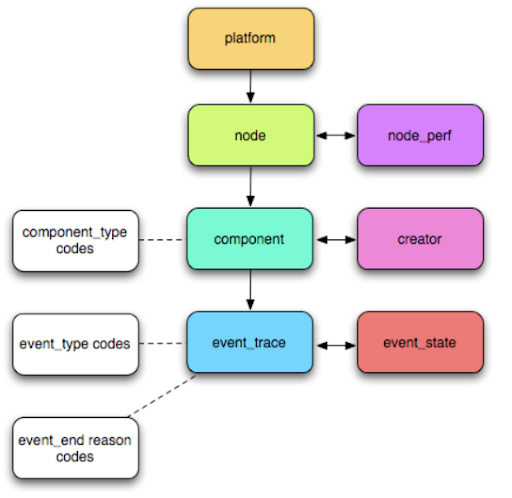

---


##**Detailed Breakdown**

**Platform**

A platform represents the entire computing environment or system being monitored. Examples include distributed systems like SETI@home or a corporate network of desktops. Each platform has a unique identifier (platform_id), a name, location, and type (e.g., cluster, grid, etc.).
Attributes include:
platform_id: Unique identifier for the platform.
platform_name, platform_location, platform_type: Descriptive fields to understand the platform's nature.
notes: Any additional information.


**Node**

A node is a physical or virtual machine within a platform, like a server or a workstation. Nodes host components and are uniquely identified within the platform by a node_id.
Attributes include:
node_id: Unique identifier for the node.
platform_id: The platform to which this node belongs.
node_name, node_ip, node_location: Identifying and locating information.
timezone, proc_model, os_name, cores_per_proc, num_procs, mem_size, disk_size, up_bw, down_bw: Hardware and network specifications.
metric_id, notes: Performance metrics and additional information.


**Component**

A component is a software or hardware resource within a node, like a CPU, memory module, or a network interface. Each component has a component_id and is associated with a node_id.
Attributes include:
component_id: Unique identifier for the component.
node_id, platform_id: Identifiers linking the component to its node and platform.
creator_id: Identifier of the person or entity responsible for the component's trace data.
component_type: Type of component (e.g., host, CPU, network).
trace_start, trace_end: Times when the component started and ended its trace recording.
resolution: The granularity of the data recorded by this component.


**Event Trace**

An event trace records the activity or state changes of a component over time. Each event within the trace is logged with a start and stop time and a type indicating what kind of event occurred (e.g., availability or unavailability).
Attributes include:
event_id: Unique identifier for the event.
component_id, node_id, platform_id: Identifiers linking the event to its component, node, and platform.
event_type: Type of event (e.g., availability, unavailability).
event_start_time, event_end_time: The time span during which the event occurred.
event_end_reason: Reason why the event ended (e.g., hardware failure, software error).


**Event State**

An event state provides details about the condition or performance of a component during an event trace. This could include metrics like CPU availability or network throughput.
Attributes include:
event_id: The event to which this state belongs.
component_id, node_id, platform_id: Identifiers linking the state to its component, node, and platform.
i_val, f_val, s_val: The recorded values for integer, float, and string metrics during the event.


In the Grid 5000 network, there are 9 geographical sites in France and Luxembourg, 15 clusters, and 1288 nodes.

9 sites labelled site1 through site9.

15 clusters distributed across the 9 sites, labelled as:
1. site1/c1
2. site1/c2
3. site1/c3
4. site1/c4
5. site2/c1
6. site3/c1
7. site4/c1
8. site4/c2
9. site5/c1
10. site5/c2
11. site6/c1
12. site6/c2
13. site7/c1
14. site8/c1
15. site9/c1

And 1288 uniquely ID'd nodes.

In [228]:
# Display summary statistics for each dataframe
print("Component Summary Statistics:")
print(component.describe())

print("\nCreator Summary Statistics:")
print(creator.describe())

print("\nEvent Trace Summary Statistics:")
print(event_trace.describe())

print("\nNode Summary Statistics:")
print(node.describe())

print("\nPlatform Summary Statistics:")
print(platform.describe())


Component Summary Statistics:
       component_id      node_id  platform_id  creator_id  component_type  \
count        1288.0  1288.000000       1288.0      1288.0          1288.0   
mean            0.0   643.500000          5.0         0.0             0.0   
std             0.0   371.957883          0.0         0.0             0.0   
min             0.0     0.000000          5.0         0.0             0.0   
25%             0.0   321.750000          5.0         0.0             0.0   
50%             0.0   643.500000          5.0         0.0             0.0   
75%             0.0   965.250000          5.0         0.0             0.0   
max             0.0  1287.000000          5.0         0.0             0.0   

        trace_start     trace_end  resolution  
count  1.288000e+03  1.288000e+03      1288.0  
mean   1.115811e+09  1.163166e+09         5.0  
std    0.000000e+00  0.000000e+00         0.0  
min    1.115811e+09  1.163166e+09         5.0  
25%    1.115811e+09  1.163166e+09   

Remove Empty Datasets

In [229]:
import os
import pandas as pd

# Function to check if a file is empty and remove it
def remove_empty_file(filename):
    try:
        df = pd.read_csv(filename, sep='\t', skiprows=1)
        if df.empty:
            os.remove(filename)
            print(f"Removed empty dataset: {filename}")
        else:
            print(f"Dataset {filename} is not empty.")
    except pd.errors.EmptyDataError:
        os.remove(filename)
        print(f"Removed empty dataset (EmptyDataError): {filename}")

# Check and remove empty datasets
for filename in ['event_state.tab', 'node_perf.tab']:
    if os.path.exists(filename):
        remove_empty_file(filename)
    else:
        print(f"File {filename} does not exist.")


Removed empty dataset (EmptyDataError): event_state.tab
Removed empty dataset (EmptyDataError): node_perf.tab


In [230]:
# Check for missing values in each dataframe
print("Component Missing Values:")
print(component.isnull().sum())

print("\nCreator Missing Values:")
print(creator.isnull().sum())

print("\nEvent Trace Missing Values:")
print(event_trace.isnull().sum())

print("\nNode Missing Values:")
print(node.isnull().sum())

print("\nPlatform Missing Values:")
print(platform.isnull().sum())


Component Missing Values:
component_id      0
node_id           0
platform_id       0
creator_id        0
node_name         0
component_type    0
trace_start       0
trace_end         0
resolution        0
dtype: int64

Creator Missing Values:
creator_id      0
component_id    0
node_id         0
platform_id     0
creator         0
cite            0
copyright       0
dtype: int64

Event Trace Missing Values:
event_id            0
component_id        0
node_id             0
platform_id         0
node_name           0
event_type          0
event_start_time    0
event_stop_time     0
event_end_reason    0
dtype: int64

Node Missing Values:
node_id           0
platform_id       0
node_name         0
node_ip           0
node_location     0
timezone          0
proc_model        0
os_name           0
cores_per_proc    0
num_procs         0
mem_size          0
disk_size         0
up_bw             0
down_bw           0
metric_id         0
notes             0
dtype: int64

Platform Missing Valu

No missing values found in any of the datasets

In [231]:
#Remove Columns with Only NULL Values in node.tab
columns_to_remove = ['node_ip', 'proc_model', 'os_name', 'cores_per_proc', 'mem_size', 'disk_size', 'up_bw', 'down_bw', 'metric_id', 'notes']
node = node.drop(columns=columns_to_remove)

print("Node Data after cleaning:")
print(node.head())

Node Data after cleaning:
   node_id  platform_id           node_name node_location  timezone  num_procs
0        0            5   G1/site1/c1/node1   G1/site1/c1      3600          2
1        9            5  G1/site1/c1/node10   G1/site1/c1      3600          2
2       10            5  G1/site1/c1/node11   G1/site1/c1      3600          2
3       11            5  G1/site1/c1/node12   G1/site1/c1      3600          2
4       12            5  G1/site1/c1/node13   G1/site1/c1      3600          2


In [232]:
import pandas as pd

# Function to categorize columns
def categorize_columns(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
    return numeric_cols, categorical_cols

# Component dataset
component_numeric_cols, component_categorical_cols = categorize_columns(component)
print("Component Numeric Columns:", component_numeric_cols)
print("Component Categorical Columns:", component_categorical_cols)

# Creator dataset
creator_numeric_cols, creator_categorical_cols = categorize_columns(creator)
print("\nCreator Numeric Columns:", creator_numeric_cols)
print("Creator Categorical Columns:", creator_categorical_cols)

# Event Trace dataset
event_trace_numeric_cols, event_trace_categorical_cols = categorize_columns(event_trace)
print("\nEvent Trace Numeric Columns:", event_trace_numeric_cols)
print("Event Trace Categorical Columns:", event_trace_categorical_cols)

# Node dataset
node_numeric_cols, node_categorical_cols = categorize_columns(node)
print("\nNode Numeric Columns:", node_numeric_cols)
print("Node Categorical Columns:", node_categorical_cols)

# Platform dataset
platform_numeric_cols, platform_categorical_cols = categorize_columns(platform)
print("\nPlatform Numeric Columns:", platform_numeric_cols)
print("Platform Categorical Columns:", platform_categorical_cols)

Component Numeric Columns: ['component_id', 'node_id', 'platform_id', 'creator_id', 'component_type', 'trace_start', 'trace_end', 'resolution']
Component Categorical Columns: ['node_name']

Creator Numeric Columns: ['creator_id', 'component_id', 'node_id', 'platform_id']
Creator Categorical Columns: ['creator', 'cite', 'copyright']

Event Trace Numeric Columns: ['event_id', 'component_id', 'node_id', 'platform_id', 'event_type', 'event_start_time', 'event_stop_time']
Event Trace Categorical Columns: ['node_name', 'event_end_reason']

Node Numeric Columns: ['node_id', 'platform_id', 'timezone', 'num_procs']
Node Categorical Columns: ['node_name', 'node_location']

Platform Numeric Columns: ['platform_id']
Platform Categorical Columns: ['platform_name', 'platform_location', 'platform_type', 'notes']


In [233]:
# Load component and event_trace datasets
component_columns = ['component_id', 'node_id', 'platform_id', 'creator_id', 'node_name', 'component_type', 'trace_start', 'trace_end', 'resolution']
event_trace_columns = ['event_id', 'component_id', 'node_id', 'platform_id', 'node_name', 'event_type', 'event_start_time', 'event_stop_time', 'event_end_reason']

component = pd.read_csv('component.tab', sep='\t', skiprows=1, names=component_columns)
event_trace = pd.read_csv('event_trace.tab', sep='\t', skiprows=1, names=event_trace_columns)

# Strip leading and trailing spaces from node_name
component['node_name'] = component['node_name'].str.strip()
event_trace['node_name'] = event_trace['node_name'].str.strip()

# Save the cleaned datasets
component.to_csv('cleaned_component.tab', sep='\t', index=False)
event_trace.to_csv('cleaned_event_trace.tab', sep='\t', index=False)

print("Component Data after cleaning:")
print(component.head())
print("\nEvent Trace Data after cleaning:")
print(event_trace.head())


Component Data after cleaning:
   component_id  node_id  platform_id  creator_id           node_name  \
0             0        0            5           0   G1/site1/c1/node1   
1             0        9            5           0  G1/site1/c1/node10   
2             0       10            5           0  G1/site1/c1/node11   
3             0       11            5           0  G1/site1/c1/node12   
4             0       12            5           0  G1/site1/c1/node13   

   component_type  trace_start   trace_end  resolution  
0               0   1115811139  1163165604           5  
1               0   1115811139  1163165604           5  
2               0   1115811139  1163165604           5  
3               0   1115811139  1163165604           5  
4               0   1115811139  1163165604           5  

Event Trace Data after cleaning:
   event_id  component_id  node_id  platform_id          node_name  \
0         0             0        0            5  G1/site1/c1/node1   
1         1   

In [234]:
# Convert time columns in component dataset
component['trace_start'] = pd.to_datetime(component['trace_start'], unit='s')
component['trace_end'] = pd.to_datetime(component['trace_end'], unit='s')

# Convert time columns in event_trace dataset
event_trace['event_start_time'] = pd.to_datetime(event_trace['event_start_time'], unit='s')
event_trace['event_stop_time'] = pd.to_datetime(event_trace['event_stop_time'], unit='s')

# Save the updated datasets
component.to_csv('cleaned_component.tab', sep='\t', index=False)
event_trace.to_csv('cleaned_event_trace.tab', sep='\t', index=False)

print("Component Data with datetime format:")
print(component.head())
print("\nEvent Trace Data with datetime format:")
print(event_trace.head())


Component Data with datetime format:
   component_id  node_id  platform_id  creator_id           node_name  \
0             0        0            5           0   G1/site1/c1/node1   
1             0        9            5           0  G1/site1/c1/node10   
2             0       10            5           0  G1/site1/c1/node11   
3             0       11            5           0  G1/site1/c1/node12   
4             0       12            5           0  G1/site1/c1/node13   

   component_type         trace_start           trace_end  resolution  
0               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5  
1               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5  
2               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5  
3               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5  
4               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5  

Event Trace Data with datetime format:
   event_id  component_id  node_id  platform_id     

## Removal of duplicate records

In [235]:
import pandas as pd

# Count records before removing duplicates
component_count_before = component.shape[0]
creator_count_before = creator.shape[0]
event_trace_count_before = event_trace.shape[0]
node_count_before = node.shape[0]
platform_count_before = platform.shape[0]

# Remove duplicates in all datasets
component.drop_duplicates(inplace=True)
creator.drop_duplicates(inplace=True)
event_trace.drop_duplicates(inplace=True)
node.drop_duplicates(inplace=True)
platform.drop_duplicates(inplace=True)

# Count records after removing duplicates
component_count_after = component.shape[0]
creator_count_after = creator.shape[0]
event_trace_count_after = event_trace.shape[0]
node_count_after = node.shape[0]
platform_count_after = platform.shape[0]

# Display the counts before and after
print("Record counts before and after removing duplicates:\n")
print(f"Component - Before: {component_count_before}, After: {component_count_after}")
print(f"Creator   - Before: {creator_count_before}, After: {creator_count_after}")
print(f"Event Trace - Before: {event_trace_count_before}, After: {event_trace_count_after}")
print(f"Node      - Before: {node_count_before}, After: {node_count_after}")
print(f"Platform  - Before: {platform_count_before}, After: {platform_count_after}")

print("\nComponent Data after removing duplicates:")
print(component.head())


Record counts before and after removing duplicates:

Component - Before: 1288, After: 1288
Creator   - Before: 1288, After: 1288
Event Trace - Before: 588463, After: 588463
Node      - Before: 1288, After: 1288
Platform  - Before: 1, After: 1

Component Data after removing duplicates:
   component_id  node_id  platform_id  creator_id           node_name  \
0             0        0            5           0   G1/site1/c1/node1   
1             0        9            5           0  G1/site1/c1/node10   
2             0       10            5           0  G1/site1/c1/node11   
3             0       11            5           0  G1/site1/c1/node12   
4             0       12            5           0  G1/site1/c1/node13   

   component_type         trace_start           trace_end  resolution  
0               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5  
1               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5  
2               0 2005-05-11 11:32:19 2006-11-10 13:33:24  

## Merge the datasets to form a single merged dataframe

In [236]:
import pandas as pd

# Merge component and event_trace datasets on common columns
merged_data = pd.merge(component, event_trace, on=['component_id', 'node_id', 'platform_id', 'node_name'], how='inner')

# Merge with node dataset
merged_data = pd.merge(merged_data, node, on=['node_id', 'platform_id'], how='inner')

# Merge with creator dataset
merged_data_with_creator = pd.merge(merged_data, creator, on=['component_id', 'node_id', 'platform_id'], how='left')

# Merge with platform dataset
final_merged_data = pd.merge(merged_data_with_creator, platform, on='platform_id', how='left')

# Display the final merged data
print("Final Merged Data:")
print(final_merged_data.head())

# Save the final merged dataset
final_merged_data.to_csv('final_merged_data.tab', sep='\t', index=False)

columns_to_drop = ['creator', 'cite', 'copyright', 'platform_name', 'platform_location', 'platform_type','notes', 'creator_id_x','creator_id_y']

final_merged_data.drop(columns=columns_to_drop, inplace=True)

Final Merged Data:
   component_id  node_id  platform_id  creator_id_x        node_name_x  \
0             0        0            5             0  G1/site1/c1/node1   
1             0        0            5             0  G1/site1/c1/node1   
2             0        0            5             0  G1/site1/c1/node1   
3             0        0            5             0  G1/site1/c1/node1   
4             0        0            5             0  G1/site1/c1/node1   

   component_type         trace_start           trace_end  resolution  \
0               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5   
1               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5   
2               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5   
3               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5   
4               0 2005-05-11 11:32:19 2006-11-10 13:33:24           5   

   event_id  ...  timezone num_procs creator_id_y  \
0         0  ...      3600         2        

In [237]:
final_merged_data.columns

Index(['component_id', 'node_id', 'platform_id', 'node_name_x',
       'component_type', 'trace_start', 'trace_end', 'resolution', 'event_id',
       'event_type', 'event_start_time', 'event_stop_time', 'event_end_reason',
       'node_name_y', 'node_location', 'timezone', 'num_procs'],
      dtype='object')

**17 Features**

In [238]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588463 entries, 0 to 588462
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   component_id      588463 non-null  int64         
 1   node_id           588463 non-null  int64         
 2   platform_id       588463 non-null  int64         
 3   node_name_x       588463 non-null  object        
 4   component_type    588463 non-null  int64         
 5   trace_start       588463 non-null  datetime64[ns]
 6   trace_end         588463 non-null  datetime64[ns]
 7   resolution        588463 non-null  int64         
 8   event_id          588463 non-null  int64         
 9   event_type        588463 non-null  int64         
 10  event_start_time  588463 non-null  datetime64[ns]
 11  event_stop_time   588463 non-null  datetime64[ns]
 12  event_end_reason  588463 non-null  object        
 13  node_name_y       588463 non-null  object        
 14  node

In [239]:
final_merged_data.describe()

component_id        node_id  platform_id  component_type  \
count      588463.0  588463.000000     588463.0        588463.0   
mean            0.0     459.524203          5.0             0.0   
min             0.0       0.000000          5.0             0.0   
25%             0.0     210.000000          5.0             0.0   
50%             0.0     371.000000          5.0             0.0   
75%             0.0     745.000000          5.0             0.0   
max             0.0    1287.000000          5.0             0.0   
std             0.0     307.042252          0.0             0.0   

                         trace_start                      trace_end  \
count                         588463                         588463   
mean   2005-05-11 11:32:18.999999872  2006-11-10 13:33:23.999999232   
min              2005-05-11 11:32:19            2006-11-10 13:33:24   
25%              2005-05-11 11:32:19            2006-11-10 13:33:24   
50%              2005-05-11 11:32:19            2006-11-10 13:33:24   
75%              2005-05-11 11:32:19            2006-11-10 13:33:24   
max              2005-05-11 11:32:19            2006-11-10 13:33:24   
std                              NaN                            NaN   

       resolution       event_id     event_type  \
count    588463.0  588463.000000  588463.000000   
mean          5.0     374.223557       0.500147   
min           5.0       0.000000       0.000000   
25%           5.0     126.000000       0.000000   
50%           5.0     291.000000       1.000000   
75%           5.0     557.000000       1.000000   
max           5.0    2448.000000       1.000000   
std           0.0     313.525784       0.500000   

                    event_start_time                event_stop_time  timezone  \
count                         588463                         588463  588463.0   
mean   2006-03-31 20:14:57.678521728  2006-04-01 16:09:46.307982336    3600.0   
min              2005-05-11 11:32:19            2005-05-11 11:37:13    3600.0   
25%              2005-11-16 23:30:17            2005-11-18 16:25:48    3600.0   
50%              2006-04-24 07:54:11            2006-04-24 16:25:46    3600.0   
75%       2006-08-28 12:49:37.500000            2006-08-28 18:04:51    3600.0   
max              2006-11-10 13:33:24            2006-11-10 13:33:24    3600.0   
std                              NaN                            NaN       0.0   

       num_procs  
count   588463.0  
mean         2.0  
min          2.0  
25%          2.0  
50%          2.0  
75%          2.0  
max          2.0  
std          0.0

In [240]:
# Separate numeric and categorical columns
numeric_columns = final_merged_data.select_dtypes(include=['number']).columns
categorical_columns = final_merged_data.select_dtypes(include=['object', 'category']).columns
datetime_columns = final_merged_data.select_dtypes(include=['datetime64[ns]']).columns

print("Numeric Columns:")
print(numeric_columns)
print("Categoric Columns: ")
print(categorical_columns)
print("DateTime Columns: ")
print(datetime_columns)

Numeric Columns:
Index(['component_id', 'node_id', 'platform_id', 'component_type',
       'resolution', 'event_id', 'event_type', 'timezone', 'num_procs'],
      dtype='object')
Categoric Columns: 
Index(['node_name_x', 'event_end_reason', 'node_name_y', 'node_location'], dtype='object')
DateTime Columns: 
Index(['trace_start', 'trace_end', 'event_start_time', 'event_stop_time'], dtype='object')


In [241]:
print(final_merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588463 entries, 0 to 588462
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   component_id      588463 non-null  int64         
 1   node_id           588463 non-null  int64         
 2   platform_id       588463 non-null  int64         
 3   node_name_x       588463 non-null  object        
 4   component_type    588463 non-null  int64         
 5   trace_start       588463 non-null  datetime64[ns]
 6   trace_end         588463 non-null  datetime64[ns]
 7   resolution        588463 non-null  int64         
 8   event_id          588463 non-null  int64         
 9   event_type        588463 non-null  int64         
 10  event_start_time  588463 non-null  datetime64[ns]
 11  event_stop_time   588463 non-null  datetime64[ns]
 12  event_end_reason  588463 non-null  object        
 13  node_name_y       588463 non-null  object        
 14  node

In [242]:
# Loop through each column and print unique values, their count, and frequency
for column in final_merged_data.columns:
    print(f"Column: {column}")
    print(f"Number of Unique Values: {final_merged_data[column].nunique()}")
    print("Value Counts:")
    print(final_merged_data[column].value_counts().head(10))  # Display top 10 most frequent values
    print("-" * 50)


Column: component_id
Number of Unique Values: 1
Value Counts:
component_id
0    588463
Name: count, dtype: int64
--------------------------------------------------
Column: node_id
Number of Unique Values: 1288
Value Counts:
node_id
868    2449
865    2213
885    1977
875    1877
209    1661
867    1627
96     1495
122    1479
270    1446
104    1439
Name: count, dtype: int64
--------------------------------------------------
Column: platform_id
Number of Unique Values: 1
Value Counts:
platform_id
5    588463
Name: count, dtype: int64
--------------------------------------------------
Column: node_name_x
Number of Unique Values: 1288
Value Counts:
node_name_x
G1/site7/c1/node29     2449
G1/site7/c1/node26     2213
G1/site7/c1/node46     1977
G1/site7/c1/node36     1877
G1/site8/c1/node64     1661
G1/site7/c1/node28     1627
G1/site8/c1/node12     1495
G1/site8/c1/node38     1479
G1/site8/c1/node113    1446
G1/site8/c1/node20     1439
Name: count, dtype: int64
---------------------------

## Number of features with only 1 unique value:

1. component_id
2. component_type
3. platform_id
4. trace_start
5. trace_end
6. event_end_reason
7. time_zone
8. num_procs

In [243]:
# List of columns with only one unique value
columns_to_drop = ['component_id', 'component_type', 'platform_id',
                   'trace_start', 'trace_end', 'event_end_reason',
                   'timezone', 'num_procs', 'node_name_y', 'resolution']

# Drop these columns from the dataframe
final_merged_data = final_merged_data.drop(columns=columns_to_drop, axis=1)

# Rename the column 'node_name_x' to 'node_name'
final_merged_data = final_merged_data.rename(columns={'node_name_x': 'node_name'})

# Confirm the changes
print("Updated dataframe columns:")
print(final_merged_data.columns)


Updated dataframe columns:
Index(['node_id', 'node_name', 'event_id', 'event_type', 'event_start_time',
       'event_stop_time', 'node_location'],
      dtype='object')


## Updated features:

1. 'node_id'
2. 'node_name'
3. 'event_id'
4. 'event_type'
5. 'event_start_time'
6. 'event_stop_time'
7. 'node_location'

##**Numeric Columns**:
These columns consist of numerical data types, either integers or floats, representing different system and event attributes.

1. node_id: Represents the unique identifier of the node in the distributed system.

2. event_id: A unique identifier for each event. It helps in tracking and distinguishing between various events in the system.

3. event_type: A numerical representation of the type of event (e.g., failure, restart). Could indicate different failure modes.

##**Categorical Columns:**
These are columns that contain discrete categories or labels, often represented as text strings or specific labels. They indicate non-numeric attributes that describe the system.

1. node_name: The name of the node involved in the event.

2. node_location: A label representing the physical or logical location of the node in the distributed system.

##**DateTime Columns**:
These columns contain timestamps or time-based data, capturing when events occurred and ended.

1. event_start_time: The specific start time of the event. It’s useful for determining when a fault or failure occurred.

2. event_stop_time: The specific stop time of the event, helping determine the duration of the event or failure.

In [244]:
final_merged_data.head(5)

node_id          node_name  event_id  event_type    event_start_time  \
0        0  G1/site1/c1/node1         0           0 2005-05-11 11:32:19   
1        0  G1/site1/c1/node1         1           1 2005-05-23 14:09:12   
2        0  G1/site1/c1/node1         2           0 2005-05-23 14:17:15   
3        0  G1/site1/c1/node1         3           1 2005-05-23 18:16:04   
4        0  G1/site1/c1/node1         4           0 2005-05-23 22:03:14   

      event_stop_time node_location  
0 2005-05-23 14:09:12   G1/site1/c1  
1 2005-05-23 14:17:15   G1/site1/c1  
2 2005-05-23 18:16:04   G1/site1/c1  
3 2005-05-23 22:03:14   G1/site1/c1  
4 2005-05-26 23:11:20   G1/site1/c1

In [245]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588463 entries, 0 to 588462
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   node_id           588463 non-null  int64         
 1   node_name         588463 non-null  object        
 2   event_id          588463 non-null  int64         
 3   event_type        588463 non-null  int64         
 4   event_start_time  588463 non-null  datetime64[ns]
 5   event_stop_time   588463 non-null  datetime64[ns]
 6   node_location     588463 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 31.4+ MB


#**Exploratory Data Analysis**

In [246]:
print(final_merged_data.describe())

             node_id       event_id     event_type  \
count  588463.000000  588463.000000  588463.000000   
mean      459.524203     374.223557       0.500147   
min         0.000000       0.000000       0.000000   
25%       210.000000     126.000000       0.000000   
50%       371.000000     291.000000       1.000000   
75%       745.000000     557.000000       1.000000   
max      1287.000000    2448.000000       1.000000   
std       307.042252     313.525784       0.500000   

                    event_start_time                event_stop_time  
count                         588463                         588463  
mean   2006-03-31 20:14:57.678521728  2006-04-01 16:09:46.307982336  
min              2005-05-11 11:32:19            2005-05-11 11:37:13  
25%              2005-11-16 23:30:17            2005-11-18 16:25:48  
50%              2006-04-24 07:54:11            2006-04-24 16:25:46  
75%       2006-08-28 12:49:37.500000            2006-08-28 18:04:51  
max              2006-1

In [247]:
import pandas as pd

# Identify categorical columns
categorical_columns = final_merged_data.select_dtypes(include=['object', 'category']).columns

# Print unique value counts for each categorical column
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(final_merged_data[column].value_counts())
    print("\n")

Unique values in node_name:
node_name
G1/site7/c1/node29    2449
G1/site7/c1/node26    2213
G1/site7/c1/node46    1977
G1/site7/c1/node36    1877
G1/site8/c1/node64    1661
                      ... 
G1/site5/c2/node43       2
G1/site3/c1/node57       2
G1/site9/c1/node73       1
G1/site4/c2/node57       1
G1/site2/c1/node95       1
Name: count, Length: 1288, dtype: int64


Unique values in node_location:
node_location
G1/site8/c1    246707
G1/site4/c1     69181
G1/site1/c3     51907
G1/site1/c2     50924
G1/site7/c1     42285
G1/site1/c1     26134
G1/site6/c1     26000
G1/site2/c1     16369
G1/site9/c1     14671
G1/site3/c1     11564
G1/site5/c1     10746
G1/site1/c4      9497
G1/site4/c2      5858
G1/site5/c2      4366
G1/site6/c2      2254
Name: count, dtype: int64




Histograms for Numeric Columns:


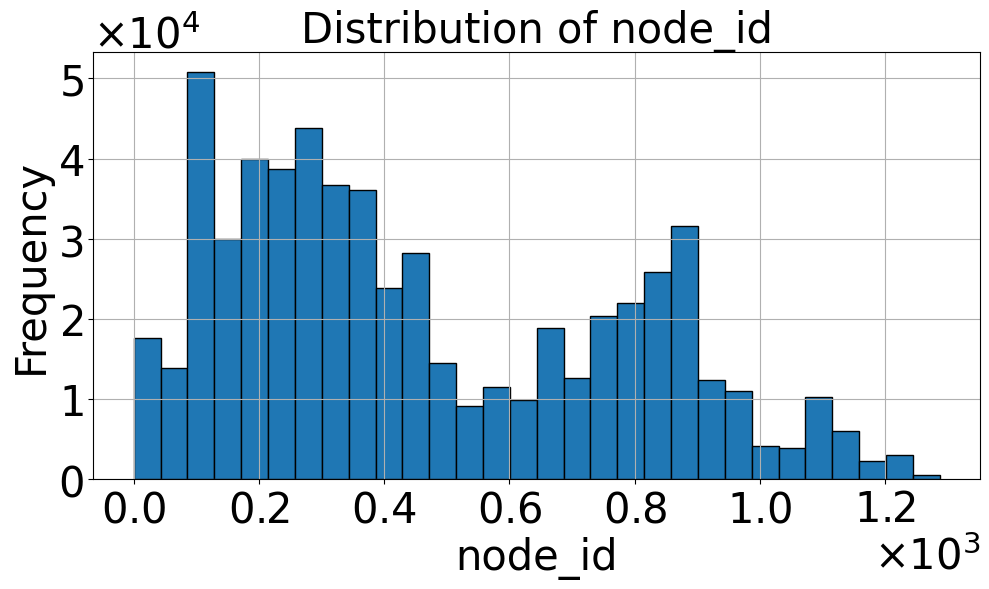

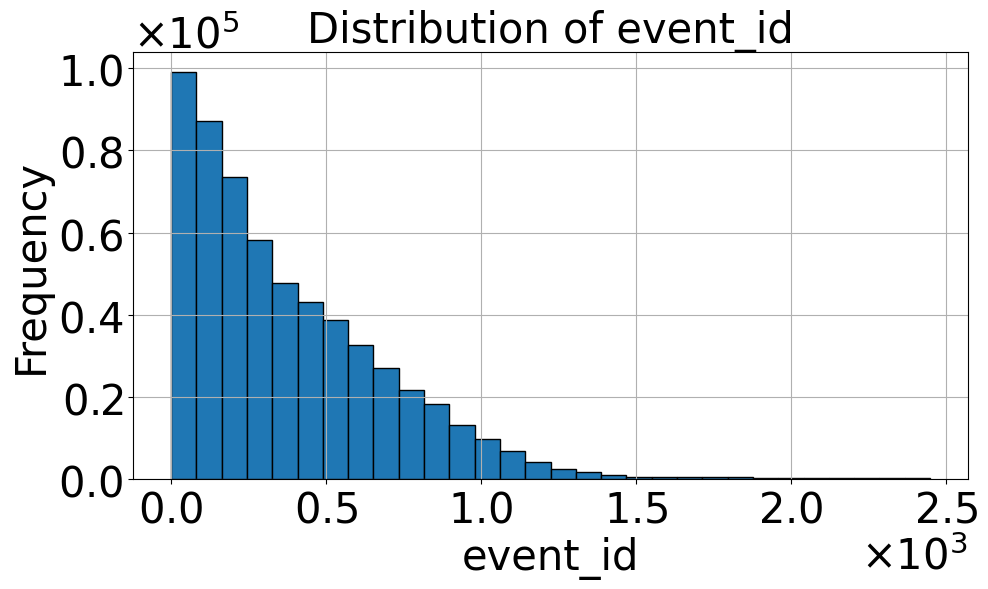

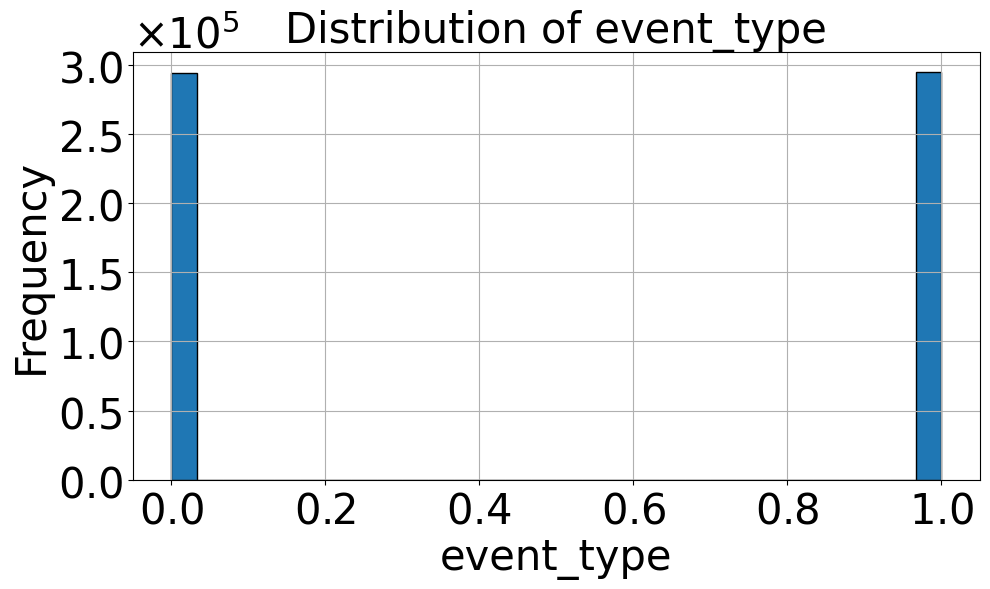

Bar Charts for Categorical Columns:


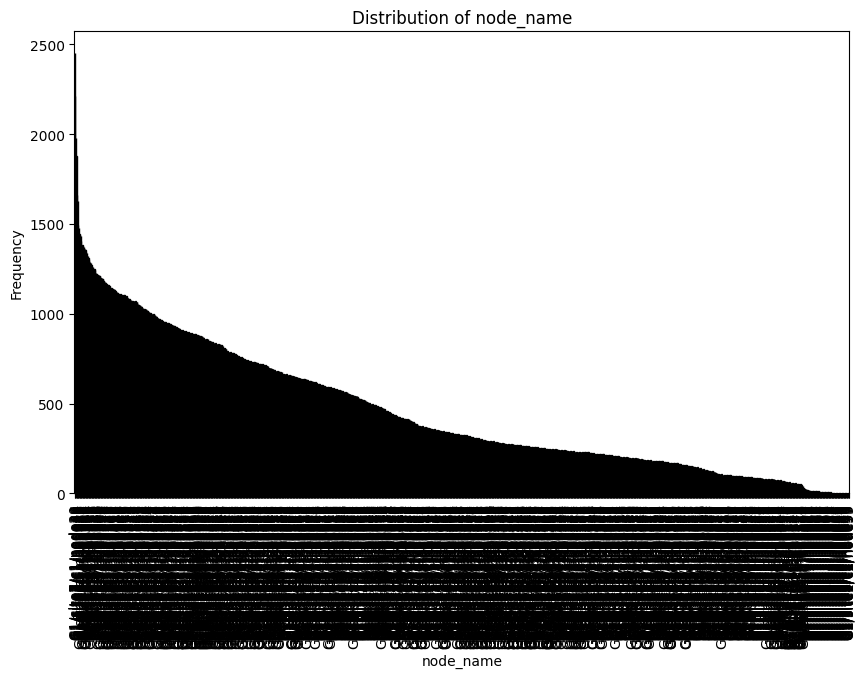

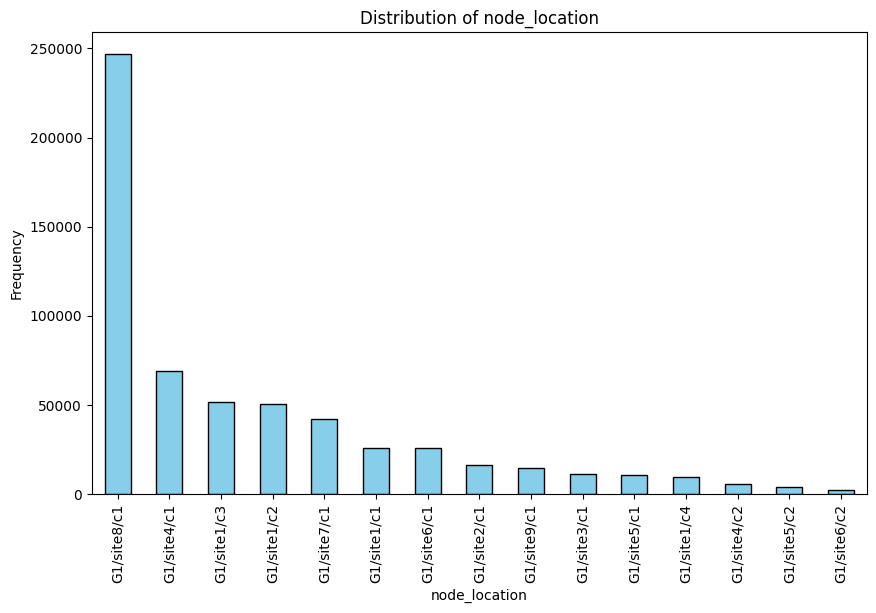

In [248]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Separate numeric and categorical columns
numeric_columns = final_merged_data.select_dtypes(include=['number']).columns
categorical_columns = final_merged_data.select_dtypes(include=['object', 'category']).columns

# Plot histograms for numeric columns one by one
print("Histograms for Numeric Columns:")
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    final_merged_data[column].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=30)
    plt.xlabel(column, fontsize=30)
    plt.ylabel('Frequency', fontsize=30)

    ax = plt.gca()

    y_formatter = ScalarFormatter(useMathText=True)
    y_formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(y_formatter)

    x_formatter = ScalarFormatter(useMathText=True)
    x_formatter.set_powerlimits((0, 0))
    ax.xaxis.set_major_formatter(x_formatter)


    #formatter = ScalarFormatter(useMathText=True)
    #formatter.set_powerlimits((0, 0))  # Force scientific notation always
    #ax.yaxis.set_major_formatter(formatter)
    #ax.xaxis.set_major_formatter(formatter)

    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    # Increase font size of the scientific notation exponent
    ax.yaxis.get_offset_text().set_fontsize(30)
    ax.xaxis.get_offset_text().set_fontsize(30)

    plt.tight_layout()
    plt.savefig(f'{column}_distribution.png', dpi=300, bbox_inches='tight', pad_inches=.05)
    plt.show()

# Plot bar charts for categorical columns one by one
print("Bar Charts for Categorical Columns:")
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    final_merged_data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


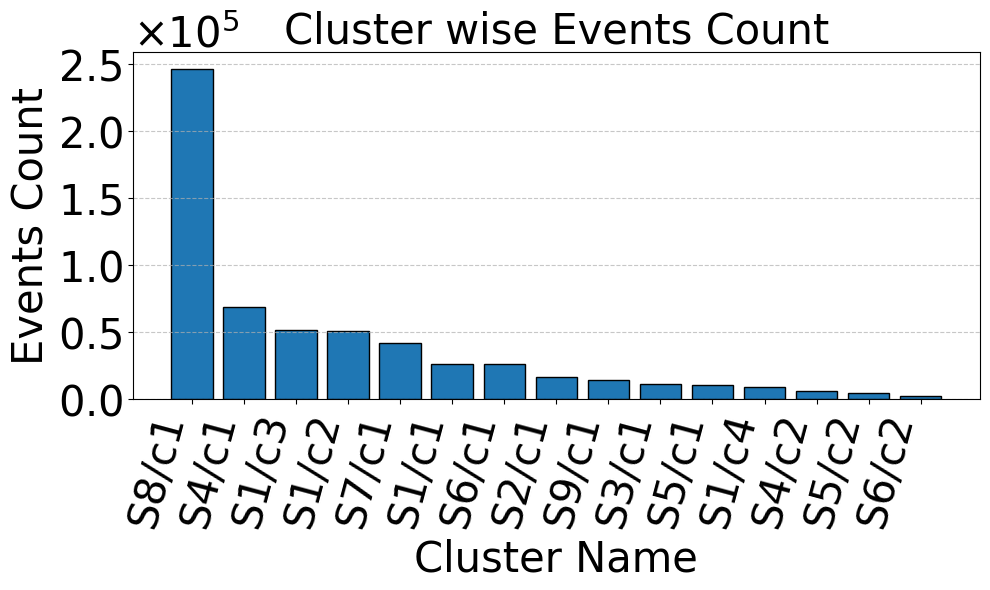

In [249]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(10, 6))

value_counts = final_merged_data['node_location'].value_counts()
ax.bar(value_counts.index, value_counts.values, edgecolor='black')

# Remove 'G1/' prefix
labels_no_g1 = [label.split('/', 1)[1] if '/' in label else label for label in value_counts.index]

# Replace 'site' with 'S'
labels_cleaned = [lbl.replace('site', 'S') for lbl in labels_no_g1]

ax.set_title('Cluster wise Events Count', fontsize=30)
#plt.title('Frequency of Recorded Events by Clusters', fontsize=30)
ax.set_xlabel('Cluster Name', fontsize=30)
ax.set_ylabel('Events Count', fontsize=30)

y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(y_formatter)

ax.set_xticks(range(len(labels_cleaned)))
ax.set_xticklabels(labels_cleaned, rotation=75, ha='right', fontsize=30)
#ax.tick_params(axis='x', pad=20)

ax.yaxis.get_offset_text().set_fontsize(30)

plt.setp(ax.get_yticklabels(), fontsize=30)

ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.savefig('node_location_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()


In [250]:
'''
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Bar chart for the 'node_location' categorical feature
#plt.figure(figsize=(12, 8))
plt.figure(figsize=(10, 6))
final_merged_data['node_location'].value_counts().plot(
    kind='bar', edgecolor='black'
)
plt.title('Frequency of Recorded Events by Clusters', fontsize=30)
plt.xlabel('Cluster', fontsize=30)  # Name for the x-axis
plt.ylabel('Events Count', fontsize=30)  # Name for the y-axis

y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(y_formatter)

x_formatter = ScalarFormatter(useMathText=True)
x_formatter.set_powerlimits((0, 0))
ax.xaxis.set_major_formatter(x_formatter)

plt.xticks(rotation=45, ha='right', fontsize=30)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nfrom matplotlib.ticker import ScalarFormatter\n\n# Bar chart for the 'node_location' categorical feature\n#plt.figure(figsize=(12, 8))\nplt.figure(figsize=(10, 6))\nfinal_merged_data['node_location'].value_counts().plot(\n    kind='bar', edgecolor='black'\n)\nplt.title('Frequency of Recorded Events by Clusters', fontsize=30)\nplt.xlabel('Cluster', fontsize=30)  # Name for the x-axis\nplt.ylabel('Events Count', fontsize=30)  # Name for the y-axis\n\ny_formatter = ScalarFormatter(useMathText=True)\ny_formatter.set_powerlimits((0, 0))\nax.yaxis.set_major_formatter(y_formatter)\n\nx_formatter = ScalarFormatter(useMathText=True)\nx_formatter.set_powerlimits((0, 0))\nax.xaxis.set_major_formatter(x_formatter)\n\nplt.xticks(rotation=45, ha='right', fontsize=30)  # Rotate x-axis labels for better readability\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.tight_layout()\nplt.show()\n"

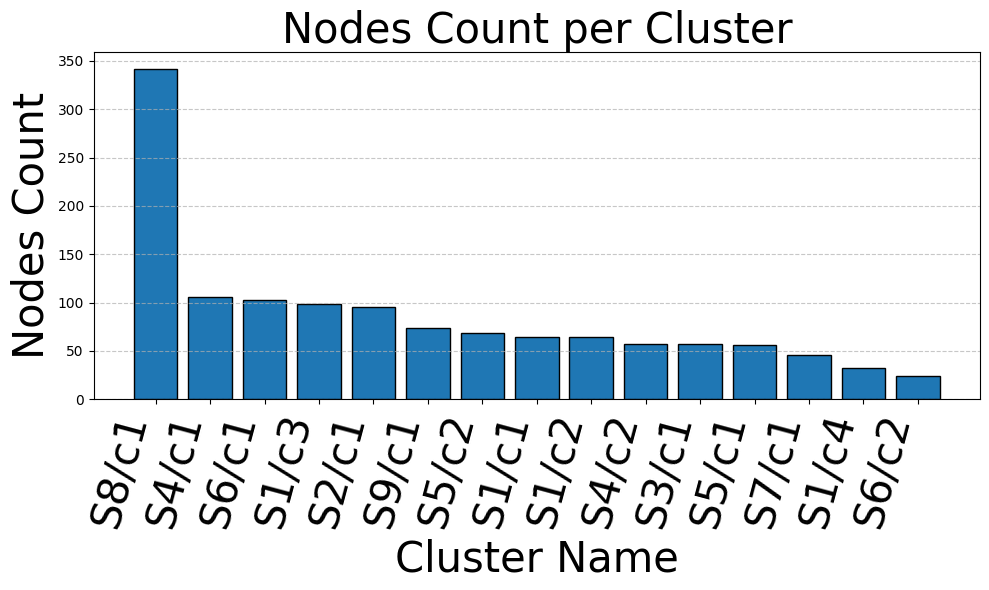

In [251]:
import matplotlib.pyplot as plt

# Group by 'node_location' and count the number of unique 'node_name' values in each cluster
node_counts_per_cluster = final_merged_data.groupby('node_location')['node_name'].nunique()

# Sort the counts descending as before for plotting
node_counts_sorted = node_counts_per_cluster.sort_values(ascending=False)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars manually with sorted counts
ax.bar(range(len(node_counts_sorted)), node_counts_sorted.values,
       edgecolor='black')

# Original labels (full node_location strings)
labels = node_counts_sorted.index.tolist()

# Process labels: remove "G1/", then replace "site" with "S"
def clean_label(label):
    if '/' in label:
        label = label.split('/', 1)[1]  # remove 'G1/'
    return label.replace('site', 'S')

labels_cleaned = [clean_label(lbl) for lbl in labels]

# Set x-axis ticks and corresponding cleaned labels
ax.set_xticks(range(len(labels_cleaned)))
ax.set_xticklabels(labels_cleaned, rotation=75, ha='right', fontsize=30)

# Set titles and axis labels
ax.set_title('Nodes Count per Cluster', fontsize=30)
ax.set_xlabel('Cluster Name', fontsize=30)
ax.set_ylabel('Nodes Count', fontsize=30)

# Show grid for y-axis
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

plt.savefig('node_count_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()

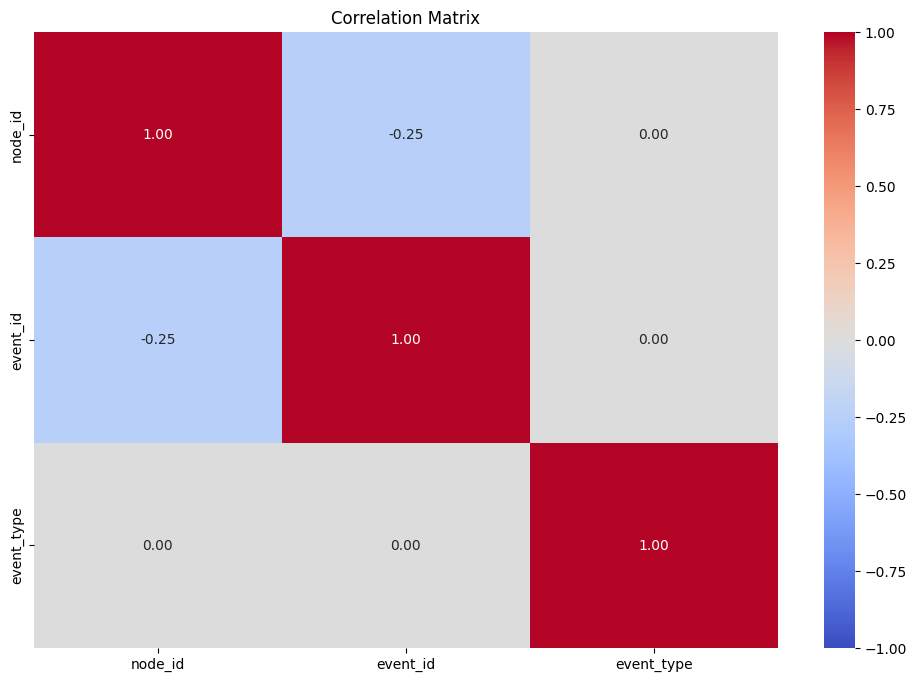

In [252]:
import seaborn as sns

# Compute the correlation matrix-
correlation_matrix = final_merged_data[numeric_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


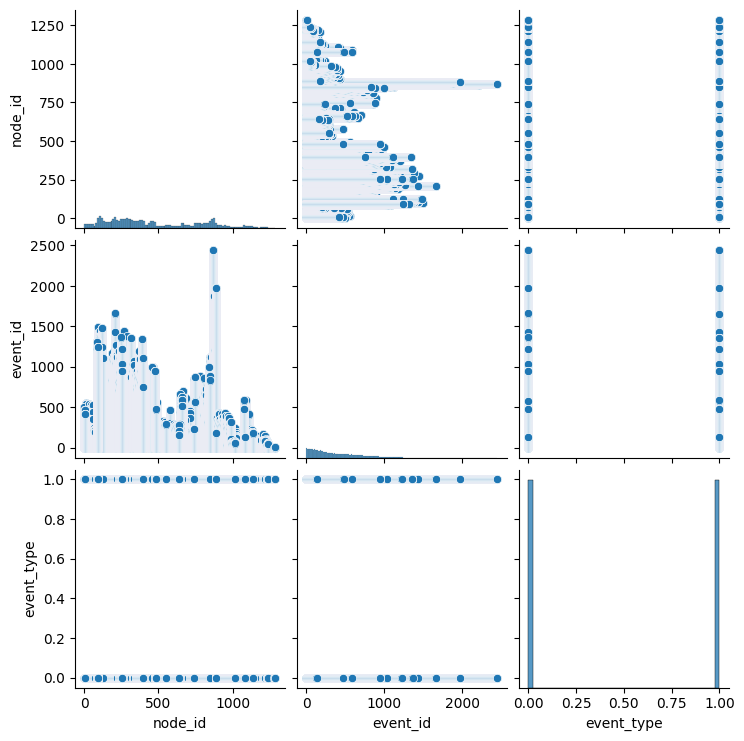

In [253]:
# Plot scatter plot matrix
sns.pairplot(final_merged_data[numeric_columns])
plt.show()

##**Time Series Analysis**

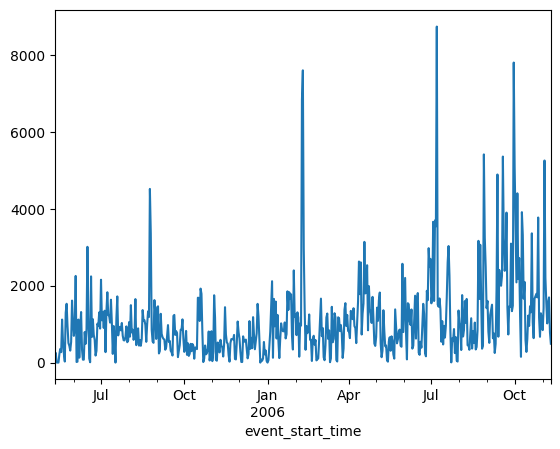

In [254]:
final_merged_data['event_start_time'] = pd.to_datetime(final_merged_data['event_start_time'], unit='s')
final_merged_data.set_index('event_start_time').resample('D').size().plot()
plt.show()

## Box plots to detect outliers

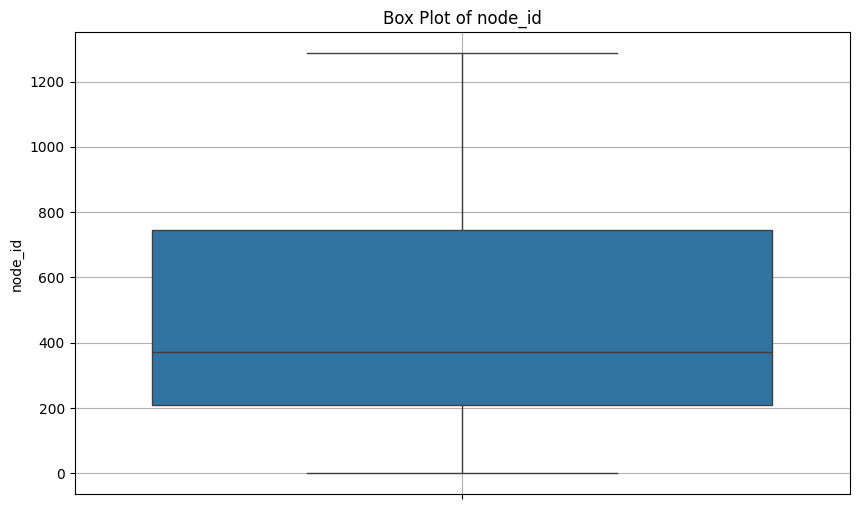

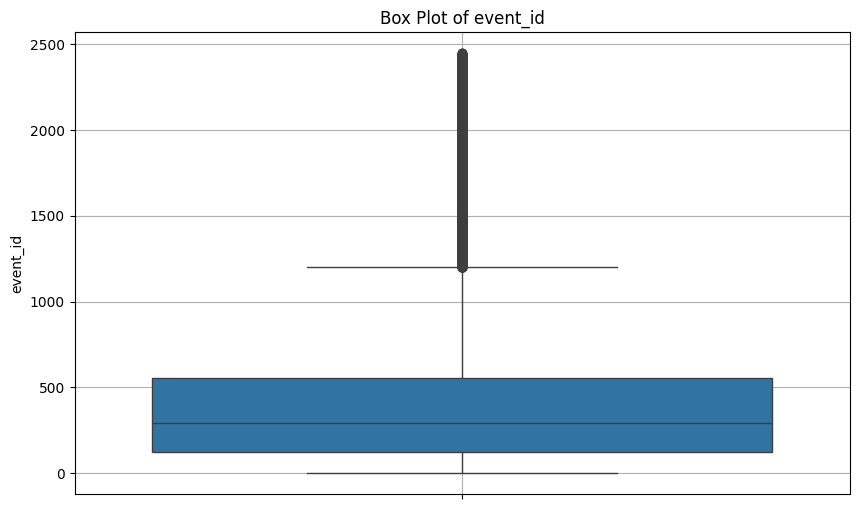

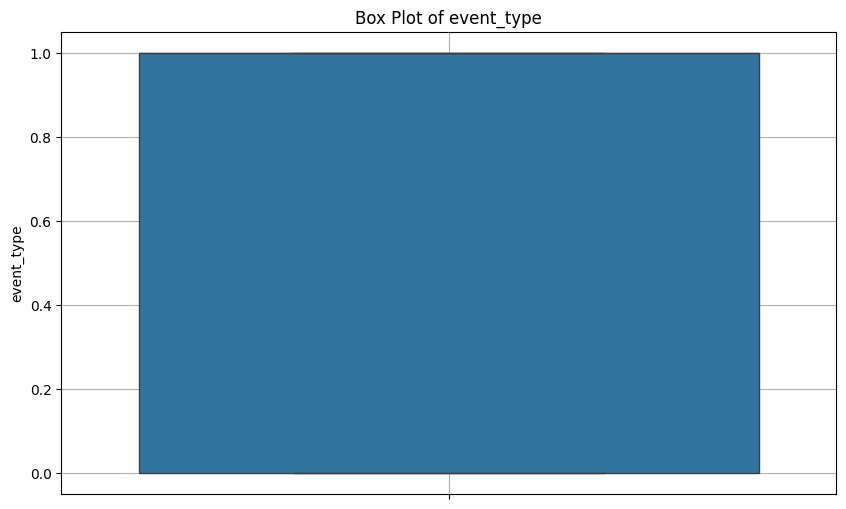

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for all numeric columns to detect outliers
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=final_merged_data, y=col)
    plt.title(f'Box Plot of {col}')
    plt.grid(True)
    plt.show()


#**Statistical Analysis**

In [256]:
import pandas as pd
from scipy.stats import chi2_contingency

# Perform Chi-Square Tests for all pairs of categorical columns
for cat_col1 in categorical_columns:
    for cat_col2 in categorical_columns:
        if cat_col1 != cat_col2:
            contingency_table = pd.crosstab(final_merged_data[cat_col1], final_merged_data[cat_col2])
            chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

            print(f"\nChi-Square Test between {cat_col1} and {cat_col2}:")
            print(f"Chi-Square Statistic: {chi2_stat}")
            print(f"P-Value: {p_val}")
            print(f"Degrees of Freedom: {dof}")
            print(f"Expected Frequencies Table:\n{expected}")

            if p_val < 0.05:
                print("Significant association found.")
            else:
                print("No significant association found.")



Chi-Square Test between node_name and node_location:
Chi-Square Statistic: 8238482.0
P-Value: 0.0
Degrees of Freedom: 18018
Expected Frequencies Table:
[[1.87412769e+01 3.65187412e+01 3.72236725e+01 ... 3.03235208e+01
  1.76919116e+02 1.05209028e+01]
 [1.34120038e+01 2.61342650e+01 2.66387419e+01 ... 2.17007187e+01
  1.26610363e+02 7.52917686e+00]
 [1.42113948e+01 2.76919365e+01 2.82264815e+01 ... 2.29941390e+01
  1.34156676e+02 7.97793574e+00]
 ...
 [3.10874261e-01 6.05761110e-01 6.17454283e-01 ... 5.02996790e-01
  2.93467729e+00 1.74517344e-01]
 [2.13170922e+01 4.15379047e+01 4.23397223e+01 ... 3.44912085e+01
  2.01235014e+02 1.19669036e+01]
 [6.03984278e+00 1.17690730e+01 1.19962546e+01 ... 9.77250906e+00
  5.70165873e+01 3.39062269e+00]]
Significant association found.

Chi-Square Test between node_location and node_name:
Chi-Square Statistic: 8238482.000000001
P-Value: 0.0
Degrees of Freedom: 18018
Expected Frequencies Table:
[[1.87412769e+01 1.34120038e+01 1.42113948e+01 ... 3.10

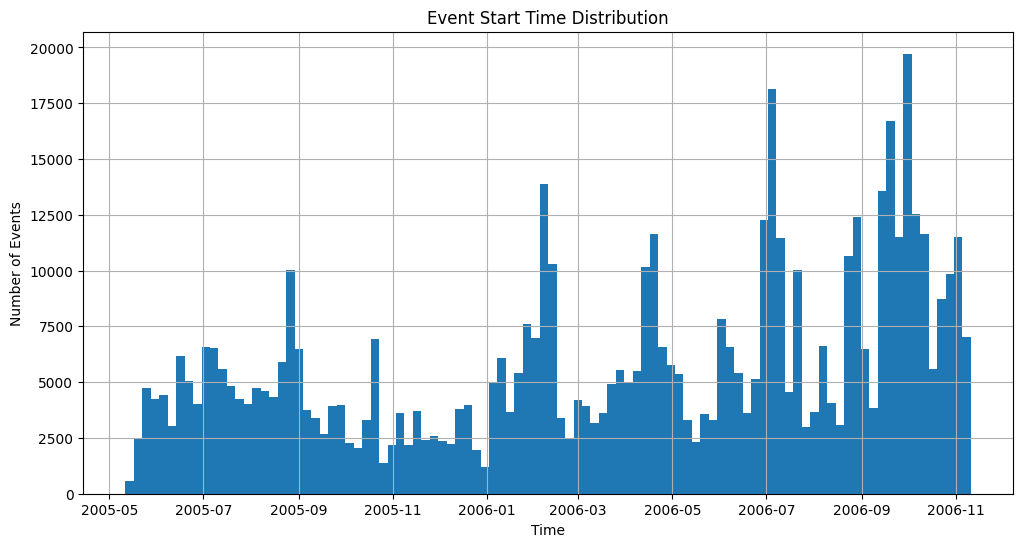

In [257]:
import matplotlib.pyplot as plt

# Event Trace Over Time
plt.figure(figsize=(12, 6))
event_trace['event_start_time'].hist(bins=100)
plt.title('Event Start Time Distribution')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.show()


#**Feature Engineering**

In [258]:
import pandas as pd
import numpy as np

# Assume final_merged_data is the DataFrame with the provided initial features
final_merged_data['event_start_time'] = pd.to_datetime(final_merged_data['event_start_time'])
final_merged_data['event_stop_time'] = pd.to_datetime(final_merged_data['event_stop_time'])

# Feature 1: event_duration (duration of each event)
final_merged_data['event_duration'] = (final_merged_data['event_stop_time'] - final_merged_data['event_start_time']).dt.total_seconds()

# Feature 2: time_since_last_event
#final_merged_data['time_since_last_event'] = final_merged_data.groupby('node_id')['event_start_time'].diff().dt.total_seconds()

# Feature 3: time_until_next_failure
# final_merged_data['time_until_next_failure'] = (final_merged_data['event_start_time'].shift(-1) - final_merged_data['event_stop_time']).dt.total_seconds()

# Feature 4: fault_frequency (number of faults per node)
final_merged_data['fault_frequency'] = final_merged_data.groupby('node_id')['event_type'].transform(lambda x: (x == 0).sum())

# Feature 5: avg_event_duration (average duration of events per node)
final_merged_data['avg_event_duration'] = final_merged_data.groupby('node_id')['event_duration'].transform('mean')

# Feature 6: total_event_duration (total duration of all events per node)
final_merged_data['total_event_duration'] = final_merged_data.groupby('node_id')['event_duration'].transform('sum')

# Feature 7: event_count (total number of events per node)
final_merged_data['event_count'] = final_merged_data.groupby('node_id')['event_id'].transform('count')

# Feature 8: start_hour (hour of the day when the event started)
final_merged_data['start_hour'] = final_merged_data['event_start_time'].dt.hour

# Feature 9: start_day_of_week (day of the week when the event started)
#final_merged_data['start_day_of_week'] = final_merged_data['event_start_time'].dt.dayofweek

# Feature 10: availability_ratio (ratio of available events to total events per node)
#availability = final_merged_data.groupby('node_id')['event_type'].apply(lambda x: (x == 1).sum())
#total_events = final_merged_data.groupby('node_id')['event_id'].count()
#availability_ratio = availability / total_events
#final_merged_data = final_merged_data.merge(availability_ratio.rename('availability_ratio'), on='node_id', how='left')

#Feature 11: time between failures

final_merged_data.loc[final_merged_data['event_type'] == 0, 'time_between_failures'] = (
    final_merged_data.loc[final_merged_data['event_type'] == 0, 'event_stop_time'] -
    final_merged_data.loc[final_merged_data['event_type'] == 0, 'event_start_time']
).dt.total_seconds()

#Feature 12: time to repair

final_merged_data.loc[final_merged_data['event_type'] == 1, 'time_to_repair'] = (
    final_merged_data.loc[final_merged_data['event_type'] == 1, 'event_stop_time'] -
    final_merged_data.loc[final_merged_data['event_type'] == 1, 'event_start_time']
).dt.total_seconds()



# Replace NaN or missing values in engineered features with 0
final_merged_data.fillna(0, inplace=True)

# Verify the new engineered features
print(final_merged_data.head())

   node_id          node_name  event_id  event_type    event_start_time  \
0        0  G1/site1/c1/node1         0           0 2005-05-11 11:32:19   
1        0  G1/site1/c1/node1         1           1 2005-05-23 14:09:12   
2        0  G1/site1/c1/node1         2           0 2005-05-23 14:17:15   
3        0  G1/site1/c1/node1         3           1 2005-05-23 18:16:04   
4        0  G1/site1/c1/node1         4           0 2005-05-23 22:03:14   

      event_stop_time node_location  event_duration  fault_frequency  \
0 2005-05-23 14:09:12   G1/site1/c1       1046213.0              211   
1 2005-05-23 14:17:15   G1/site1/c1           483.0              211   
2 2005-05-23 18:16:04   G1/site1/c1         14329.0              211   
3 2005-05-23 22:03:14   G1/site1/c1         13630.0              211   
4 2005-05-26 23:11:20   G1/site1/c1        263286.0              211   

   avg_event_duration  total_event_duration  event_count  start_hour  \
0       112214.372038            47354465.0 

In [259]:
print(final_merged_data.head(10))

   node_id          node_name  event_id  event_type    event_start_time  \
0        0  G1/site1/c1/node1         0           0 2005-05-11 11:32:19   
1        0  G1/site1/c1/node1         1           1 2005-05-23 14:09:12   
2        0  G1/site1/c1/node1         2           0 2005-05-23 14:17:15   
3        0  G1/site1/c1/node1         3           1 2005-05-23 18:16:04   
4        0  G1/site1/c1/node1         4           0 2005-05-23 22:03:14   
5        0  G1/site1/c1/node1         5           1 2005-05-26 23:11:20   
6        0  G1/site1/c1/node1         6           0 2005-05-27 09:05:36   
7        0  G1/site1/c1/node1         7           1 2005-05-27 09:37:04   
8        0  G1/site1/c1/node1         8           0 2005-05-27 09:40:14   
9        0  G1/site1/c1/node1         9           1 2005-05-27 10:40:09   

      event_stop_time node_location  event_duration  fault_frequency  \
0 2005-05-23 14:09:12   G1/site1/c1       1046213.0              211   
1 2005-05-23 14:17:15   G1/sit

In [260]:
# Loop through each column and print unique values, their count, and frequency
for column in final_merged_data.columns:
    print(f"Column: {column}")
    print(f"Number of Unique Values: {final_merged_data[column].nunique()}")
    print("Value Counts:")
    print(final_merged_data[column].value_counts().head(10))  # Display top 10 most frequent values
    print("-" * 50)


Column: node_id
Number of Unique Values: 1288
Value Counts:
node_id
868    2449
865    2213
885    1977
875    1877
209    1661
867    1627
96     1495
122    1479
270    1446
104    1439
Name: count, dtype: int64
--------------------------------------------------
Column: node_name
Number of Unique Values: 1288
Value Counts:
node_name
G1/site7/c1/node29     2449
G1/site7/c1/node26     2213
G1/site7/c1/node46     1977
G1/site7/c1/node36     1877
G1/site8/c1/node64     1661
G1/site7/c1/node28     1627
G1/site8/c1/node12     1495
G1/site8/c1/node38     1479
G1/site8/c1/node113    1446
G1/site8/c1/node20     1439
Name: count, dtype: int64
--------------------------------------------------
Column: event_id
Number of Unique Values: 2449
Value Counts:
event_id
0    1288
1    1285
2    1260
3    1260
5    1258
4    1258
6    1257
7    1256
9    1248
8    1248
Name: count, dtype: int64
--------------------------------------------------
Column: event_type
Number of Unique Values: 2
Value Counts:

In [261]:
# Calculate time until the next failure
#final_merged_data['time_until_next_failure'] = final_merged_data['event_start_time'] - final_merged_data['event_stop_time'].shift(-1)

# Convert timedelta to seconds
#final_merged_data['time_until_next_failure'] = final_merged_data['time_until_next_failure'].dt.total_seconds()

# Handle the first row separately
#final_merged_data['time_until_next_failure'].iloc[-1] = None  # Set last row to NaN or default value


In [262]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588463 entries, 0 to 588462
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   node_id                588463 non-null  int64         
 1   node_name              588463 non-null  object        
 2   event_id               588463 non-null  int64         
 3   event_type             588463 non-null  int64         
 4   event_start_time       588463 non-null  datetime64[ns]
 5   event_stop_time        588463 non-null  datetime64[ns]
 6   node_location          588463 non-null  object        
 7   event_duration         588463 non-null  float64       
 8   fault_frequency        588463 non-null  int64         
 9   avg_event_duration     588463 non-null  float64       
 10  total_event_duration   588463 non-null  float64       
 11  event_count            588463 non-null  int64         
 12  start_hour             588463 non-null  int3

##Normalization

In [263]:
'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
final_merged_data['event_duration_scaled'] = scaler.fit_transform(final_merged_data[['event_duration']]).
'''

"\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\n\nscaler = StandardScaler()\nfinal_merged_data['event_duration_scaled'] = scaler.fit_transform(final_merged_data[['event_duration']]).\n"

In [264]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
final_merged_data['event_duration_scaled'] = scaler.fit_transform(final_merged_data[['event_duration']])

#### Following lines are written by Yogesh Sharma
final_merged_data['time_between_failures_scaled'] = scaler.fit_transform(final_merged_data[['time_between_failures']])
final_merged_data['time_to_repair_scaled'] = scaler.fit_transform(final_merged_data[['time_to_repair']])

In [265]:
final_merged_data.columns

Index(['node_id', 'node_name', 'event_id', 'event_type', 'event_start_time',
       'event_stop_time', 'node_location', 'event_duration', 'fault_frequency',
       'avg_event_duration', 'total_event_duration', 'event_count',
       'start_hour', 'time_between_failures', 'time_to_repair',
       'event_duration_scaled', 'time_between_failures_scaled',
       'time_to_repair_scaled'],
      dtype='object')

In [266]:
final_merged_data.describe()

node_id       event_id     event_type  \
count  588463.000000  588463.000000  588463.000000   
mean      459.524203     374.223557       0.500147   
min         0.000000       0.000000       0.000000   
25%       210.000000     126.000000       0.000000   
50%       371.000000     291.000000       1.000000   
75%       745.000000     557.000000       1.000000   
max      1287.000000    2448.000000       1.000000   
std       307.042252     313.525784       0.500000   

                    event_start_time                event_stop_time  \
count                         588463                         588463   
mean   2006-03-31 20:14:57.678521728  2006-04-01 16:09:46.307982336   
min              2005-05-11 11:32:19            2005-05-11 11:37:13   
25%              2005-11-16 23:30:17            2005-11-18 16:25:48   
50%              2006-04-24 07:54:11            2006-04-24 16:25:46   
75%       2006-08-28 12:49:37.500000            2006-08-28 18:04:51   
max              2006-11-10 13:33:24            2006-11-10 13:33:24   
std                              NaN                            NaN   

       event_duration  fault_frequency  avg_event_duration  \
count    5.884630e+05    588463.000000        5.884630e+05   
mean     7.168863e+04       374.710500        7.168863e+04   
min      0.000000e+00         1.000000        1.050279e+04   
25%      1.630000e+02       215.000000        4.277685e+04   
50%      1.807000e+03       368.000000        5.482743e+04   
75%      4.236000e+04       508.000000        7.441812e+04   
max      3.656783e+07      1224.000000        1.136754e+07   
std      2.882677e+05       196.603506        6.718001e+04   

       total_event_duration    event_count     start_hour  \
count          5.884630e+05  588463.000000  588463.000000   
mean           4.004891e+07     749.447114      12.510999   
min            1.659730e+05       1.000000       0.000000   
25%            3.057576e+07     429.000000       8.000000   
50%            4.665815e+07     737.000000      13.000000   
75%            4.722564e+07    1016.000000      17.000000   
max            4.735446e+07    2449.000000      23.000000   
std            1.109907e+07     393.036282       5.415507   

       time_between_failures  time_to_repair  event_duration_scaled  \
count           5.884630e+05    5.884630e+05          588463.000000   
mean            1.334055e+04    5.834808e+04               0.001960   
min             0.000000e+00    0.000000e+00               0.000000   
25%             0.000000e+00    0.000000e+00               0.000004   
50%             0.000000e+00    2.000000e+00               0.000049   
75%             1.710000e+02    2.557150e+04               0.001158   
max             2.273381e+07    3.656783e+07               1.000000   
std             1.539099e+05    2.469146e+05               0.007883   

       time_between_failures_scaled  time_to_repair_scaled  
count                 588463.000000           5.884630e+05  
mean                       0.000587           1.595612e-03  
min                        0.000000           0.000000e+00  
25%                        0.000000           0.000000e+00  
50%                        0.000000           5.469288e-08  
75%                        0.000008           6.992895e-04  
max                        1.000000           1.000000e+00  
std                        0.006770           6.752236e-03

In [267]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588463 entries, 0 to 588462
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   node_id                       588463 non-null  int64         
 1   node_name                     588463 non-null  object        
 2   event_id                      588463 non-null  int64         
 3   event_type                    588463 non-null  int64         
 4   event_start_time              588463 non-null  datetime64[ns]
 5   event_stop_time               588463 non-null  datetime64[ns]
 6   node_location                 588463 non-null  object        
 7   event_duration                588463 non-null  float64       
 8   fault_frequency               588463 non-null  int64         
 9   avg_event_duration            588463 non-null  float64       
 10  total_event_duration          588463 non-null  float64       
 11  event_count  

In [268]:
final_merged_data.head()

node_id          node_name  event_id  event_type    event_start_time  \
0        0  G1/site1/c1/node1         0           0 2005-05-11 11:32:19   
1        0  G1/site1/c1/node1         1           1 2005-05-23 14:09:12   
2        0  G1/site1/c1/node1         2           0 2005-05-23 14:17:15   
3        0  G1/site1/c1/node1         3           1 2005-05-23 18:16:04   
4        0  G1/site1/c1/node1         4           0 2005-05-23 22:03:14   

      event_stop_time node_location  event_duration  fault_frequency  \
0 2005-05-23 14:09:12   G1/site1/c1       1046213.0              211   
1 2005-05-23 14:17:15   G1/site1/c1           483.0              211   
2 2005-05-23 18:16:04   G1/site1/c1         14329.0              211   
3 2005-05-23 22:03:14   G1/site1/c1         13630.0              211   
4 2005-05-26 23:11:20   G1/site1/c1        263286.0              211   

   avg_event_duration  total_event_duration  event_count  start_hour  \
0       112214.372038            47354465.0          422          11   
1       112214.372038            47354465.0          422          14   
2       112214.372038            47354465.0          422          14   
3       112214.372038            47354465.0          422          18   
4       112214.372038            47354465.0          422          22   

   time_between_failures  time_to_repair  event_duration_scaled  \
0              1046213.0             0.0               0.028610   
1                    0.0           483.0               0.000013   
2                14329.0             0.0               0.000392   
3                    0.0         13630.0               0.000373   
4               263286.0             0.0               0.007200   

   time_between_failures_scaled  time_to_repair_scaled  
0                      0.046020               0.000000  
1                      0.000000               0.000013  
2                      0.000630               0.000000  
3                      0.000000               0.000373  
4                      0.011581               0.000000

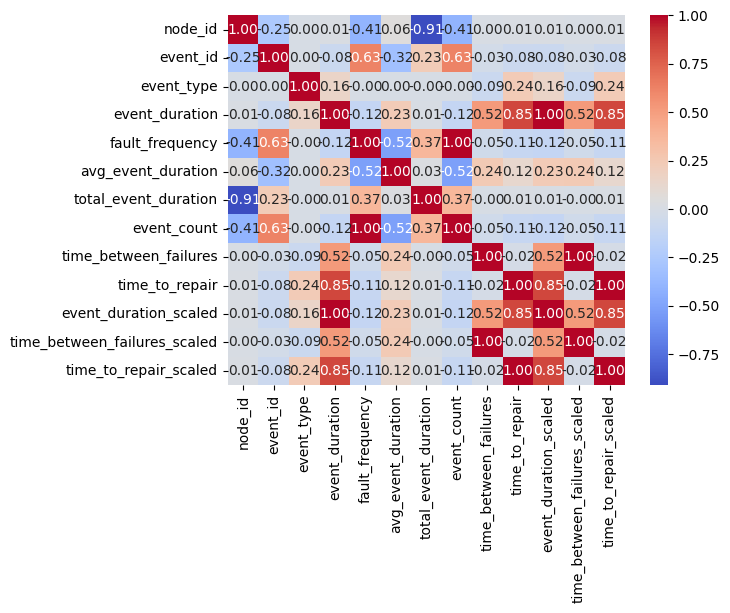

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = final_merged_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns
correlation_matrix = final_merged_data[numerical_cols].corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [270]:
final_merged_data.columns

Index(['node_id', 'node_name', 'event_id', 'event_type', 'event_start_time',
       'event_stop_time', 'node_location', 'event_duration', 'fault_frequency',
       'avg_event_duration', 'total_event_duration', 'event_count',
       'start_hour', 'time_between_failures', 'time_to_repair',
       'event_duration_scaled', 'time_between_failures_scaled',
       'time_to_repair_scaled'],
      dtype='object')

# Site wise datasets

In [271]:
import pandas as pd

# List of all site names (from the node_location values)
sites = ['site1', 'site2', 'site3', 'site4', 'site5', 'site6', 'site7', 'site8', 'site9']

# Create a dictionary to hold dataframes for each site
site_dfs = {}

# Iterate through each site and filter the dataframe by node_location
for site in sites:
    site_dfs[site] = final_merged_data[final_merged_data['node_location'].str.contains(f'/{site}/')]

# Now you can access each site's dataframe like this:
# site_dfs['site1'], site_dfs['site2'], ..., site_dfs['site9']


In [272]:
site1_df = site_dfs['site1']
site2_df = site_dfs['site2']
site3_df = site_dfs['site3']
site4_df = site_dfs['site4']
site5_df = site_dfs['site5']
site6_df = site_dfs['site6']
site7_df = site_dfs['site7']
site8_df = site_dfs['site8']
site9_df = site_dfs['site9']

In [273]:
print(site1_df.head())

   node_id          node_name  event_id  event_type    event_start_time  \
0        0  G1/site1/c1/node1         0           0 2005-05-11 11:32:19   
1        0  G1/site1/c1/node1         1           1 2005-05-23 14:09:12   
2        0  G1/site1/c1/node1         2           0 2005-05-23 14:17:15   
3        0  G1/site1/c1/node1         3           1 2005-05-23 18:16:04   
4        0  G1/site1/c1/node1         4           0 2005-05-23 22:03:14   

      event_stop_time node_location  event_duration  fault_frequency  \
0 2005-05-23 14:09:12   G1/site1/c1       1046213.0              211   
1 2005-05-23 14:17:15   G1/site1/c1           483.0              211   
2 2005-05-23 18:16:04   G1/site1/c1         14329.0              211   
3 2005-05-23 22:03:14   G1/site1/c1         13630.0              211   
4 2005-05-26 23:11:20   G1/site1/c1        263286.0              211   

   avg_event_duration  total_event_duration  event_count  start_hour  \
0       112214.372038            47354465.0 

In [274]:
# Loop through each column and print unique values, their count, and frequency
for column in site1_df.columns:
    print(f"Column: {column}")
    print(f"Number of Unique Values: {site1_df[column].nunique()}")
    print("Value Counts:")
    print(site1_df[column].value_counts().head(100))  # Display top 10 most frequent values
    print("-" * 50)

Column: node_id
Number of Unique Values: 259
Value Counts:
node_id
352    1120
398    1104
402    1002
463    1001
405     980
       ... 
798     580
784     580
759     578
342     577
748     576
Name: count, Length: 100, dtype: int64
--------------------------------------------------
Column: node_name
Number of Unique Values: 259
Value Counts:
node_name
G1/site1/c2/node28    1120
G1/site1/c2/node31    1104
G1/site1/c2/node35    1002
G1/site1/c2/node51    1001
G1/site1/c2/node38     980
                      ... 
G1/site1/c3/node58     580
G1/site1/c3/node44     580
G1/site1/c3/node19     578
G1/site1/c2/node19     577
G1/site1/c3/node8      576
Name: count, Length: 100, dtype: int64
--------------------------------------------------
Column: event_id
Number of Unique Values: 1120
Value Counts:
event_id
0      259
1      259
2      259
3      259
4      259
      ... 
101    259
97     259
112    259
8      259
7      259
Name: count, Length: 100, dtype: int64
-----------------------

In [275]:
print(site2_df.head())

        node_id          node_name  event_id  event_type    event_start_time  \
138462      670  G1/site2/c1/node1         0           1 2005-10-20 13:43:32   
138463      670  G1/site2/c1/node1         1           0 2005-10-20 13:53:11   
138464      670  G1/site2/c1/node1         2           1 2005-10-20 13:55:12   
138465      670  G1/site2/c1/node1         3           0 2005-10-20 13:55:29   
138466      670  G1/site2/c1/node1         4           1 2005-10-20 13:58:06   

           event_stop_time node_location  event_duration  fault_frequency  \
138462 2005-10-20 13:53:11   G1/site2/c1           579.0              169   
138463 2005-10-20 13:55:12   G1/site2/c1           121.0              169   
138464 2005-10-20 13:55:29   G1/site2/c1            17.0              169   
138465 2005-10-20 13:58:06   G1/site2/c1           157.0              169   
138466 2005-10-20 14:03:13   G1/site2/c1           307.0              169   

        avg_event_duration  total_event_duration  event_

## Cluster Wise Datasets

In [276]:
# List of clusters
clusters = [
    'G1/site1/c1', 'G1/site1/c2', 'G1/site1/c3', 'G1/site1/c4',
    'G1/site2/c1', 'G1/site3/c1', 'G1/site4/c1', 'G1/site4/c2',
    'G1/site5/c1', 'G1/site5/c2', 'G1/site6/c1', 'G1/site6/c2',
    'G1/site7/c1', 'G1/site8/c1', 'G1/site9/c1'
]

cluster_column = 'node_location'

# Create a dictionary to store dataframes for each cluster
cluster_dataframes = {}

# Generate dataframes for each cluster
for cluster in clusters:
    cluster_dataframes[cluster] = final_merged_data[final_merged_data[cluster_column] == cluster]

for cluster, df in cluster_dataframes.items():
    print(f"Cluster {cluster}: {len(df)} rows")


Cluster G1/site1/c1: 26134 rows
Cluster G1/site1/c2: 50924 rows
Cluster G1/site1/c3: 51907 rows
Cluster G1/site1/c4: 9497 rows
Cluster G1/site2/c1: 16369 rows
Cluster G1/site3/c1: 11564 rows
Cluster G1/site4/c1: 69181 rows
Cluster G1/site4/c2: 5858 rows
Cluster G1/site5/c1: 10746 rows
Cluster G1/site5/c2: 4366 rows
Cluster G1/site6/c1: 26000 rows
Cluster G1/site6/c2: 2254 rows
Cluster G1/site7/c1: 42285 rows
Cluster G1/site8/c1: 246707 rows
Cluster G1/site9/c1: 14671 rows


In [277]:
cluster1_df = cluster_dataframes['G1/site1/c1']
cluster2_df = cluster_dataframes['G1/site1/c2']
cluster3_df = cluster_dataframes['G1/site1/c3']
cluster4_df = cluster_dataframes['G1/site1/c4']
cluster5_df = cluster_dataframes['G1/site2/c1']
cluster6_df = cluster_dataframes['G1/site3/c1']
cluster7_df = cluster_dataframes['G1/site4/c1']
cluster8_df = cluster_dataframes['G1/site4/c2']
cluster9_df = cluster_dataframes['G1/site5/c1']
cluster10_df = cluster_dataframes['G1/site5/c2']
cluster11_df = cluster_dataframes['G1/site6/c1']
cluster12_df = cluster_dataframes['G1/site6/c2']
cluster13_df = cluster_dataframes['G1/site7/c1']
cluster14_df = cluster_dataframes['G1/site8/c1']
cluster15_df = cluster_dataframes['G1/site9/c1']

In [278]:
print(cluster1_df.head())

   node_id          node_name  event_id  event_type    event_start_time  \
0        0  G1/site1/c1/node1         0           0 2005-05-11 11:32:19   
1        0  G1/site1/c1/node1         1           1 2005-05-23 14:09:12   
2        0  G1/site1/c1/node1         2           0 2005-05-23 14:17:15   
3        0  G1/site1/c1/node1         3           1 2005-05-23 18:16:04   
4        0  G1/site1/c1/node1         4           0 2005-05-23 22:03:14   

      event_stop_time node_location  event_duration  fault_frequency  \
0 2005-05-23 14:09:12   G1/site1/c1       1046213.0              211   
1 2005-05-23 14:17:15   G1/site1/c1           483.0              211   
2 2005-05-23 18:16:04   G1/site1/c1         14329.0              211   
3 2005-05-23 22:03:14   G1/site1/c1         13630.0              211   
4 2005-05-26 23:11:20   G1/site1/c1        263286.0              211   

   avg_event_duration  total_event_duration  event_count  start_hour  \
0       112214.372038            47354465.0 

In [279]:
print(cluster2_df.head())

       node_id          node_name  event_id  event_type    event_start_time  \
26134      320  G1/site1/c2/node1         0           0 2005-05-17 16:16:03   
26135      320  G1/site1/c2/node1         1           1 2005-05-26 09:46:25   
26136      320  G1/site1/c2/node1         2           0 2005-06-09 16:05:07   
26137      320  G1/site1/c2/node1         3           1 2005-06-09 20:57:06   
26138      320  G1/site1/c2/node1         4           0 2005-06-10 13:30:13   

          event_stop_time node_location  event_duration  fault_frequency  \
26134 2005-05-26 09:46:25   G1/site1/c2        754222.0              435   
26135 2005-06-09 16:05:07   G1/site1/c2       1232322.0              435   
26136 2005-06-09 20:57:06   G1/site1/c2         17519.0              435   
26137 2005-06-10 13:30:13   G1/site1/c2         59587.0              435   
26138 2005-06-10 13:35:06   G1/site1/c2           293.0              435   

       avg_event_duration  total_event_duration  event_count  start_

## Node-Wise datasets for nodes with the number of highest, median and lowest event counts in each of the 15 clusters, totaling 45 nodes in all

In [280]:
# List of node_ids
node_ids = [
    9, 20, 11, 342, 447, 352, 820, 839, 780, 889, 429, 434, 1268, 887, 683,
    888, 717, 79, 454, 663, 458, 1250, 1060, 1019, 520, 523, 491, 1171, 1161,
    1141, 542, 622, 577, 1210, 1229, 1208, 840, 872, 868, 965, 273, 209, 1282,
    1101, 1078
]

node_id_column = 'node_id'

# Generate dataframes for each node_id
for node_id in node_ids:
    dataframe_name = f"node{node_id}_df"
    globals()[dataframe_name] = final_merged_data[final_merged_data[node_id_column] == node_id]

# Print summary for each dynamically created dataframe
for node_id in node_ids:
    dataframe_name = f"node{node_id}_df"
    print(f"{dataframe_name}: {len(globals()[dataframe_name])} rows")


node9_df: 302 rows
node20_df: 376 rows
node11_df: 558 rows
node342_df: 577 rows
node447_df: 780 rows
node352_df: 1120 rows
node820_df: 306 rows
node839_df: 534 rows
node780_df: 892 rows
node889_df: 113 rows
node429_df: 244 rows
node434_df: 789 rows
node1268_df: 2 rows
node887_df: 75 rows
node683_df: 619 rows
node888_df: 2 rows
node717_df: 203 rows
node79_df: 255 rows
node454_df: 111 rows
node663_df: 655 rows
node458_df: 913 rows
node1250_df: 1 rows
node1060_df: 92 rows
node1019_df: 242 rows
node520_df: 108 rows
node523_df: 179 rows
node491_df: 561 rows
node1171_df: 2 rows
node1161_df: 83 rows
node1141_df: 153 rows
node542_df: 136 rows
node622_df: 252 rows
node577_df: 474 rows
node1210_df: 57 rows
node1229_df: 91 rows
node1208_df: 175 rows
node840_df: 403 rows
node872_df: 909 rows
node868_df: 2449 rows
node965_df: 33 rows
node273_df: 834 rows
node209_df: 1661 rows
node1282_df: 1 rows
node1101_df: 173 rows
node1078_df: 594 rows


In [281]:
node9_df.head()

node_id           node_name  event_id  event_type    event_start_time  \
422        9  G1/site1/c1/node10         0           0 2005-05-11 11:32:20   
423        9  G1/site1/c1/node10         1           1 2005-05-23 14:09:12   
424        9  G1/site1/c1/node10         2           0 2005-05-24 08:21:08   
425        9  G1/site1/c1/node10         3           1 2005-05-24 10:00:06   
426        9  G1/site1/c1/node10         4           0 2005-05-25 12:08:27   

        event_stop_time node_location  event_duration  fault_frequency  \
422 2005-05-23 14:09:12   G1/site1/c1       1046212.0              151   
423 2005-05-24 08:21:08   G1/site1/c1         65516.0              151   
424 2005-05-24 10:00:06   G1/site1/c1          5938.0              151   
425 2005-05-25 12:08:27   G1/site1/c1         94101.0              151   
426 2005-05-25 16:31:04   G1/site1/c1         15757.0              151   

     avg_event_duration  total_event_duration  event_count  start_hour  \
422       156802.860927            47354464.0          302          11   
423       156802.860927            47354464.0          302          14   
424       156802.860927            47354464.0          302           8   
425       156802.860927            47354464.0          302          10   
426       156802.860927            47354464.0          302          12   

     time_between_failures  time_to_repair  event_duration_scaled  \
422              1046212.0             0.0               0.028610   
423                    0.0         65516.0               0.001792   
424                 5938.0             0.0               0.000162   
425                    0.0         94101.0               0.002573   
426                15757.0             0.0               0.000431   

     time_between_failures_scaled  time_to_repair_scaled  
422                      0.046020               0.000000  
423                      0.000000               0.001792  
424                      0.000261               0.000000  
425                      0.000000               0.002573  
426                      0.000693               0.000000

# **Problem statement 1 - Prediction of Event Type (Classification)**

### Target Variable - 'event_type'

In [282]:
# Dropping irrelevant or highly correlated columns for model input
X = final_merged_data.drop(columns=[
    'event_type','node_name', 'node_location'])  # Dropping the target from features

y = final_merged_data['event_type']

In [283]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pipeline

In [284]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing for numerical data (scaling)
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical data (one-hot encoding)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Integrate preprocessing into a full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


## Model 1 - Logistic Regression

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Append the Logistic Regression model to the pipeline
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(max_iter=1000))])

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9130449559447036

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     59039
           1       1.00      0.83      0.90     58654

    accuracy                           0.91    117693
   macro avg       0.93      0.91      0.91    117693
weighted avg       0.93      0.91      0.91    117693


Confusion Matrix:
 [[59038     1]
 [10233 48421]]


### Feature importance

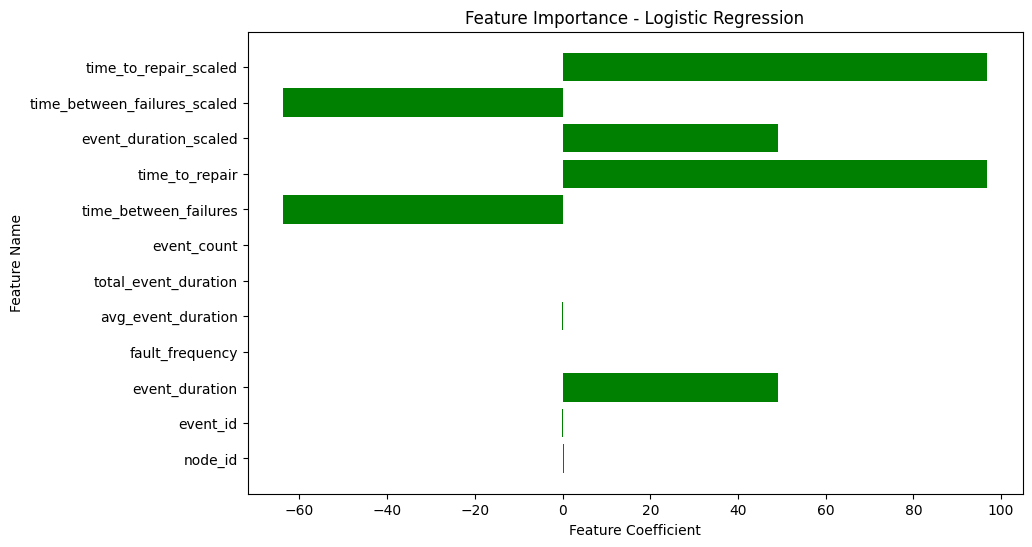

In [286]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importance from Logistic Regression
logreg_importance = log_reg.named_steps['classifier'].coef_[0]  # Coefficients of the model
feature_names = log_reg.named_steps['preprocessor'].transformers_[0][2]  # Feature names from preprocessor

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, logreg_importance, color="green")
plt.xlabel("Feature Coefficient")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Logistic Regression")
plt.show()


### Learning curve for model 1

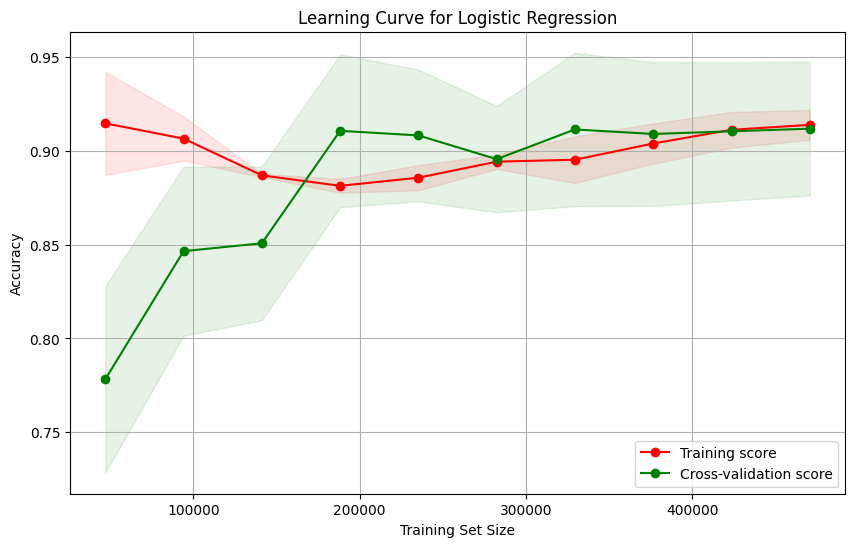

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")

    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1)

    # Calculate mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve for the Logistic Regression model
plot_learning_curve(log_reg,
                    title="Learning Curve for Logistic Regression",
                    X=X, y=y, cv=5, scoring='accuracy')


## Model 1 (Logistic Regressoin) on 9 sites

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define a function to preprocess and train the model for each site
def train_and_evaluate_logistic_regression(site_name, site_df, target_column='target'):

    target_column = 'event_type'

    # Define features (X) and target (y)
    X = site_df.drop(columns=[target_column, 'node_name', 'node_location'])
    y = site_df[target_column]  # Target column

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define preprocessing for numeric and categorical columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )

    # Create a pipeline for Logistic Regression
    log_reg = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    # Train the model
    log_reg.fit(X_train, y_train)

    # Predict on the test set
    y_pred = log_reg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f"\nPerformance for {site_name}: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", matrix)


# Iterate through all 9 site DataFrames and run the model
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

for site_name, site_df in site_dataframes.items():
    print(f"Processing data for {site_name}")
    train_and_evaluate_logistic_regression(site_name, site_df)


Processing data for site1

Performance for site1: 
Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     13829
           1       0.99      0.77      0.87     13864

    accuracy                           0.88     27693
   macro avg       0.90      0.88      0.88     27693
weighted avg       0.90      0.88      0.88     27693


Confusion Matrix:
 [[13740    89]
 [ 3188 10676]]
Processing data for site2

Performance for site2: 
Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1589
           1       1.00      0.80      0.89      1685

    accuracy                           0.90      3274
   macro avg       0.91      0.90      0.90      3274
weighted avg       0.92      0.90      0.90      3274


Confusion Matrix:
 [[1589    0]
 [ 333 1352]]
Processing data for site3

Performance for site3: 
Accuracy: 0.89


## Model 1 (Logistic Regression) on 15 clusters

In [289]:
# List of clusters
clusters = [
    'G1/site1/c1', 'G1/site1/c2', 'G1/site1/c3', 'G1/site1/c4',
    'G1/site2/c1', 'G1/site3/c1', 'G1/site4/c1', 'G1/site4/c2',
    'G1/site5/c1', 'G1/site5/c2', 'G1/site6/c1', 'G1/site6/c2',
    'G1/site7/c1', 'G1/site8/c1', 'G1/site9/c1'
]

# Initialize a dictionary to store results
cluster_results = {}

# Loop through each cluster
for cluster in clusters:
    # Filter data for the current cluster
    cluster_df = final_merged_data[final_merged_data['node_location'] == cluster]

    # Split data into features and target
    X = cluster_df.drop(columns=['event_type', 'node_name', 'node_location'])
    y = cluster_df['event_type']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    log_reg.fit(X_train, y_train)

    # Predict on the test set
    y_pred = log_reg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results for the cluster
    cluster_results[cluster] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': confusion
    }

# Print results for all clusters
for cluster, result in cluster_results.items():
    print(f"Cluster: {cluster}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")
    print("-" * 50)


Cluster: G1/site1/c1
Accuracy: 0.9544671895925004
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2617
           1       0.97      0.94      0.95      2610

    accuracy                           0.95      5227
   macro avg       0.95      0.95      0.95      5227
weighted avg       0.95      0.95      0.95      5227

Confusion Matrix:
[[2541   76]
 [ 162 2448]]
--------------------------------------------------
Cluster: G1/site1/c2
Accuracy: 0.9120274914089347
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      5147
           1       0.98      0.84      0.90      5038

    accuracy                           0.91     10185
   macro avg       0.92      0.91      0.91     10185
weighted avg       0.92      0.91      0.91     10185

Confusion Matrix:
[[5078   69]
 [ 827 4211]]
--------------------------------------------------
Cluster:

## Model 1 (Logistic Regression) on 45 nodes

In [290]:
# List of node dataframes and their corresponding IDs
node_dataframes = {
    9: node9_df, 20: node20_df, 11: node11_df, 342: node342_df, 447: node447_df,
    352: node352_df, 820: node820_df, 839: node839_df, 780: node780_df, 889: node889_df,
    429: node429_df, 434: node434_df, 1268: node1268_df, 887: node887_df, 683: node683_df,
    888: node888_df, 717: node717_df, 79: node79_df, 454: node454_df, 663: node663_df,
    458: node458_df, 1250: node1250_df, 1060: node1060_df, 1019: node1019_df, 520: node520_df,
    523: node523_df, 491: node491_df, 1171: node1171_df, 1161: node1161_df, 1141: node1141_df,
    542: node542_df, 622: node622_df, 577: node577_df, 1210: node1210_df, 1229: node1229_df,
    1208: node1208_df, 840: node840_df, 872: node872_df, 868: node868_df, 965: node965_df,
    273: node273_df, 209: node209_df, 1282: node1282_df, 1101: node1101_df, 1078: node1078_df
}

# Initialize a dictionary to store results
node_results = {}

for node_id, node_df in node_dataframes.items():
  print(f"Node {node_id} columns: {node_df.columns.tolist()}")

# Loop through each node dataframe
for node_id, node_df in node_dataframes.items():
    # Check if the dataframe has sufficient rows for splitting
    if len(node_df) < 10:
        print(f"Node {node_id} has insufficient data ({len(node_df)} rows). Skipping...")
        continue

    # Split data into features and target
    X = node_df.drop(columns=['event_type'])
    y = node_df['event_type']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    log_reg.fit(X_train, y_train)

    # Predict on the test set
    y_pred = log_reg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results for the node
    node_results[node_id] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': confusion
    }

# Print results for all nodes
for node_id, result in node_results.items():
    print(f"Node ID: {node_id}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")
    print("-" * 50)


Node 9 columns: ['node_id', 'node_name', 'event_id', 'event_type', 'event_start_time', 'event_stop_time', 'node_location', 'event_duration', 'fault_frequency', 'avg_event_duration', 'total_event_duration', 'event_count', 'start_hour', 'time_between_failures', 'time_to_repair', 'event_duration_scaled', 'time_between_failures_scaled', 'time_to_repair_scaled']
Node 20 columns: ['node_id', 'node_name', 'event_id', 'event_type', 'event_start_time', 'event_stop_time', 'node_location', 'event_duration', 'fault_frequency', 'avg_event_duration', 'total_event_duration', 'event_count', 'start_hour', 'time_between_failures', 'time_to_repair', 'event_duration_scaled', 'time_between_failures_scaled', 'time_to_repair_scaled']
Node 11 columns: ['node_id', 'node_name', 'event_id', 'event_type', 'event_start_time', 'event_stop_time', 'node_location', 'event_duration', 'fault_frequency', 'avg_event_duration', 'total_event_duration', 'event_count', 'start_hour', 'time_between_failures', 'time_to_repair', 

## Model 2 - Random Forest Classifier

In [291]:
from sklearn.ensemble import RandomForestClassifier

# Append the Random Forest model to the pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=10, random_state=42))])

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        50

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119


Confusion Matrix:
 [[69  0]
 [ 0 50]]


### Feature Importance

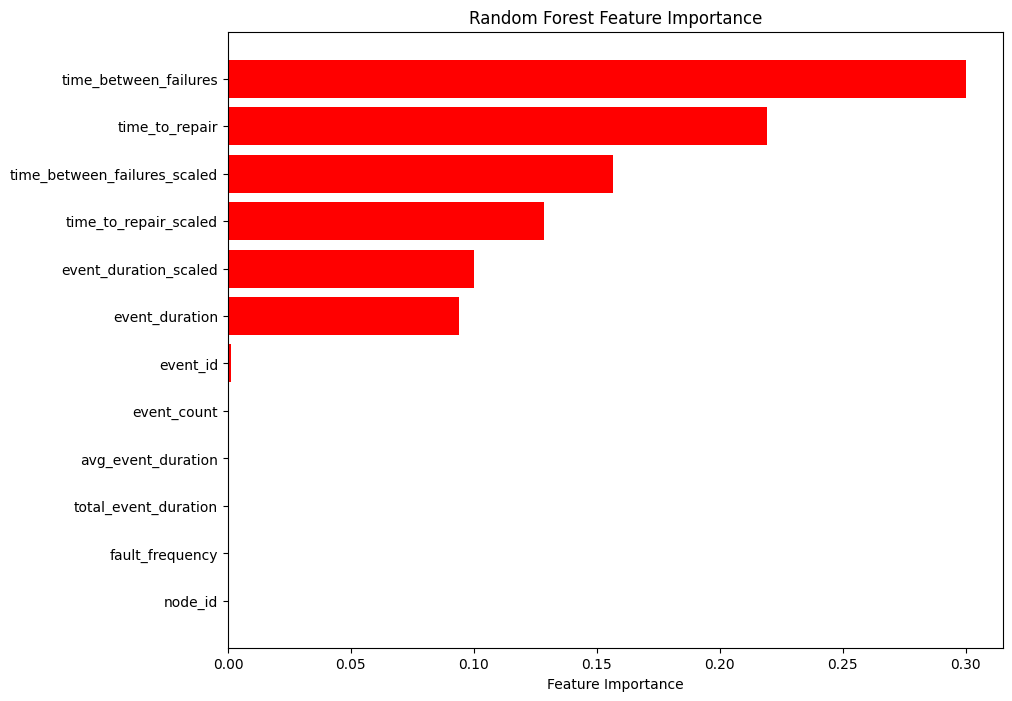

In [292]:
# Importances from the Rrandom Forest Model
importances_rf = rf_model.named_steps['classifier'].feature_importances_

# Numerical features
all_features = num_features.tolist()

# Ensure the length of all_features matches importances_rf
assert len(all_features) == len(importances_rf), "Mismatch between the number of features and importances."

# Sort the feature importances
sorted_indices_rf = importances_rf.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices_rf)), importances_rf[sorted_indices_rf], align='center', color="red")
plt.yticks(range(len(sorted_indices_rf)), [all_features[i] for i in sorted_indices_rf])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


### Learning curve for model 2

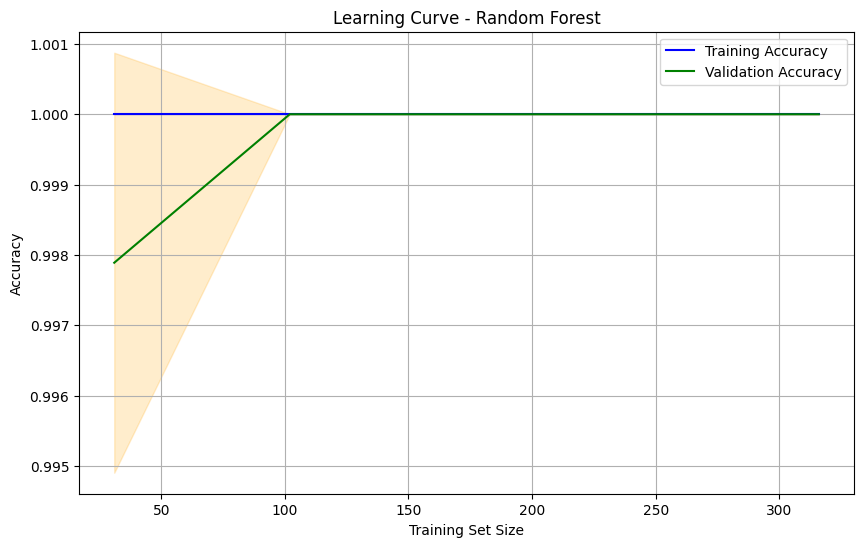

In [293]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model, X=X_train, y=y_train, cv=3, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest')
plt.legend(loc='best')
plt.grid()
plt.show()


## Model 2 (Random Forest) on 9 sites

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define a function to preprocess and train the model for each site
def train_and_evaluate_random_forest_regression(site_name, site_df, target_column='target'):
    """
    Trains and evaluates a Logistic Regression model for the given site data.
    Parameters:
        - site_df: DataFrame containing data for a single site.
        - target_column: The column name to predict (default: 'target').
    """

    target_column = 'event_type'

    # Define features (X) and target (y)
    X = site_df.drop(columns=[target_column, 'node_name', 'node_location'])
    y = site_df[target_column]  # Target column

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f"\nPerformance for {site_name}: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", matrix)


# Iterate through all 9 site DataFrames and run the model
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

for site_name, site_df in site_dataframes.items():
    print(f"Processing data for {site_name}")
    train_and_evaluate_random_forest_regression(site_name, site_df)


Processing data for site1

Performance for site1: 
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13829
           1       1.00      1.00      1.00     13864

    accuracy                           1.00     27693
   macro avg       1.00      1.00      1.00     27693
weighted avg       1.00      1.00      1.00     27693


Confusion Matrix:
 [[13829     0]
 [    1 13863]]
Processing data for site2

Performance for site2: 
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1589
           1       1.00      1.00      1.00      1685

    accuracy                           1.00      3274
   macro avg       1.00      1.00      1.00      3274
weighted avg       1.00      1.00      1.00      3274


Confusion Matrix:
 [[1589    0]
 [   1 1684]]
Processing data for site3

Performance for site3: 
Accuracy: 1.00


## Model 2 (Random Forest) on 15 clusters

In [295]:
# List of clusters
clusters = [
    'G1/site1/c1', 'G1/site1/c2', 'G1/site1/c3', 'G1/site1/c4',
    'G1/site2/c1', 'G1/site3/c1', 'G1/site4/c1', 'G1/site4/c2',
    'G1/site5/c1', 'G1/site5/c2', 'G1/site6/c1', 'G1/site6/c2',
    'G1/site7/c1', 'G1/site8/c1', 'G1/site9/c1'
]

# Initialize a dictionary to store results
cluster_results = {}

# Loop through each cluster
for cluster in clusters:
    # Filter data for the current cluster
    cluster_df = final_merged_data[final_merged_data['node_location'] == cluster]

    # Split data into features and target
    X = cluster_df.drop(columns=['event_type'])
    y = cluster_df['event_type']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results for the cluster
    cluster_results[cluster] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': confusion
    }

# Print results for all clusters
for cluster, result in cluster_results.items():
    print(f"Cluster: {cluster}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")
    print("-" * 50)


Cluster: G1/site1/c1
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2617
           1       1.00      1.00      1.00      2610

    accuracy                           1.00      5227
   macro avg       1.00      1.00      1.00      5227
weighted avg       1.00      1.00      1.00      5227

Confusion Matrix:
[[2617    0]
 [   0 2610]]
--------------------------------------------------
Cluster: G1/site1/c2
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5147
           1       1.00      1.00      1.00      5038

    accuracy                           1.00     10185
   macro avg       1.00      1.00      1.00     10185
weighted avg       1.00      1.00      1.00     10185

Confusion Matrix:
[[5147    0]
 [   0 5038]]
--------------------------------------------------
Cluster: G1/site1/c3
Accuracy: 1.0
Cla

## Model 2 (Random Forest) on 45 Nodes, 3 from each of 15 clusters

In [296]:
# List of node dataframes and their corresponding IDs
node_dataframes = {
    9: node9_df, 20: node20_df, 11: node11_df, 342: node342_df, 447: node447_df,
    352: node352_df, 820: node820_df, 839: node839_df, 780: node780_df, 889: node889_df,
    429: node429_df, 434: node434_df, 1268: node1268_df, 887: node887_df, 683: node683_df,
    888: node888_df, 717: node717_df, 79: node79_df, 454: node454_df, 663: node663_df,
    458: node458_df, 1250: node1250_df, 1060: node1060_df, 1019: node1019_df, 520: node520_df,
    523: node523_df, 491: node491_df, 1171: node1171_df, 1161: node1161_df, 1141: node1141_df,
    542: node542_df, 622: node622_df, 577: node577_df, 1210: node1210_df, 1229: node1229_df,
    1208: node1208_df, 840: node840_df, 872: node872_df, 868: node868_df, 965: node965_df,
    273: node273_df, 209: node209_df, 1282: node1282_df, 1101: node1101_df, 1078: node1078_df
}

# Initialize a dictionary to store results
node_results = {}

# Loop through each node dataframe
for node_id, node_df in node_dataframes.items():
    # Check if the dataframe has sufficient rows for splitting
    if len(node_df) < 10:
        print(f"Node {node_id} has insufficient data ({len(node_df)} rows). Skipping...")
        continue

    # Split data into features and target
    X = node_df.drop(columns=['event_type'])
    y = node_df['event_type']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results for the node
    node_results[node_id] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': confusion
    }

# Print results for all nodes
for node_id, result in node_results.items():
    print(f"Node ID: {node_id}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")
    print("-" * 50)


Node 1268 has insufficient data (2 rows). Skipping...
Node 888 has insufficient data (2 rows). Skipping...
Node 1250 has insufficient data (1 rows). Skipping...
Node 1171 has insufficient data (2 rows). Skipping...
Node 1282 has insufficient data (1 rows). Skipping...
Node ID: 9
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Confusion Matrix:
[[29  0]
 [ 0 32]]
--------------------------------------------------
Node ID: 20
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        38

    accuracy                           1.00        76
 

## Model 3 - XGBoost Classifier

In [297]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Extract datetime columns
datetime_columns = ['event_start_time', 'event_stop_time']

# Convert datetime columns to numerical features (e.g., timestamps)
for col in datetime_columns:
    X_train[col] = X_train[col].astype('int64') // 10**9  # Convert to Unix timestamp
    X_test[col] = X_test[col].astype('int64') // 10**9

# Drop categorical columns (object type)
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_train_numeric = X_train.drop(columns=categorical_columns)
X_test_numeric = X_test.drop(columns=categorical_columns)

# Scale numeric columns only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        50

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119


Confusion Matrix:
 [[69  0]
 [ 0 50]]


### Feature Importance

Number of features in model: 15
Number of features in transformed data: 15


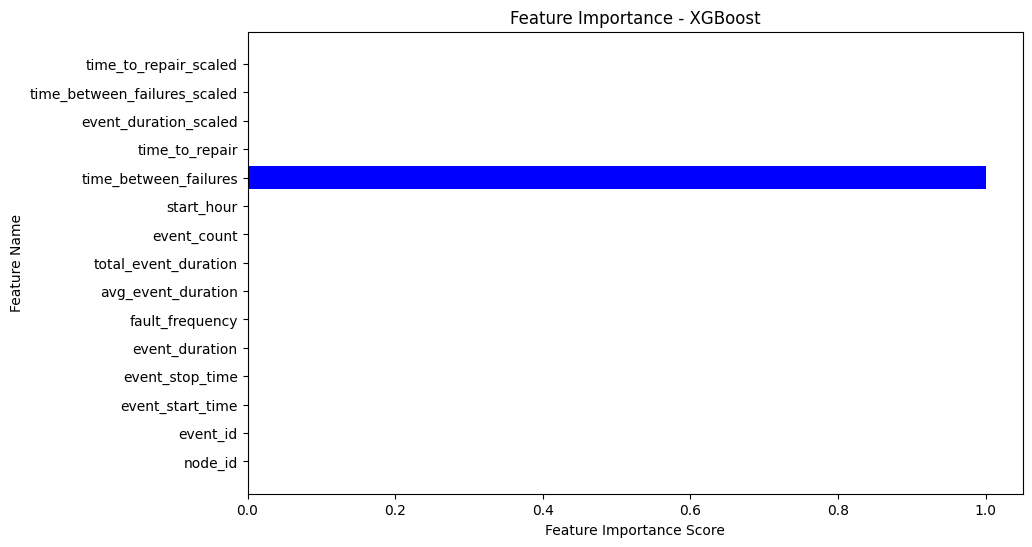

In [298]:
import matplotlib.pyplot as plt

# Extract feature importance from XGBoost
xgb_importance = xgb_model.feature_importances_

# Use the original DataFrame column names (from numeric features)
transformed_feature_names = X_train_numeric.columns  # Columns from the original numeric DataFrame

# Check the number of features
print(f"Number of features in model: {len(xgb_importance)}")
print(f"Number of features in transformed data: {len(transformed_feature_names)}")

# Ensure lengths match before plotting
if len(xgb_importance) == len(transformed_feature_names):
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(transformed_feature_names, xgb_importance, color="blue")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature Name")
    plt.title("Feature Importance - XGBoost")
    plt.show()
else:
    print("Mismatch between model feature importance and transformed data columns.")


### Learning curve for model 3

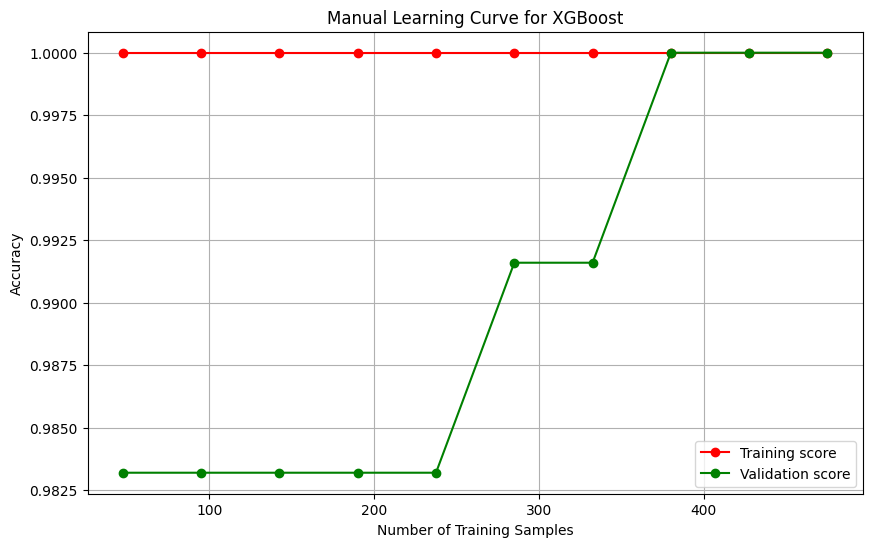

In [299]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def plot_learning_curve_manual_xgb(X_train, X_test, y_train, y_test, datetime_columns, title="Manual Learning Curve for XGBoost"):
    # Convert datetime columns to numerical format
    for col in datetime_columns:
        X_train[col] = X_train[col].astype('int64') // 10**9  # Convert to Unix timestamp
        X_test[col] = X_test[col].astype('int64') // 10**9

    # Select only numeric columns (drop non-numeric ones)
    X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
    X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])

    # Scale numeric columns
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_numeric)
    X_test_scaled = scaler.transform(X_test_numeric)

    # Convert labels to NumPy arrays
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

    # Define training set sizes
    train_sizes = np.linspace(0.1, 1.0, 10)  # 10 different sizes
    train_scores = []
    test_scores = []

    # Loop over different training sizes
    for size in train_sizes:
        # Calculate the number of samples for the current size
        n_samples = int(size * len(X_train_scaled))

        # Create subsets for the current size
        X_train_subset = X_train_scaled[:n_samples]
        y_train_subset = y_train[:n_samples]

        # Train the XGBoost model
        xgb_model = XGBClassifier(random_state=42)
        xgb_model.fit(X_train_subset, y_train_subset)

        # Evaluate on training subset
        y_train_pred = xgb_model.predict(X_train_subset)
        train_accuracy = accuracy_score(y_train_subset, y_train_pred)

        # Evaluate on the full test set
        y_test_pred = xgb_model.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store the scores
        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes * len(X_train_scaled), train_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes * len(X_train_scaled), test_scores, 'o-', color="g", label="Validation score")
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve_manual_xgb(X_train, X_test, y_train, y_test, datetime_columns)


## Model 3 on 9 sites

In [300]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_and_evaluate_model3(resource_name, data, target_column='event_type'):
    """
    Train and evaluate the XGBoost model for a given node.
    Handles cases where there is only one class in the target variable.
    """
    # Split features and target
    X = data.drop(columns=[target_column, 'node_name', 'node_location'])
    y = data[target_column]

    # Check for unique classes in y
    unique_classes = y.unique()
    if len(unique_classes) < 2:
        print(f"Node {resource_name} skipped: Only one class ({unique_classes[0]}) in the target.")
        return  # Exit early for this node

    # Convert datetime columns to numerical features (e.g., Unix timestamps)
    datetime_columns = ['event_start_time', 'event_stop_time']
    for col in datetime_columns:
        if col in X.columns:
            X[col] = pd.to_datetime(X[col]).astype('int64') // 10**9  # Convert to Unix timestamp

    # Split into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Select numeric columns for scaling
    numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

    # Scale numeric features
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
    X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

    # Train the XGBoost model
    xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')  # Updated: removed 'use_label_encoder'
    xgb_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Performance for: {resource_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", matrix)


In [301]:
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_model3(site_name, site_df)



Processing data for site1
Performance for: site1
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13829
           1       1.00      1.00      1.00     13864

    accuracy                           1.00     27693
   macro avg       1.00      1.00      1.00     27693
weighted avg       1.00      1.00      1.00     27693


Confusion Matrix:
 [[13820     9]
 [    5 13859]]

Processing data for site2
Performance for: site2
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1589
           1       1.00      1.00      1.00      1685

    accuracy                           1.00      3274
   macro avg       1.00      1.00      1.00      3274
weighted avg       1.00      1.00      1.00      3274


Confusion Matrix:
 [[1586    3]
 [   1 1684]]

Processing data for site3
Performance for: site3
Accuracy: 1.00

Cl

## Model 3 on 15 Clusters

In [302]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model3(cluster_name, cluster_df)



Processing data for G1/site1/c1
Performance for: G1/site1/c1
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2617
           1       1.00      1.00      1.00      2610

    accuracy                           1.00      5227
   macro avg       1.00      1.00      1.00      5227
weighted avg       1.00      1.00      1.00      5227


Confusion Matrix:
 [[2617    0]
 [   0 2610]]

Processing data for G1/site1/c2
Performance for: G1/site1/c2
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5147
           1       1.00      1.00      1.00      5038

    accuracy                           1.00     10185
   macro avg       1.00      1.00      1.00     10185
weighted avg       1.00      1.00      1.00     10185


Confusion Matrix:
 [[5146    1]
 [   0 5038]]

Processing data for G1/site1/c3
Performance for

##Model 3 on 45 Nodes

In [303]:
node1268_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 154022 to 154023
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   node_id                       2 non-null      int64         
 1   node_name                     2 non-null      object        
 2   event_id                      2 non-null      int64         
 3   event_type                    2 non-null      int64         
 4   event_start_time              2 non-null      datetime64[ns]
 5   event_stop_time               2 non-null      datetime64[ns]
 6   node_location                 2 non-null      object        
 7   event_duration                2 non-null      float64       
 8   fault_frequency               2 non-null      int64         
 9   avg_event_duration            2 non-null      float64       
 10  total_event_duration          2 non-null      float64       
 11  event_count                   2

In [304]:
node888_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 165549 to 165550
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   node_id                       2 non-null      int64         
 1   node_name                     2 non-null      object        
 2   event_id                      2 non-null      int64         
 3   event_type                    2 non-null      int64         
 4   event_start_time              2 non-null      datetime64[ns]
 5   event_stop_time               2 non-null      datetime64[ns]
 6   node_location                 2 non-null      object        
 7   event_duration                2 non-null      float64       
 8   fault_frequency               2 non-null      int64         
 9   avg_event_duration            2 non-null      float64       
 10  total_event_duration          2 non-null      float64       
 11  event_count                   2

In [305]:
node1171_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 254540 to 254541
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   node_id                       2 non-null      int64         
 1   node_name                     2 non-null      object        
 2   event_id                      2 non-null      int64         
 3   event_type                    2 non-null      int64         
 4   event_start_time              2 non-null      datetime64[ns]
 5   event_stop_time               2 non-null      datetime64[ns]
 6   node_location                 2 non-null      object        
 7   event_duration                2 non-null      float64       
 8   fault_frequency               2 non-null      int64         
 9   avg_event_duration            2 non-null      float64       
 10  total_event_duration          2 non-null      float64       
 11  event_count                   2

In [306]:
node_dataframes = {
    9: node9_df, 20: node20_df, 11: node11_df, 342: node342_df, 447: node447_df,
    352: node352_df, 820: node820_df, 839: node839_df, 780: node780_df, 889: node889_df,
    429: node429_df, 434: node434_df, 887: node887_df, 683: node683_df,
    717: node717_df, 79: node79_df, 454: node454_df, 663: node663_df,
    458: node458_df, 1250: node1250_df, 1060: node1060_df, 1019: node1019_df, 520: node520_df,
    523: node523_df, 491: node491_df, 1161: node1161_df, 1141: node1141_df,
    542: node542_df, 622: node622_df, 577: node577_df, 1210: node1210_df, 1229: node1229_df,
    1208: node1208_df, 840: node840_df, 872: node872_df, 868: node868_df, 965: node965_df,
    273: node273_df, 209: node209_df, 1282: node1282_df, 1101: node1101_df, 1078: node1078_df
}

# Nodes 1268, 888, 1171 removed owing to only 2 entries each
for node_id, node_df in node_dataframes.items():
    print(f"\nProcessing data for Node {node_id}")
    train_and_evaluate_model3(node_id, node_df)



Processing data for Node 9
Performance for: 9
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


Confusion Matrix:
 [[29  0]
 [ 0 32]]

Processing data for Node 20
Performance for: 20
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        38

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76


Confusion Matrix:
 [[38  0]
 [ 0 38]]

Processing data for Node 11
Performance for: 11
Accuracy: 1.00

Classification Report:
    

##Rainforest model Cross-validation for robustness

In [307]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Perform cross-validation with the Random Forest model
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(n_estimators=10, random_state=42))])

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

# Output the cross-validation scores and the mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


In [308]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions
y_pred_cv = cross_val_predict(rf_model, X_train, y_train, cv=5)

# Print the classification report
print("Classification Report for Cross-Validated Model:")
print(classification_report(y_train, y_pred_cv))


Classification Report for Cross-Validated Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       247

    accuracy                           1.00       475
   macro avg       1.00      1.00      1.00       475
weighted avg       1.00      1.00      1.00       475



# **Problem statement 2 - Prediction of time-to-next-Event**

In [309]:
pip install scikit-survival

In [310]:
final_merged_data.head(10)

node_id          node_name  event_id  event_type    event_start_time  \
0        0  G1/site1/c1/node1         0           0 2005-05-11 11:32:19   
1        0  G1/site1/c1/node1         1           1 2005-05-23 14:09:12   
2        0  G1/site1/c1/node1         2           0 2005-05-23 14:17:15   
3        0  G1/site1/c1/node1         3           1 2005-05-23 18:16:04   
4        0  G1/site1/c1/node1         4           0 2005-05-23 22:03:14   
5        0  G1/site1/c1/node1         5           1 2005-05-26 23:11:20   
6        0  G1/site1/c1/node1         6           0 2005-05-27 09:05:36   
7        0  G1/site1/c1/node1         7           1 2005-05-27 09:37:04   
8        0  G1/site1/c1/node1         8           0 2005-05-27 09:40:14   
9        0  G1/site1/c1/node1         9           1 2005-05-27 10:40:09   

      event_stop_time node_location  event_duration  fault_frequency  \
0 2005-05-23 14:09:12   G1/site1/c1       1046213.0              211   
1 2005-05-23 14:17:15   G1/site1/c1           483.0              211   
2 2005-05-23 18:16:04   G1/site1/c1         14329.0              211   
3 2005-05-23 22:03:14   G1/site1/c1         13630.0              211   
4 2005-05-26 23:11:20   G1/site1/c1        263286.0              211   
5 2005-05-27 09:05:36   G1/site1/c1         35656.0              211   
6 2005-05-27 09:37:04   G1/site1/c1          1888.0              211   
7 2005-05-27 09:40:14   G1/site1/c1           190.0              211   
8 2005-05-27 10:40:09   G1/site1/c1          3595.0              211   
9 2005-05-27 11:59:06   G1/site1/c1          4737.0              211   

   avg_event_duration  total_event_duration  event_count  start_hour  \
0       112214.372038            47354465.0          422          11   
1       112214.372038            47354465.0          422          14   
2       112214.372038            47354465.0          422          14   
3       112214.372038            47354465.0          422          18   
4       112214.372038            47354465.0          422          22   
5       112214.372038            47354465.0          422          23   
6       112214.372038            47354465.0          422           9   
7       112214.372038            47354465.0          422           9   
8       112214.372038            47354465.0          422           9   
9       112214.372038            47354465.0          422          10   

   time_between_failures  time_to_repair  event_duration_scaled  \
0              1046213.0             0.0               0.028610   
1                    0.0           483.0               0.000013   
2                14329.0             0.0               0.000392   
3                    0.0         13630.0               0.000373   
4               263286.0             0.0               0.007200   
5                    0.0         35656.0               0.000975   
6                 1888.0             0.0               0.000052   
7                    0.0           190.0               0.000005   
8                 3595.0             0.0               0.000098   
9                    0.0          4737.0               0.000130   

   time_between_failures_scaled  time_to_repair_scaled  
0                      0.046020               0.000000  
1                      0.000000               0.000013  
2                      0.000630               0.000000  
3                      0.000000               0.000373  
4                      0.011581               0.000000  
5                      0.000000               0.000975  
6                      0.000083               0.000000  
7                      0.000000               0.000005  
8                      0.000158               0.000000  
9                      0.000000               0.000130

In [311]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588463 entries, 0 to 588462
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   node_id                       588463 non-null  int64         
 1   node_name                     588463 non-null  object        
 2   event_id                      588463 non-null  int64         
 3   event_type                    588463 non-null  int64         
 4   event_start_time              588463 non-null  datetime64[ns]
 5   event_stop_time               588463 non-null  datetime64[ns]
 6   node_location                 588463 non-null  object        
 7   event_duration                588463 non-null  float64       
 8   fault_frequency               588463 non-null  int64         
 9   avg_event_duration            588463 non-null  float64       
 10  total_event_duration          588463 non-null  float64       
 11  event_count  

In [312]:
# Prepare the dataframe with relevant features and target
# Convert datetime columns into total seconds since epoch
final_merged_data['event_start_time'] = pd.to_datetime(final_merged_data['event_start_time'])
final_merged_data['event_stop_time'] = pd.to_datetime(final_merged_data['event_stop_time'])

final_merged_data['event_start_seconds'] = final_merged_data['event_start_time'].astype('int64') // 1e9
final_merged_data['event_stop_seconds'] = final_merged_data['event_stop_time'].astype('int64') // 1e9

# Define features (X) and target (y)
X = final_merged_data.drop(columns=[
    'node_name', 'node_location',  # Non-numeric/categorical columns
    'event_start_time', 'event_stop_time',  # Original datetime columns
    'event_start_seconds',
    'event_stop_seconds',  # Remove target from features
    'event_duration'
])
y = final_merged_data['event_stop_seconds']  # Numeric target variable

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [313]:
'''
# Prepare the dataframe with relevant features and target
# Convert datetime columns into total seconds since epoch
final_merged_data['event_start_time'] = pd.to_datetime(final_merged_data['event_start_time'])
final_merged_data['event_stop_time'] = pd.to_datetime(final_merged_data['event_stop_time'])

final_merged_data['event_start_seconds'] = final_merged_data['event_start_time'].astype('int64') // 1e9
final_merged_data['event_stop_seconds'] = final_merged_data['event_stop_time'].astype('int64') // 1e9

# Define features (X) and target (y)
X = final_merged_data.drop(columns=[
    'node_name', 'node_location',  # Non-numeric/categorical columns
    'event_start_time', 'event_stop_time',  # Original datetime columns
    'event_start_seconds',
    'event_stop_seconds',  # Remove target from features
    'event_duration'
])
y = final_merged_data['event_stop_seconds']  # Numeric target variable

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
'''

"\n# Prepare the dataframe with relevant features and target\n# Convert datetime columns into total seconds since epoch\nfinal_merged_data['event_start_time'] = pd.to_datetime(final_merged_data['event_start_time'])\nfinal_merged_data['event_stop_time'] = pd.to_datetime(final_merged_data['event_stop_time'])\n\nfinal_merged_data['event_start_seconds'] = final_merged_data['event_start_time'].astype('int64') // 1e9\nfinal_merged_data['event_stop_seconds'] = final_merged_data['event_stop_time'].astype('int64') // 1e9\n\n# Define features (X) and target (y)\nX = final_merged_data.drop(columns=[\n    'node_name', 'node_location',  # Non-numeric/categorical columns\n    'event_start_time', 'event_stop_time',  # Original datetime columns\n    'event_start_seconds',\n    'event_stop_seconds',  # Remove target from features\n    'event_duration'\n])\ny = final_merged_data['event_stop_seconds']  # Numeric target variable\n\n# Normalize numeric features\nscaler = StandardScaler()\nX_scaled = scaler

## Model 4 - Linear Regressor

In [314]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model2 = LinearRegression()

# Train the model on the training data
linear_model2.fit(X_train, y_train)

# Predict on train and test data
y_pred_train_lr = linear_model2.predict(X_train)
y_pred_test_lr = linear_model2.predict(X_test)

# Calculate evaluation metrics for training data
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
rmse_train_lr = mse_train_lr ** 0.5
r2_train_lr = r2_score(y_train, y_pred_train_lr)

# Calculate evaluation metrics for test data
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
rmse_test_lr = mse_test_lr ** 0.5
r2_test_lr = r2_score(y_test, y_pred_test_lr)

# Print the results
print("\nLinear Regression Results:")
print(f"Training MAE: {mae_train_lr:.2f}, RMSE: {rmse_train_lr:.2f}, R2: {r2_train_lr:.2f}")
print(f"Test MAE: {mae_test_lr:.2f}, RMSE: {rmse_test_lr:.2f}, R2: {r2_test_lr:.2f}")



Linear Regression Results:
Training MAE: 4922620.48, RMSE: 6544696.65, R2: 0.78
Test MAE: 4921424.79, RMSE: 6560452.92, R2: 0.78


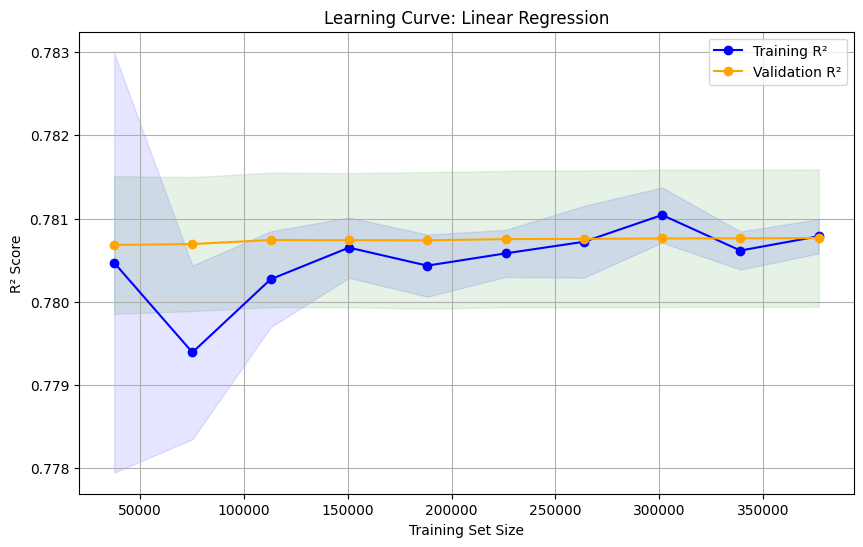


Linear Regression Results:
Training MAE: 4922620.48, RMSE: 6544696.65, R2: 0.78
Test MAE: 4921424.79, RMSE: 6560452.92, R2: 0.78


In [315]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(),  # Model
    X_train,             # Features
    y_train,             # Target
    cv=5,                # Cross-validation folds
    scoring='r2',        # Evaluation metric (R²)
    n_jobs=-1,           # Use all available cores
    train_sizes=np.linspace(0.1, 1.0, 10)  # Training sizes from 10% to 100%
)

# Calculate mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training R²', color='blue', marker='o')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation R²', color='orange', marker='o')
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color='green')

# Customize the plot
plt.title('Learning Curve: Linear Regression')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# Print evaluation results from the original code
print("\nLinear Regression Results:")
print(f"Training MAE: {mae_train_lr:.2f}, RMSE: {rmse_train_lr:.2f}, R2: {r2_train_lr:.2f}")
print(f"Test MAE: {mae_test_lr:.2f}, RMSE: {rmse_test_lr:.2f}, R2: {r2_test_lr:.2f}")


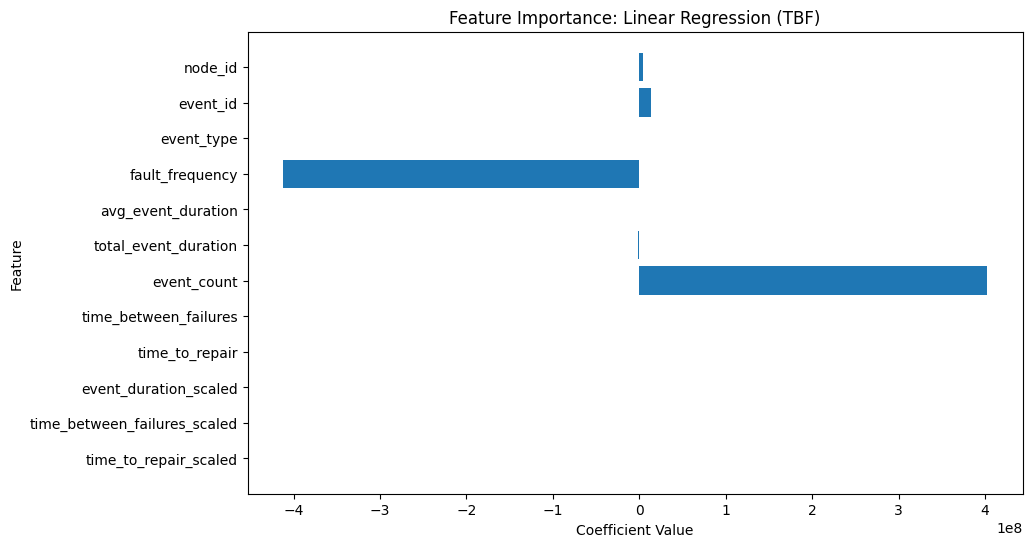

In [316]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train the Linear Regression model
linear_model2 = LinearRegression()
linear_model2.fit(X_train, y_train)

# Get the coefficients from the model (feature importance)
lr_importance = linear_model2.coef_

# Use the feature names after selecting numeric columns (preprocessed names)
feature_names = X.select_dtypes(include=['float64', 'int64']).columns

# Ensure the shape matches between feature names and coefficients
assert len(feature_names) == len(lr_importance), \
    f"Mismatch between number of features ({len(feature_names)}) and importance scores ({len(lr_importance)})!"

# Plot the feature importance for Linear Regression (coefficients)
plt.figure(figsize=(10, 6))
#plt.barh(feature_names, lr_importance, color="green")
plt.barh(feature_names, lr_importance)
plt.title("Feature Importance: Linear Regression (TBF)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.savefig('TBF_Linear_Regression_Feature_Importance.png')
plt.show()


## Model 4 on 9 sites

In [317]:
# Function to train and evaluate Linear Regression
def train_and_evaluate_model4(df, name):
    if not isinstance(df, pd.DataFrame):
        print(f"Error: {name} is not a valid DataFrame. Received {type(df)}")
        return

    # Preprocess the data
    df['event_start_time'] = pd.to_datetime(df['event_start_time'])
    df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])

    df['event_start_seconds'] = df['event_start_time'].astype('int64') // 1e9
    df['event_stop_seconds'] = df['event_stop_time'].astype('int64') // 1e9

    X = df.drop(columns=[
        'node_name', 'node_location',
        'event_start_time', 'event_stop_time',
        'event_start_seconds', 'event_stop_seconds'
    ])
    y = df['event_stop_seconds']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
    r2_test = r2_score(y_test, y_pred_test)

    print(f"\n{name} - Linear Regression Results:")
    print(f"Training MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")
    print(f"Test MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")

In [318]:
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

# Iterate over sites
for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_model4(site_df, f"Site: {site_name}")


Processing data for site1


/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation


Site: site1 - Linear Regression Results:
Training MAE: 3616074.22, RMSE: 4830213.53, R2: 0.89
Test MAE: 3624833.00, RMSE: 4844611.70, R2: 0.89

Processing data for site2

Site: site2 - Linear Regression Results:
Training MAE: 1877522.87, RMSE: 2652538.56, R2: 0.89
Test MAE: 1862987.94, RMSE: 2634609.79, R2: 0.89

Processing data for site3


/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation


Site: site3 - Linear Regression Results:
Training MAE: 2309508.66, RMSE: 3426229.97, R2: 0.87
Test MAE: 2373968.24, RMSE: 3588955.78, R2: 0.87

Processing data for site4

Site: site4 - Linear Regression Results:
Training MAE: 2929161.31, RMSE: 3642655.14, R2: 0.93
Test MAE: 2970102.03, RMSE: 3680118.75, R2: 0.93

Processing data for site5

Site: site5 - Linear Regression Results:
Training MAE: 3453381.93, RMSE: 5739065.37, R2: 0.63
Test MAE: 3409850.96, RMSE: 5641087.26, R2: 0.64

Processing data for site6


/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation


Site: site6 - Linear Regression Results:
Training MAE: 3036772.79, RMSE: 4151913.50, R2: 0.82
Test MAE: 3024259.12, RMSE: 4117859.54, R2: 0.81

Processing data for site7

Site: site7 - Linear Regression Results:
Training MAE: 3823028.18, RMSE: 4693771.20, R2: 0.59
Test MAE: 3781302.38, RMSE: 4647160.65, R2: 0.60

Processing data for site8


/tmp/ipython-input-3227960899.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_seconds'] = df['event_stop_time'].astype('int64') // 1e9



Site: site8 - Linear Regression Results:
Training MAE: 2934651.81, RMSE: 3850616.98, R2: 0.93
Test MAE: 2942793.85, RMSE: 3865873.95, R2: 0.93

Processing data for site9

Site: site9 - Linear Regression Results:
Training MAE: 1576242.26, RMSE: 2145182.07, R2: 0.37
Test MAE: 1551688.81, RMSE: 2131935.69, R2: 0.38


/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

## Model 4 on 15 clusters

In [319]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model4(cluster_df, f"Site: {cluster_name}")

/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation


Processing data for G1/site1/c1

Site: G1/site1/c1 - Linear Regression Results:
Training MAE: 2356432.88, RMSE: 3475081.96, R2: 0.86
Test MAE: 2371222.46, RMSE: 3463888.62, R2: 0.86

Processing data for G1/site1/c2

Site: G1/site1/c2 - Linear Regression Results:
Training MAE: 2667234.45, RMSE: 3274261.37, R2: 0.95
Test MAE: 2686145.24, RMSE: 3295335.67, R2: 0.95

Processing data for G1/site1/c3


/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_seconds'] = df['event_start_time'].astype('int64') // 1e9
/tmp/ipython-input-3227960899.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do


Site: G1/site1/c3 - Linear Regression Results:
Training MAE: 3234551.64, RMSE: 4121692.71, R2: 0.77
Test MAE: 3259496.71, RMSE: 4137594.04, R2: 0.77

Processing data for G1/site1/c4

Site: G1/site1/c4 - Linear Regression Results:
Training MAE: 5315716.97, RMSE: 7047597.51, R2: 0.69
Test MAE: 5478928.29, RMSE: 7238920.92, R2: 0.69

Processing data for G1/site2/c1

Site: G1/site2/c1 - Linear Regression Results:
Training MAE: 1877522.87, RMSE: 2652538.56, R2: 0.89
Test MAE: 1862987.94, RMSE: 2634609.79, R2: 0.89

Processing data for G1/site3/c1


/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_seconds'] = df['event_start_time'].astype('int64') // 1e9
/tmp/ipython-input-3227960899.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do


Site: G1/site3/c1 - Linear Regression Results:
Training MAE: 2309508.66, RMSE: 3426229.97, R2: 0.87
Test MAE: 2373968.24, RMSE: 3588955.78, R2: 0.87

Processing data for G1/site4/c1

Site: G1/site4/c1 - Linear Regression Results:
Training MAE: 2918415.09, RMSE: 3572040.09, R2: 0.93
Test MAE: 2922465.71, RMSE: 3566913.83, R2: 0.93

Processing data for G1/site4/c2

Site: G1/site4/c2 - Linear Regression Results:
Training MAE: 1517113.63, RMSE: 1883338.45, R2: 0.80
Test MAE: 1502589.86, RMSE: 1867356.68, R2: 0.80

Processing data for G1/site5/c1


/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation


Site: G1/site5/c1 - Linear Regression Results:
Training MAE: 4013430.85, RMSE: 6451483.11, R2: 0.60
Test MAE: 4197337.57, RMSE: 6723851.18, R2: 0.58

Processing data for G1/site5/c2

Site: G1/site5/c2 - Linear Regression Results:
Training MAE: 729405.23, RMSE: 1079833.83, R2: 0.62
Test MAE: 801503.60, RMSE: 1219487.06, R2: 0.60

Processing data for G1/site6/c1

Site: G1/site6/c1 - Linear Regression Results:
Training MAE: 3180488.29, RMSE: 4306423.43, R2: 0.80
Test MAE: 3104830.50, RMSE: 4172564.26, R2: 0.81

Processing data for G1/site6/c2

Site: G1/site6/c2 - Linear Regression Results:
Training MAE: 1293913.30, RMSE: 1561204.15, R2: 0.71
Test MAE: 1343113.50, RMSE: 1593087.24, R2: 0.71

Processing data for G1/site7/c1


/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_seconds'] = df['event_start_time'].astype('int64') // 1e9
/tmp/ipython-input-3227960899.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do


Site: G1/site7/c1 - Linear Regression Results:
Training MAE: 3823028.18, RMSE: 4693771.20, R2: 0.59
Test MAE: 3781302.38, RMSE: 4647160.65, R2: 0.60

Processing data for G1/site8/c1

Site: G1/site8/c1 - Linear Regression Results:
Training MAE: 2934651.81, RMSE: 3850616.98, R2: 0.93
Test MAE: 2942793.85, RMSE: 3865873.95, R2: 0.93

Processing data for G1/site9/c1

Site: G1/site9/c1 - Linear Regression Results:
Training MAE: 1576242.26, RMSE: 2145182.07, R2: 0.37
Test MAE: 1551688.81, RMSE: 2131935.69, R2: 0.38


/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

## Model 4 on Cluster 1 of Site 4 (S4/C1)

In [320]:
cluster_dataframes = {
    'G1/site4/c1': cluster7_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model4(cluster_df, f"Site: {cluster_name}")


Processing data for G1/site4/c1

Site: G1/site4/c1 - Linear Regression Results:
Training MAE: 2918415.09, RMSE: 3572040.09, R2: 0.93
Test MAE: 2922465.71, RMSE: 3566913.83, R2: 0.93


/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Before Filter
                         Feature  Importance
6                    event_count    0.975990
1                       event_id    0.032718
0                        node_id    0.009825
4             avg_event_duration    0.000448
2                     event_type    0.000203
10  time_between_failures_scaled   -0.000019
7          time_between_failures   -0.000019
9          event_duration_scaled   -0.000192
8                 time_to_repair   -0.000213
11         time_to_repair_scaled   -0.000213
5           total_event_duration   -0.004026
3                fault_frequency   -1.000000
After Filter
                Feature  Importance
6           event_count    0.975990
1              event_id    0.032718
0               node_id    0.009825
5  total_event_duration   -0.004026
3       fault_frequency   -1.000000


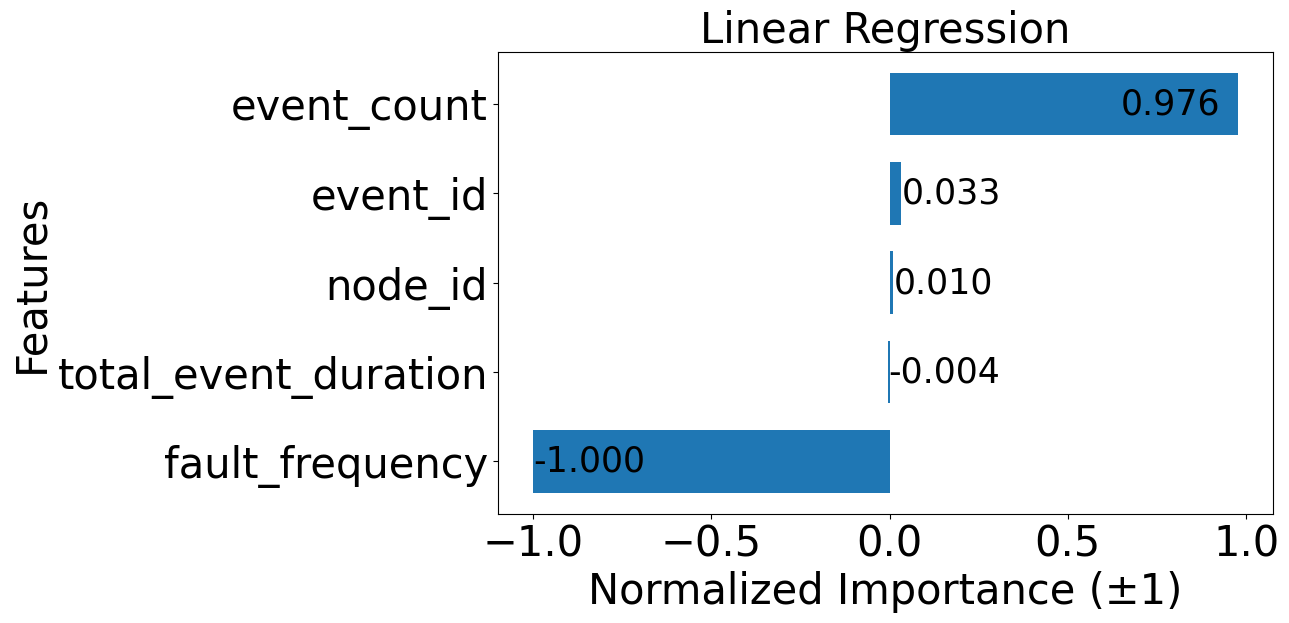

In [321]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker


# Initialize and train the Linear Regression model
linear_model2 = LinearRegression()
linear_model2.fit(X_train, y_train)


# Get the coefficients from the model (feature importance)
lr_importance = linear_model2.coef_

# Normalize coefficients post hoc for visualization (scale to max absolute value = 1)
max_abs_coef = np.max(np.abs(lr_importance))
lr_importance_normalized = lr_importance / max_abs_coef if max_abs_coef != 0 else lr_importance


# Use the feature names after selecting numeric columns (preprocessed names)
feature_names = X.select_dtypes(include=['float64', 'int64']).columns


# Ensure the shape matches between feature names and coefficients
assert len(feature_names) == len(lr_importance), \
    f"Mismatch between number of features ({len(feature_names)}) and importance scores ({len(lr_importance)})!"


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lr_importance_normalized
}).sort_values(by='Importance', ascending=False)

print('Before Filter')
print(feature_importance_df)

# Filter out features

lr_importance_df_nonzero = feature_importance_df[
    (~feature_importance_df['Importance'].between(-0.000019, -0.000213)) &  # exclude values in this range
    (feature_importance_df['Importance'].abs() >= 0.001)                   # keep abs importance >= 0.001
]

print('After Filter')
print(lr_importance_df_nonzero)

# Plot the feature importance for Linear Regression (normalized coefficients)
plt.figure(figsize=(10, 6))
bars = plt.barh(lr_importance_df_nonzero['Feature'], lr_importance_df_nonzero['Importance'], height=0.7)
plt.title("Linear Regression", fontsize=30)
plt.xlabel("Normalized Importance (±1)", fontsize=30)
plt.ylabel("Features", fontsize=30)
plt.gca().invert_yaxis()

# Reduce the number of x-ticks to prevent overlap
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))


plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2

    if width >= 0.1:
        # Inside the bar near the end (95% of width)
        plt.text(width * 0.95, y_pos, f'{width:.3f}', ha='right', va='center', fontsize=25, color='black')
    else:
        # At the end of the bar (just outside)
        plt.text(width + 0.001, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')


plt.savefig('TBF_Linear_Regression_Feature_Importance.png', bbox_inches='tight')
plt.show()


# **Model 4 on 45 nodes**




In [322]:
node_dataframes = {
    9: node9_df, 20: node20_df, 11: node11_df, 342: node342_df, 447: node447_df,
    352: node352_df, 820: node820_df, 839: node839_df, 780: node780_df, 889: node889_df,
    429: node429_df, 434: node434_df, 887: node887_df, 683: node683_df,
    717: node717_df, 79: node79_df, 454: node454_df, 663: node663_df,
    458: node458_df, 1060: node1060_df, 1019: node1019_df, 520: node520_df,
    523: node523_df, 491: node491_df, 1161: node1161_df, 1141: node1141_df,
    542: node542_df, 622: node622_df, 577: node577_df, 1210: node1210_df, 1229: node1229_df,
    1208: node1208_df, 840: node840_df, 872: node872_df, 868: node868_df, 965: node965_df,
    273: node273_df, 209: node209_df, 1101: node1101_df, 1078: node1078_df
}

# Nodes 1268, 888, 1171 removed owing to only 2 entries each
# Node 1250, 1282 only one entry
for node_id, node_df in node_dataframes.items():
    print(f"\nProcessing data for Node {node_id}")
    train_and_evaluate_model4(node_df, node_id)


Processing data for Node 9

9 - Linear Regression Results:
Training MAE: 1488508.52, RMSE: 2401429.98, R2: 0.93
Test MAE: 1455016.86, RMSE: 2509128.18, R2: 0.92

Processing data for Node 20

20 - Linear Regression Results:
Training MAE: 1514578.11, RMSE: 2638301.26, R2: 0.91
Test MAE: 1583246.90, RMSE: 2456684.67, R2: 0.93

Processing data for Node 11

11 - Linear Regression Results:
Training MAE: 2168678.60, RMSE: 3246239.42, R2: 0.88
Test MAE: 2434985.97, RMSE: 3930834.36, R2: 0.87

Processing data for Node 342

342 - Linear Regression Results:
Training MAE: 1705008.54, RMSE: 1981066.89, R2: 0.98
Test MAE: 1517840.89, RMSE: 1837012.34, R2: 0.98

Processing data for Node 447

447 - Linear Regression Results:
Training MAE: 1982254.19, RMSE: 2408082.70, R2: 0.97
Test MAE: 2119733.66, RMSE: 2490981.70, R2: 0.97

Processing data for Node 352

352 - Linear Regression Results:
Training MAE: 2498139.09, RMSE: 2841714.71, R2: 0.97
Test MAE: 2516166.92, RMSE: 2854898.93, R2: 0.97

Processing 

/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation


454 - Linear Regression Results:
Training MAE: 1241841.43, RMSE: 1538439.39, R2: 0.89
Test MAE: 1333867.07, RMSE: 1843900.04, R2: 0.58

Processing data for Node 663

663 - Linear Regression Results:
Training MAE: 2080414.12, RMSE: 2321821.05, R2: 0.97
Test MAE: 1950386.89, RMSE: 2209998.46, R2: 0.97

Processing data for Node 458

458 - Linear Regression Results:
Training MAE: 2563051.10, RMSE: 2861102.55, R2: 0.95
Test MAE: 2592366.65, RMSE: 2872088.84, R2: 0.95

Processing data for Node 1060

1060 - Linear Regression Results:
Training MAE: 670645.66, RMSE: 843368.18, R2: 0.96
Test MAE: 830503.26, RMSE: 1025954.24, R2: 0.94

Processing data for Node 1019

1019 - Linear Regression Results:
Training MAE: 1036170.02, RMSE: 1286130.94, R2: 0.90
Test MAE: 1017238.71, RMSE: 1251704.58, R2: 0.92

Processing data for Node 520

520 - Linear Regression Results:
Training MAE: 4271252.71, RMSE: 5625265.88, R2: 0.70
Test MAE: 4519796.48, RMSE: 6631712.54, R2: 0.71

Processing data for Node 523

52

/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation


872 - Linear Regression Results:
Training MAE: 2686663.09, RMSE: 3232290.38, R2: 0.82
Test MAE: 2623896.43, RMSE: 3163139.91, R2: 0.82

Processing data for Node 868

868 - Linear Regression Results:
Training MAE: 2292794.95, RMSE: 2612143.14, R2: 0.83
Test MAE: 2349504.49, RMSE: 2663097.72, R2: 0.81

Processing data for Node 965

965 - Linear Regression Results:
Training MAE: 311207.94, RMSE: 375903.33, R2: 0.98
Test MAE: 374345.33, RMSE: 438286.31, R2: 0.91

Processing data for Node 273

273 - Linear Regression Results:
Training MAE: 2519688.05, RMSE: 2854498.00, R2: 0.96
Test MAE: 2506974.38, RMSE: 2849938.77, R2: 0.96

Processing data for Node 209

209 - Linear Regression Results:
Training MAE: 3615855.14, RMSE: 4328795.11, R2: 0.89
Test MAE: 3515985.66, RMSE: 4251114.92, R2: 0.89

Processing data for Node 1101

1101 - Linear Regression Results:
Training MAE: 659061.74, RMSE: 985495.23, R2: 0.89
Test MAE: 691732.75, RMSE: 853281.05, R2: 0.87

Processing data for Node 1078

1078 - L

/tmp/ipython-input-3227960899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-3227960899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-3227960899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

## Model 5 - Random Forest Regressor

In [323]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=10,  # Increase estimators for better performance
    max_depth=5,  # Limit tree depth to prevent overfitting
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on train and test data
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate evaluation metrics for training data
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_pred_train)

# Calculate evaluation metrics for test data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print(f"Training MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")
print(f"Test MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")


Training MAE: 3803364.13, RMSE: 5155347.23, R2: 0.86
Test MAE: 3795399.89, RMSE: 5142064.56, R2: 0.86


                         Feature  Importance
1                       event_id    0.573408
5           total_event_duration    0.172882
4             avg_event_duration    0.114048
0                        node_id    0.087916
6                    event_count    0.027091
3                fault_frequency    0.024655
2                     event_type    0.000000
7          time_between_failures    0.000000
8                 time_to_repair    0.000000
9          event_duration_scaled    0.000000
10  time_between_failures_scaled    0.000000
11         time_to_repair_scaled    0.000000


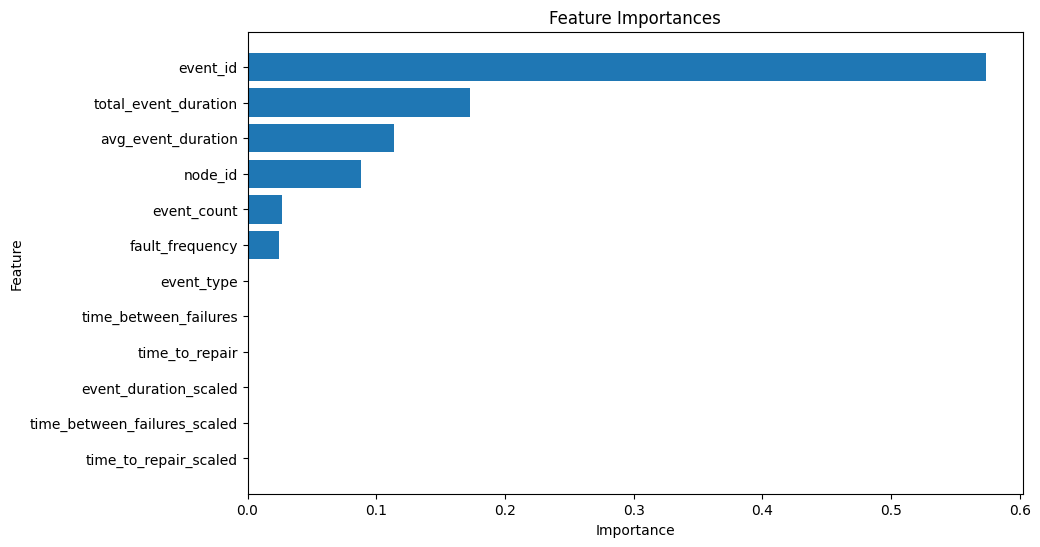

In [324]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
'''
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(n_estimators=10, random_state=42),  # Random Forest model
    X_train,              # Features
    y_train,              # Target
    cv=5,                 # Cross-validation folds
    scoring='r2',         # Evaluation metric (R²)
    n_jobs=-1,            # Use all available cores
    train_sizes=np.linspace(0.1, 1.0, 10)  # Training sizes from 10% to 100%
)

# Calculate mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training R²', color='blue', marker='o')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation R²', color='green', marker='o')
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color='green')

# Customize the plot

plt.title('Learning Curve: Random Forest Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid()
plt.show()
'''

# Print feature importances (your existing code)
import pandas as pd
feature_importances = rf_model.feature_importances_
feature_names = X.select_dtypes(include=['float64', 'int64']).columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importances (your existing code)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


## Model 5 on 9 sites

In [325]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to train and evaluate Random Forest Regressor
def train_and_evaluate_model5(df, name):
    if not isinstance(df, pd.DataFrame):
        print(f"Error: {name} is not a valid DataFrame. Received {type(df)}")
        return

    # Preprocess the data
    df['event_start_time'] = pd.to_datetime(df['event_start_time'])
    df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])

    df['event_start_seconds'] = df['event_start_time'].astype('int64') // 1e9
    df['event_stop_seconds'] = df['event_stop_time'].astype('int64') // 1e9

    X = df.drop(columns=[
        'node_name', 'node_location',
        'event_start_time', 'event_stop_time',
        'event_start_seconds', 'event_stop_seconds'
    ])
    y = df['event_stop_seconds']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train Random Forest Regressor
    rf_model = RandomForestRegressor(
        n_estimators=10,  # Adjust number of trees for better performance
        max_depth=5,  # Limiting depth to prevent overfitting
        random_state=42
    )
    rf_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
    r2_test = r2_score(y_test, y_pred_test)

    print(f"\n{name} - Random Forest Regressor Results:")
    print(f"Training MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")
    print(f"Test MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")

In [326]:
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

# Iterate over sites
for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_model5(site_df, f"Site: {site_name}")


Processing data for site1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site1 - Random Forest Regressor Results:
Training MAE: 2612766.78, RMSE: 4311654.95, R2: 0.91
Test MAE: 2642572.65, RMSE: 4349470.70, R2: 0.91

Processing data for site2


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site2 - Random Forest Regressor Results:
Training MAE: 1321493.02, RMSE: 1860414.58, R2: 0.95
Test MAE: 1314741.80, RMSE: 1880698.76, R2: 0.94

Processing data for site3


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site3 - Random Forest Regressor Results:
Training MAE: 1494387.94, RMSE: 2193335.73, R2: 0.95
Test MAE: 1614498.79, RMSE: 2512512.67, R2: 0.94

Processing data for site4


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site4 - Random Forest Regressor Results:
Training MAE: 1504403.54, RMSE: 2236781.43, R2: 0.97
Test MAE: 1494141.15, RMSE: 2199582.14, R2: 0.97

Processing data for site5


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site5 - Random Forest Regressor Results:
Training MAE: 1634724.33, RMSE: 2542245.54, R2: 0.93
Test MAE: 1720765.85, RMSE: 2621448.32, R2: 0.92

Processing data for site6


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site6 - Random Forest Regressor Results:
Training MAE: 1494313.59, RMSE: 2240797.24, R2: 0.95
Test MAE: 1489585.12, RMSE: 2232329.77, R2: 0.94

Processing data for site7


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site7 - Random Forest Regressor Results:
Training MAE: 1426905.33, RMSE: 2194613.02, R2: 0.91
Test MAE: 1437030.19, RMSE: 2204320.45, R2: 0.91

Processing data for site8


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site8 - Random Forest Regressor Results:
Training MAE: 2717223.55, RMSE: 3712231.89, R2: 0.94
Test MAE: 2738509.14, RMSE: 3748577.23, R2: 0.93

Processing data for site9


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site9 - Random Forest Regressor Results:
Training MAE: 525427.38, RMSE: 812467.91, R2: 0.91
Test MAE: 532653.04, RMSE: 815232.97, R2: 0.91


#Model 5 on Cluster 1 of Site 4 (s4/c1)

In [327]:
cluster_dataframes = {
    'G1/site4/c1': cluster7_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model5(cluster_df, f"Site: {cluster_name}")


Processing data for G1/site4/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site4/c1 - Random Forest Regressor Results:
Training MAE: 1392012.41, RMSE: 1983572.41, R2: 0.98
Test MAE: 1426674.20, RMSE: 2014449.20, R2: 0.98


Before Filter
                         Feature  Importance
1                       event_id    0.573408
5           total_event_duration    0.172882
4             avg_event_duration    0.114048
0                        node_id    0.087916
6                    event_count    0.027091
3                fault_frequency    0.024655
2                     event_type    0.000000
7          time_between_failures    0.000000
8                 time_to_repair    0.000000
9          event_duration_scaled    0.000000
10  time_between_failures_scaled    0.000000
11         time_to_repair_scaled    0.000000
After Filter
                Feature  Importance
1              event_id    0.573408
5  total_event_duration    0.172882
4    avg_event_duration    0.114048
0               node_id    0.087916
6           event_count    0.027091
3       fault_frequency    0.024655


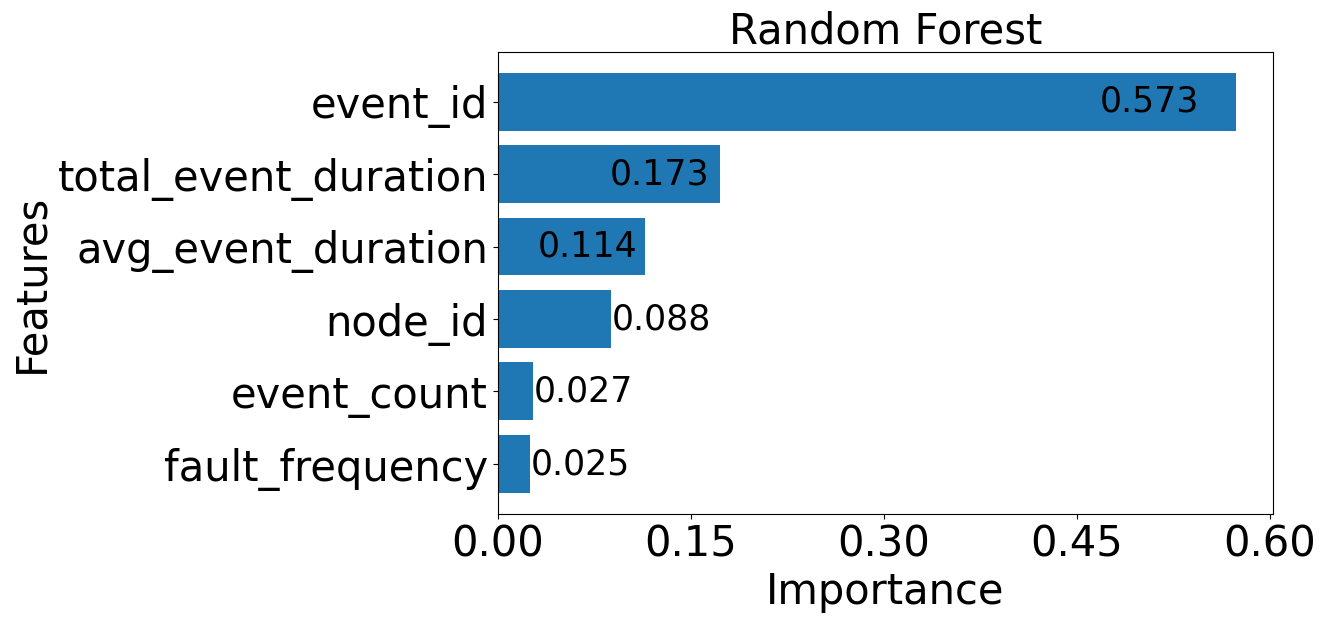

In [328]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.ticker as ticker


feature_importances = rf_model.feature_importances_
feature_names = X.select_dtypes(include=['float64', 'int64']).columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print('Before Filter')
print(feature_importance_df)

# Filter out features with zero importance
#xgb_importance_df_nonzero = xgb_importance_df[xgb_importance_df['Importance'] >= 0.001]
rf_importance_df_nonzero = feature_importance_df[feature_importance_df['Importance'] >= 0.001]

print('After Filter')
print(rf_importance_df_nonzero)


# Plot feature importances (your existing code)
plt.figure(figsize=(10, 6))

bars = plt.barh(rf_importance_df_nonzero['Feature'], rf_importance_df_nonzero['Importance'])

#plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance", fontsize=30)
plt.ylabel('Features', fontsize=30)
#plt.title('Random Forest Regressor (TBF Prediction)', fontsize=30)
plt.title('Random Forest', fontsize=30)
plt.gca().invert_yaxis()

# Reduce the number of x-ticks to prevent overlap
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))


plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2

    if width >= 0.1:
        # Inside the bar near the end (95% of width)
        plt.text(width * 0.95, y_pos, f'{width:.3f}', ha='right', va='center', fontsize=25, color='black')
    else:
        # At the end of the bar (just outside)
        plt.text(width + 0.001, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')



plt.savefig('TBF_Random_Forest_Regressor_Feature_Importance.png', bbox_inches='tight')
plt.show()

## Model 5 on 15 clusters

In [329]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model5(cluster_df, f"Site: {cluster_name}")


Processing data for G1/site1/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site1/c1 - Random Forest Regressor Results:
Training MAE: 1324717.11, RMSE: 2316841.56, R2: 0.94
Test MAE: 1348566.21, RMSE: 2346663.90, R2: 0.94

Processing data for G1/site1/c2


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site1/c2 - Random Forest Regressor Results:
Training MAE: 1749929.32, RMSE: 2314754.93, R2: 0.98
Test MAE: 1739446.02, RMSE: 2300283.33, R2: 0.98

Processing data for G1/site1/c3


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site1/c3 - Random Forest Regressor Results:
Training MAE: 971357.68, RMSE: 1501901.98, R2: 0.97
Test MAE: 995989.07, RMSE: 1554102.43, R2: 0.97

Processing data for G1/site1/c4


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site1/c4 - Random Forest Regressor Results:
Training MAE: 1230004.85, RMSE: 1695399.45, R2: 0.98
Test MAE: 1290786.32, RMSE: 1770366.99, R2: 0.98

Processing data for G1/site2/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site2/c1 - Random Forest Regressor Results:
Training MAE: 1321493.02, RMSE: 1860414.58, R2: 0.95
Test MAE: 1314741.80, RMSE: 1880698.76, R2: 0.94

Processing data for G1/site3/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site3/c1 - Random Forest Regressor Results:
Training MAE: 1494387.94, RMSE: 2193335.73, R2: 0.95
Test MAE: 1614498.79, RMSE: 2512512.67, R2: 0.94

Processing data for G1/site4/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site4/c1 - Random Forest Regressor Results:
Training MAE: 1392012.41, RMSE: 1983572.41, R2: 0.98
Test MAE: 1426674.20, RMSE: 2014449.20, R2: 0.98

Processing data for G1/site4/c2

Site: G1/site4/c2 - Random Forest Regressor Results:
Training MAE: 702321.86, RMSE: 904028.38, R2: 0.95
Test MAE: 723974.16, RMSE: 941494.95, R2: 0.95

Processing data for G1/site5/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site5/c1 - Random Forest Regressor Results:
Training MAE: 1503436.39, RMSE: 2207931.23, R2: 0.95
Test MAE: 1554751.98, RMSE: 2380208.74, R2: 0.95

Processing data for G1/site5/c2

Site: G1/site5/c2 - Random Forest Regressor Results:
Training MAE: 261780.11, RMSE: 420755.92, R2: 0.94
Test MAE: 273184.32, RMSE: 436298.28, R2: 0.95

Processing data for G1/site6/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site6/c1 - Random Forest Regressor Results:
Training MAE: 1506250.40, RMSE: 2197674.42, R2: 0.95
Test MAE: 1548440.74, RMSE: 2286740.47, R2: 0.94

Processing data for G1/site6/c2

Site: G1/site6/c2 - Random Forest Regressor Results:
Training MAE: 334737.32, RMSE: 617127.46, R2: 0.96
Test MAE: 389089.40, RMSE: 713553.31, R2: 0.94

Processing data for G1/site7/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site7/c1 - Random Forest Regressor Results:
Training MAE: 1426905.33, RMSE: 2194613.02, R2: 0.91
Test MAE: 1437030.19, RMSE: 2204320.45, R2: 0.91

Processing data for G1/site8/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site8/c1 - Random Forest Regressor Results:
Training MAE: 2717223.55, RMSE: 3712231.89, R2: 0.94
Test MAE: 2738509.14, RMSE: 3748577.23, R2: 0.93

Processing data for G1/site9/c1


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site9/c1 - Random Forest Regressor Results:
Training MAE: 525427.38, RMSE: 812467.91, R2: 0.91
Test MAE: 532653.04, RMSE: 815232.97, R2: 0.91


## Model 5 on 45 nodes

In [330]:
node_dataframes = {
    9: node9_df, 20: node20_df, 11: node11_df, 342: node342_df, 447: node447_df,
    352: node352_df, 820: node820_df, 839: node839_df, 780: node780_df, 889: node889_df,
    429: node429_df, 434: node434_df, 887: node887_df, 683: node683_df,
    717: node717_df, 79: node79_df, 454: node454_df, 663: node663_df,
    458: node458_df, 1060: node1060_df, 1019: node1019_df, 520: node520_df,
    523: node523_df, 491: node491_df, 1161: node1161_df, 1141: node1141_df,
    542: node542_df, 622: node622_df, 577: node577_df, 1210: node1210_df, 1229: node1229_df,
    1208: node1208_df, 840: node840_df, 872: node872_df, 868: node868_df, 965: node965_df,
    273: node273_df, 209: node209_df, 1101: node1101_df, 1078: node1078_df
}

# Nodes 1268, 888, 1171 removed owing to only 2 entries each
# Node 1250, 1282 only one entry
for node_id, node_df in node_dataframes.items():
    print(f"\nProcessing data for Node {node_id}")
    train_and_evaluate_model5(node_df, node_id)


Processing data for Node 9

9 - Random Forest Regressor Results:
Training MAE: 144092.01, RMSE: 257193.68, R2: 1.00
Test MAE: 172669.96, RMSE: 237565.51, R2: 1.00

Processing data for Node 20

20 - Random Forest Regressor Results:
Training MAE: 144927.02, RMSE: 234692.84, R2: 1.00
Test MAE: 233036.29, RMSE: 445138.47, R2: 1.00

Processing data for Node 11

11 - Random Forest Regressor Results:
Training MAE: 140161.05, RMSE: 194480.99, R2: 1.00
Test MAE: 165200.32, RMSE: 235523.04, R2: 1.00

Processing data for Node 342

342 - Random Forest Regressor Results:
Training MAE: 178151.13, RMSE: 226966.82, R2: 1.00
Test MAE: 222486.08, RMSE: 306990.66, R2: 1.00

Processing data for Node 447

447 - Random Forest Regressor Results:
Training MAE: 197486.28, RMSE: 249265.91, R2: 1.00
Test MAE: 208051.92, RMSE: 258189.92, R2: 1.00

Processing data for Node 352


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


352 - Random Forest Regressor Results:
Training MAE: 182252.19, RMSE: 262440.41, R2: 1.00
Test MAE: 217355.37, RMSE: 304662.22, R2: 1.00

Processing data for Node 820

820 - Random Forest Regressor Results:
Training MAE: 103551.24, RMSE: 148595.09, R2: 1.00
Test MAE: 151491.60, RMSE: 265232.44, R2: 1.00

Processing data for Node 839

839 - Random Forest Regressor Results:
Training MAE: 97575.72, RMSE: 145708.94, R2: 1.00
Test MAE: 159106.75, RMSE: 319309.23, R2: 1.00

Processing data for Node 780

780 - Random Forest Regressor Results:
Training MAE: 83189.98, RMSE: 137457.64, R2: 1.00
Test MAE: 95753.86, RMSE: 154460.69, R2: 1.00

Processing data for Node 889

889 - Random Forest Regressor Results:
Training MAE: 115671.19, RMSE: 175676.50, R2: 1.00
Test MAE: 193490.11, RMSE: 264268.71, R2: 1.00

Processing data for Node 429

429 - Random Forest Regressor Results:
Training MAE: 187386.62, RMSE: 269879.14, R2: 1.00
Test MAE: 395781.90, RMSE: 611036.34, R2: 1.00

Processing data for Node

/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


887 - Random Forest Regressor Results:
Training MAE: 159902.67, RMSE: 222292.73, R2: 1.00
Test MAE: 310012.41, RMSE: 445724.93, R2: 1.00

Processing data for Node 683

683 - Random Forest Regressor Results:
Training MAE: 116982.73, RMSE: 154946.29, R2: 1.00
Test MAE: 131046.29, RMSE: 186075.70, R2: 1.00

Processing data for Node 717

717 - Random Forest Regressor Results:
Training MAE: 113900.82, RMSE: 199039.22, R2: 1.00
Test MAE: 201892.38, RMSE: 289644.51, R2: 1.00

Processing data for Node 79

79 - Random Forest Regressor Results:
Training MAE: 191256.96, RMSE: 312771.09, R2: 1.00
Test MAE: 298119.50, RMSE: 465547.35, R2: 1.00

Processing data for Node 454

454 - Random Forest Regressor Results:
Training MAE: 188811.90, RMSE: 1185537.97, R2: 0.94
Test MAE: 147583.54, RMSE: 325510.59, R2: 0.99

Processing data for Node 663

663 - Random Forest Regressor Results:
Training MAE: 145851.09, RMSE: 193437.67, R2: 1.00
Test MAE: 147009.13, RMSE: 197763.66, R2: 1.00

Processing data for No

/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


1060 - Random Forest Regressor Results:
Training MAE: 97741.99, RMSE: 163859.16, R2: 1.00
Test MAE: 137435.80, RMSE: 184156.20, R2: 1.00

Processing data for Node 1019

1019 - Random Forest Regressor Results:
Training MAE: 57677.28, RMSE: 160017.79, R2: 1.00
Test MAE: 50314.71, RMSE: 88758.41, R2: 1.00

Processing data for Node 520

520 - Random Forest Regressor Results:
Training MAE: 382107.71, RMSE: 1236504.52, R2: 0.99
Test MAE: 711847.78, RMSE: 1353805.82, R2: 0.99

Processing data for Node 523

523 - Random Forest Regressor Results:
Training MAE: 197787.03, RMSE: 558531.38, R2: 1.00
Test MAE: 279341.68, RMSE: 506769.26, R2: 0.99

Processing data for Node 491

491 - Random Forest Regressor Results:
Training MAE: 126338.15, RMSE: 195093.73, R2: 1.00
Test MAE: 144132.11, RMSE: 262038.91, R2: 1.00

Processing data for Node 1161

1161 - Random Forest Regressor Results:
Training MAE: 30327.88, RMSE: 81583.59, R2: 1.00
Test MAE: 376332.83, RMSE: 1011183.53, R2: 0.76

Processing data for

/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


622 - Random Forest Regressor Results:
Training MAE: 228487.14, RMSE: 317324.49, R2: 1.00
Test MAE: 507826.57, RMSE: 972042.55, R2: 0.99

Processing data for Node 577

577 - Random Forest Regressor Results:
Training MAE: 92691.38, RMSE: 182023.85, R2: 1.00
Test MAE: 145429.95, RMSE: 416608.53, R2: 1.00

Processing data for Node 1210

1210 - Random Forest Regressor Results:
Training MAE: 117248.02, RMSE: 292570.25, R2: 0.99
Test MAE: 180214.41, RMSE: 439830.74, R2: 0.97

Processing data for Node 1229

1229 - Random Forest Regressor Results:
Training MAE: 36410.21, RMSE: 73803.04, R2: 1.00
Test MAE: 21669.77, RMSE: 43612.34, R2: 1.00

Processing data for Node 1208

1208 - Random Forest Regressor Results:
Training MAE: 34865.74, RMSE: 104451.68, R2: 1.00
Test MAE: 33381.42, RMSE: 58923.34, R2: 1.00

Processing data for Node 840

840 - Random Forest Regressor Results:
Training MAE: 75585.86, RMSE: 110423.76, R2: 1.00
Test MAE: 149512.35, RMSE: 349723.74, R2: 1.00

Processing data for Node

/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


868 - Random Forest Regressor Results:
Training MAE: 89771.44, RMSE: 128007.06, R2: 1.00
Test MAE: 89554.54, RMSE: 132956.25, R2: 1.00

Processing data for Node 965

965 - Random Forest Regressor Results:
Training MAE: 322756.17, RMSE: 1148914.74, R2: 0.84
Test MAE: 236785.13, RMSE: 349405.22, R2: 0.94

Processing data for Node 273

273 - Random Forest Regressor Results:
Training MAE: 162846.15, RMSE: 212613.23, R2: 1.00
Test MAE: 206143.41, RMSE: 256481.93, R2: 1.00

Processing data for Node 209

209 - Random Forest Regressor Results:
Training MAE: 163573.45, RMSE: 219788.62, R2: 1.00
Test MAE: 167600.96, RMSE: 232031.86, R2: 1.00

Processing data for Node 1101

1101 - Random Forest Regressor Results:
Training MAE: 47167.40, RMSE: 97849.65, R2: 1.00
Test MAE: 101724.53, RMSE: 170839.08, R2: 0.99

Processing data for Node 1078

1078 - Random Forest Regressor Results:
Training MAE: 44176.45, RMSE: 98565.66, R2: 0.99
Test MAE: 60859.08, RMSE: 137948.61, R2: 0.99


/tmp/ipython-input-4028655364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-4028655364.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-4028655364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

## Model 6 - XGBoost Regressor

In [331]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(
    n_estimators=100,    # Number of trees
    max_depth=5,         # Maximum depth of trees
    learning_rate=0.1,   # Step size for boosting
    random_state=42      # Seed for reproducibility
)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on train and test data
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics for training data
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
rmse_train_xgb = mse_train_xgb ** 0.5
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

# Calculate evaluation metrics for test data
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
rmse_test_xgb = mse_test_xgb ** 0.5
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

# Print the results
print("\nXGBoost Regressor Results:")
print(f"Training MAE: {mae_train_xgb:.2f}, RMSE: {rmse_train_xgb:.2f}, R2: {r2_train_xgb:.2f}")
print(f"Test MAE: {mae_test_xgb:.2f}, RMSE: {rmse_test_xgb:.2f}, R2: {r2_test_xgb:.2f}")



XGBoost Regressor Results:
Training MAE: 1560554.75, RMSE: 2244774.67, R2: 0.97
Test MAE: 1569205.88, RMSE: 2257351.55, R2: 0.97


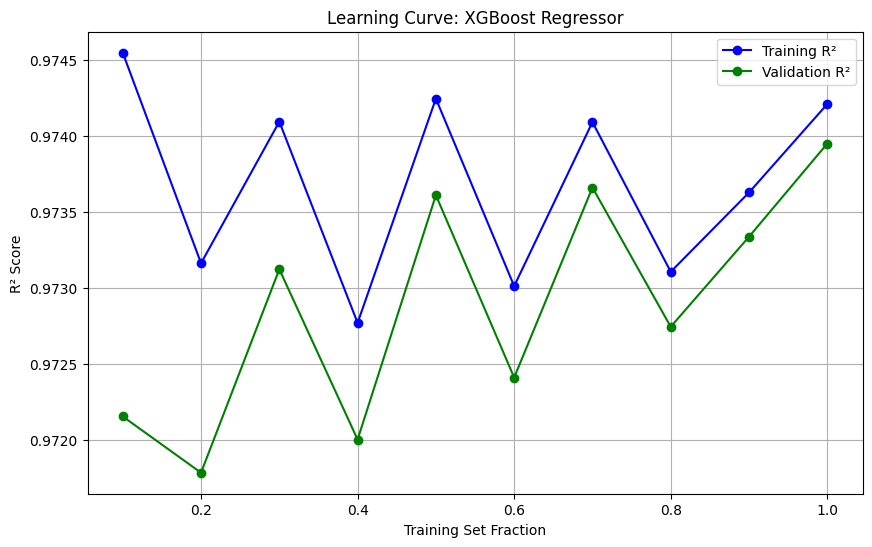

In [332]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Define the fractions of the training data to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Lists to store train and validation scores
train_scores = []
validation_scores = []

# Loop over training sizes
for frac in train_sizes:
    # Sample the training data
    sample_size = int(frac * X_train.shape[0])
    X_train_sample = X_train[:sample_size]
    y_train_sample = y_train[:sample_size]

    # Train the model
    xgb_model.fit(X_train_sample, y_train_sample)

    # Predict on train and validation data
    y_train_pred = xgb_model.predict(X_train_sample)
    y_val_pred = xgb_model.predict(X_test)

    # Compute R² scores
    train_scores.append(r2_score(y_train_sample, y_train_pred))
    validation_scores.append(r2_score(y_test, y_val_pred))

# Convert scores to numpy arrays
train_scores = np.array(train_scores)
validation_scores = np.array(validation_scores)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training R²', color='blue', marker='o')
plt.plot(train_sizes, validation_scores, label='Validation R²', color='green', marker='o')

# Customize the plot
plt.title('Learning Curve: XGBoost Regressor')
plt.xlabel('Training Set Fraction')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid()
plt.show()



XGBoost Feature Importances:
                         Feature  Importance
5           total_event_duration    0.321804
1                       event_id    0.267225
4             avg_event_duration    0.153662
6                    event_count    0.132338
3                fault_frequency    0.067527
0                        node_id    0.051796
9          event_duration_scaled    0.003204
7          time_between_failures    0.002004
8                 time_to_repair    0.000347
2                     event_type    0.000094
10  time_between_failures_scaled    0.000000
11         time_to_repair_scaled    0.000000


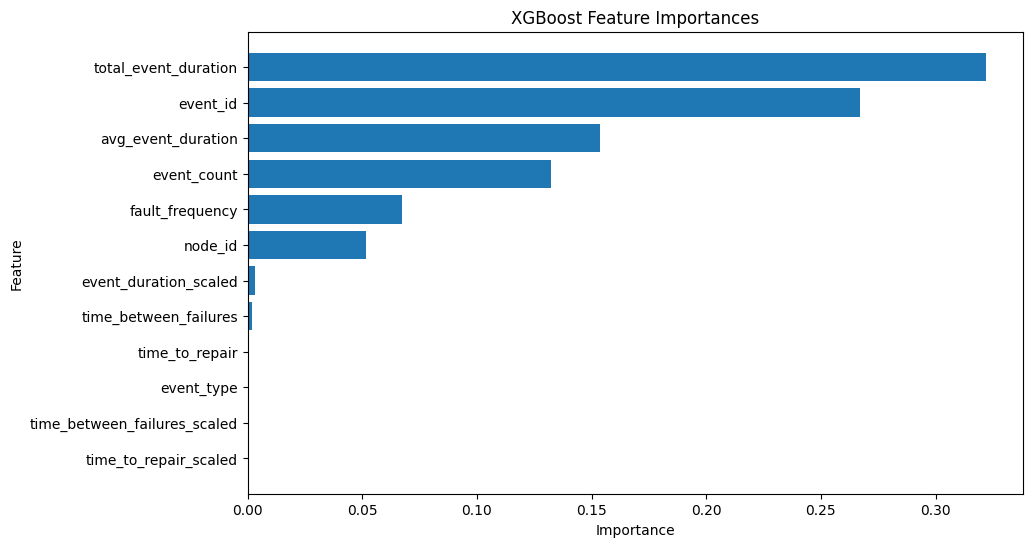

In [333]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance
import pandas as pd

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(
    n_estimators=100,    # Number of trees
    max_depth=5,         # Maximum depth of trees
    learning_rate=0.1,   # Step size for boosting
    random_state=42      # Seed for reproducibility
)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Get feature importance from the XGBoost model
xgb_importance = xgb_model.feature_importances_

# Extract feature names after scaling
feature_names = X.select_dtypes(include=['float64', 'int64']).columns

# Ensure the number of features matches
assert len(feature_names) == len(xgb_importance), \
    f"Mismatch between number of features ({len(feature_names)}) and importance scores ({len(xgb_importance)})!"

# Create a DataFrame to map feature names to their importance
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("\nXGBoost Feature Importances:")
print(xgb_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.show()


## Model 6 on 9 sites

In [334]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to train and evaluate XGBoost Regressor
def train_and_evaluate_model6(df, name):
    if not isinstance(df, pd.DataFrame):
        print(f"Error: {name} is not a valid DataFrame. Received {type(df)}")
        return

    # Preprocess the data
    df['event_start_time'] = pd.to_datetime(df['event_start_time'])
    df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])

    df['event_start_seconds'] = df['event_start_time'].astype('int64') // 1e9
    df['event_stop_seconds'] = df['event_stop_time'].astype('int64') // 1e9

    X = df.drop(columns=[
       'node_name', 'node_location',
       'event_start_time', 'event_stop_time',
       'event_start_seconds', 'event_stop_seconds'
    ])
    y = df['event_stop_seconds']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train XGBoost Regressor
    xgb_model = XGBRegressor(
        n_estimators=100,    # Number of trees
        max_depth=5,          # Maximum depth of trees
        learning_rate=0.1,    # Step size for boosting
        random_state=42       # Seed for reproducibility
    )
    xgb_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_train_xgb = xgb_model.predict(X_train)
    y_pred_test_xgb = xgb_model.predict(X_test)

    mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
    rmse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb) ** 0.5
    r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

    mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
    rmse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb) ** 0.5
    r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

    print(f"\n{name} - XGBoost Regressor Results:")
    print(f"Training MAE: {mae_train_xgb:.2f}, RMSE: {rmse_train_xgb:.2f}, R2: {r2_train_xgb:.2f}")
    print(f"Test MAE: {mae_test_xgb:.2f}, RMSE: {rmse_test_xgb:.2f}, R2: {r2_test_xgb:.2f}")


In [335]:
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

# Iterate over sites
for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_model6(site_df, f"Site: {site_name}")


Processing data for site1


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site1 - XGBoost Regressor Results:
Training MAE: 894602.53, RMSE: 1331936.77, R2: 0.99
Test MAE: 915480.85, RMSE: 1364430.42, R2: 0.99

Processing data for site2

Site: site2 - XGBoost Regressor Results:
Training MAE: 394330.41, RMSE: 553953.68, R2: 1.00
Test MAE: 432251.20, RMSE: 616508.30, R2: 0.99

Processing data for site3


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site3 - XGBoost Regressor Results:
Training MAE: 602912.80, RMSE: 824438.85, R2: 0.99
Test MAE: 716166.87, RMSE: 1037082.06, R2: 0.99

Processing data for site4


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site4 - XGBoost Regressor Results:
Training MAE: 585504.60, RMSE: 849575.62, R2: 1.00
Test MAE: 607933.07, RMSE: 880882.11, R2: 1.00

Processing data for site5

Site: site5 - XGBoost Regressor Results:
Training MAE: 476364.49, RMSE: 802376.10, R2: 0.99
Test MAE: 533425.46, RMSE: 929291.24, R2: 0.99

Processing data for site6


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site6 - XGBoost Regressor Results:
Training MAE: 804399.95, RMSE: 1220560.33, R2: 0.98
Test MAE: 857583.76, RMSE: 1305936.34, R2: 0.98

Processing data for site7


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site7 - XGBoost Regressor Results:
Training MAE: 475130.72, RMSE: 740905.98, R2: 0.99
Test MAE: 479630.34, RMSE: 749623.47, R2: 0.99

Processing data for site8


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: site8 - XGBoost Regressor Results:
Training MAE: 1193860.48, RMSE: 1740654.05, R2: 0.99
Test MAE: 1212413.65, RMSE: 1767266.46, R2: 0.99

Processing data for site9

Site: site9 - XGBoost Regressor Results:
Training MAE: 230535.60, RMSE: 347892.98, R2: 0.98
Test MAE: 250789.23, RMSE: 384055.59, R2: 0.98


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

# Model 6 on Cluster 1 of Site 4 (s4/c1)

In [336]:
cluster_dataframes = {
'G1/site4/c1': cluster7_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model6(cluster_df, f"Site: {cluster_name}")


Processing data for G1/site4/c1


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site4/c1 - XGBoost Regressor Results:
Training MAE: 534285.20, RMSE: 771438.29, R2: 1.00
Test MAE: 556258.90, RMSE: 806828.99, R2: 1.00


Before Filter
                         Feature  Importance
5           total_event_duration    0.321804
1                       event_id    0.267225
4             avg_event_duration    0.153662
6                    event_count    0.132338
3                fault_frequency    0.067527
0                        node_id    0.051796
9          event_duration_scaled    0.003204
7          time_between_failures    0.002004
8                 time_to_repair    0.000347
2                     event_type    0.000094
10  time_between_failures_scaled    0.000000
11         time_to_repair_scaled    0.000000
After Filter
                 Feature  Importance
5   total_event_duration    0.321804
1               event_id    0.267225
4     avg_event_duration    0.153662
6            event_count    0.132338
3        fault_frequency    0.067527
0                node_id    0.051796
9  event_duration_scaled    0.003204
7  time_between_failures    0.002004


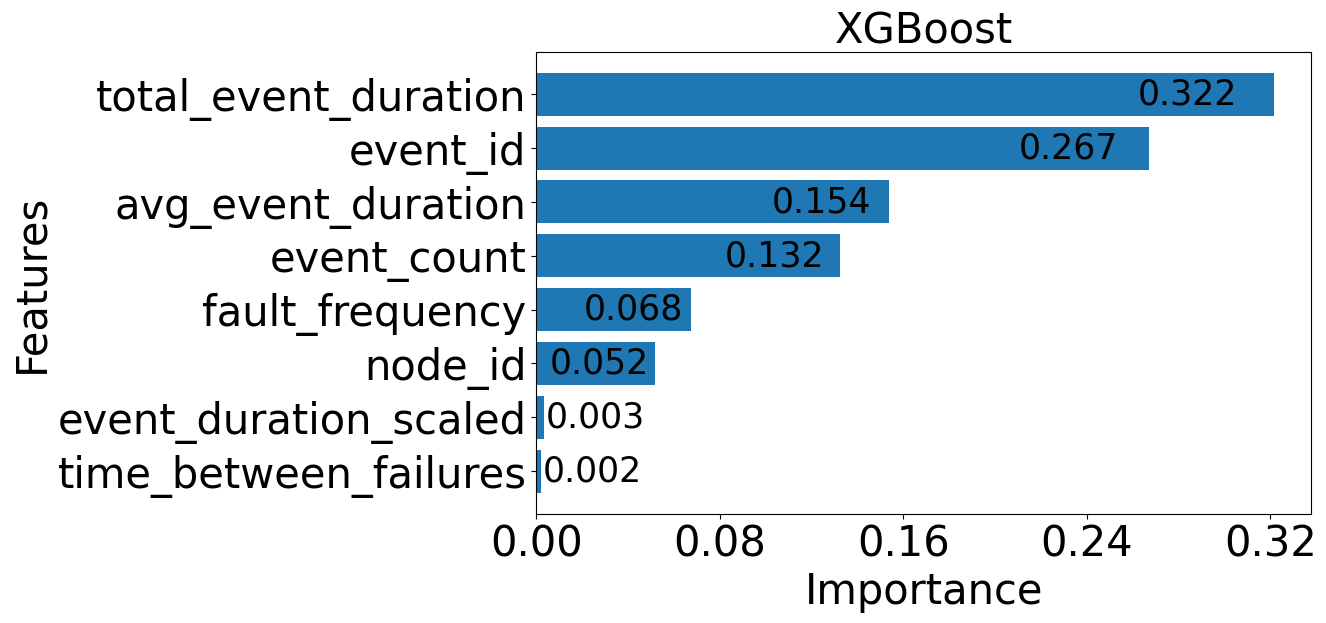

In [337]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance
import pandas as pd

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(
    n_estimators=100,    # Number of trees
    max_depth=5,         # Maximum depth of trees
    learning_rate=0.1,   # Step size for boosting
    random_state=42      # Seed for reproducibility
)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Get feature importance from the XGBoost model
xgb_importance = xgb_model.feature_importances_

# Extract feature names after scaling
feature_names = X.select_dtypes(include=['float64', 'int64']).columns

# Ensure the number of features matches
assert len(feature_names) == len(xgb_importance), \
    f"Mismatch between number of features ({len(feature_names)}) and importance scores ({len(xgb_importance)})!"

# Create a DataFrame to map feature names to their importance
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("Before Filter")
print(xgb_importance_df)

# Filter out features with zero importance
xgb_importance_df_nonzero = xgb_importance_df[xgb_importance_df['Importance'] >= 0.001]

print("After Filter")
print(xgb_importance_df_nonzero)

# Plot feature importance
plt.figure(figsize=(10, 6))

bars = plt.barh(xgb_importance_df_nonzero['Feature'], xgb_importance_df_nonzero['Importance'])

#plt.barh(xgb_importance_df_nonzero['Feature'], xgb_importance_df_nonzero['Importance'])
plt.xlabel('Importance', fontsize=30)
plt.ylabel('Features', fontsize=30)
#plt.title('Feature Importance: XGBoost Regressor (TBF Prediction)', fontsize=30)
#plt.title('XGBoost Regressor (TBF Prediction)', fontsize=30)
plt.title('XGBoost', fontsize=30)

# Reduce the number of x-ticks to prevent overlap
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.gca().invert_yaxis()


for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2

    if width >= 0.01:
        # Inside the bar near the end (95% of width)
        plt.text(width * 0.95, y_pos, f'{width:.3f}', ha='right', va='center', fontsize=25, color='black')
    else:
        # At the end of the bar (just outside)
        plt.text(width + 0.001, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')

plt.savefig('TBF_XGBoost_Regressor_Feature_Importance.png', bbox_inches='tight')
plt.show()


## Model 6 on 15 clusters

In [338]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model6(cluster_df, f"Site: {cluster_name}")


Processing data for G1/site1/c1

Site: G1/site1/c1 - XGBoost Regressor Results:
Training MAE: 369011.72, RMSE: 606662.23, R2: 1.00
Test MAE: 404975.71, RMSE: 698446.77, R2: 0.99

Processing data for G1/site1/c2


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site1/c2 - XGBoost Regressor Results:
Training MAE: 595237.03, RMSE: 795888.12, R2: 1.00
Test MAE: 604224.86, RMSE: 807665.48, R2: 1.00

Processing data for G1/site1/c3


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site1/c3 - XGBoost Regressor Results:
Training MAE: 455880.56, RMSE: 698533.99, R2: 0.99
Test MAE: 472894.51, RMSE: 726766.04, R2: 0.99

Processing data for G1/site1/c4


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site1/c4 - XGBoost Regressor Results:
Training MAE: 322593.77, RMSE: 478736.45, R2: 1.00
Test MAE: 389176.64, RMSE: 615340.36, R2: 1.00

Processing data for G1/site2/c1


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site2/c1 - XGBoost Regressor Results:
Training MAE: 394330.41, RMSE: 553953.68, R2: 1.00
Test MAE: 432251.20, RMSE: 616508.30, R2: 0.99

Processing data for G1/site3/c1


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site3/c1 - XGBoost Regressor Results:
Training MAE: 602912.80, RMSE: 824438.85, R2: 0.99
Test MAE: 716166.87, RMSE: 1037082.06, R2: 0.99

Processing data for G1/site4/c1


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site4/c1 - XGBoost Regressor Results:
Training MAE: 534285.20, RMSE: 771438.29, R2: 1.00
Test MAE: 556258.90, RMSE: 806828.99, R2: 1.00

Processing data for G1/site4/c2


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site4/c2 - XGBoost Regressor Results:
Training MAE: 265902.41, RMSE: 361386.99, R2: 0.99
Test MAE: 322488.80, RMSE: 446343.50, R2: 0.99

Processing data for G1/site5/c1


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site5/c1 - XGBoost Regressor Results:
Training MAE: 528247.20, RMSE: 816534.61, R2: 0.99
Test MAE: 640089.20, RMSE: 1084216.27, R2: 0.99

Processing data for G1/site5/c2


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site5/c2 - XGBoost Regressor Results:
Training MAE: 91342.71, RMSE: 139720.32, R2: 0.99
Test MAE: 116501.77, RMSE: 198483.09, R2: 0.99

Processing data for G1/site6/c1

Site: G1/site6/c1 - XGBoost Regressor Results:
Training MAE: 790376.00, RMSE: 1190650.18, R2: 0.98
Test MAE: 845775.45, RMSE: 1305102.91, R2: 0.98

Processing data for G1/site6/c2


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site6/c2 - XGBoost Regressor Results:
Training MAE: 133014.88, RMSE: 254757.12, R2: 0.99
Test MAE: 225252.39, RMSE: 436227.82, R2: 0.98

Processing data for G1/site7/c1


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site7/c1 - XGBoost Regressor Results:
Training MAE: 475130.72, RMSE: 740905.98, R2: 0.99
Test MAE: 479630.34, RMSE: 749623.47, R2: 0.99

Processing data for G1/site8/c1


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Site: G1/site8/c1 - XGBoost Regressor Results:
Training MAE: 1193860.48, RMSE: 1740654.05, R2: 0.99
Test MAE: 1212413.65, RMSE: 1767266.46, R2: 0.99

Processing data for G1/site9/c1

Site: G1/site9/c1 - XGBoost Regressor Results:
Training MAE: 230535.60, RMSE: 347892.98, R2: 0.98
Test MAE: 250789.23, RMSE: 384055.59, R2: 0.98


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

## Model 6 on 45 nodes

In [339]:
node_dataframes = {
    9: node9_df, 20: node20_df, 11: node11_df, 342: node342_df, 447: node447_df,
    352: node352_df, 820: node820_df, 839: node839_df, 780: node780_df, 889: node889_df,
    429: node429_df, 434: node434_df, 887: node887_df, 683: node683_df,
    717: node717_df, 79: node79_df, 454: node454_df, 663: node663_df,
    458: node458_df, 1060: node1060_df, 1019: node1019_df, 520: node520_df,
    523: node523_df, 491: node491_df, 1161: node1161_df, 1141: node1141_df,
    542: node542_df, 622: node622_df, 577: node577_df, 1210: node1210_df, 1229: node1229_df,
    1208: node1208_df, 840: node840_df, 872: node872_df, 868: node868_df, 965: node965_df,
    273: node273_df, 209: node209_df, 1101: node1101_df, 1078: node1078_df
}

# Nodes 1268, 888, 1171 removed owing to only 2 entries each
# Node 1250, 1282 only one entry
for node_id, node_df in node_dataframes.items():
    print(f"\nProcessing data for Node {node_id}")
    train_and_evaluate_model6(node_df, node_id)


Processing data for Node 9


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


9 - XGBoost Regressor Results:
Training MAE: 5767.49, RMSE: 13562.75, R2: 1.00
Test MAE: 130502.03, RMSE: 330824.22, R2: 1.00

Processing data for Node 20

20 - XGBoost Regressor Results:
Training MAE: 14187.12, RMSE: 24860.43, R2: 1.00
Test MAE: 125460.70, RMSE: 236585.56, R2: 1.00

Processing data for Node 11


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


11 - XGBoost Regressor Results:
Training MAE: 24574.46, RMSE: 43754.63, R2: 1.00
Test MAE: 102139.52, RMSE: 238393.11, R2: 1.00

Processing data for Node 342


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


342 - XGBoost Regressor Results:
Training MAE: 31786.22, RMSE: 49958.48, R2: 1.00
Test MAE: 143439.26, RMSE: 263857.88, R2: 1.00

Processing data for Node 447

447 - XGBoost Regressor Results:
Training MAE: 35843.94, RMSE: 57186.33, R2: 1.00
Test MAE: 87477.08, RMSE: 131765.32, R2: 1.00

Processing data for Node 352


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


352 - XGBoost Regressor Results:
Training MAE: 33913.92, RMSE: 59702.04, R2: 1.00
Test MAE: 93066.78, RMSE: 182090.30, R2: 1.00

Processing data for Node 820


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


820 - XGBoost Regressor Results:
Training MAE: 3501.07, RMSE: 6745.31, R2: 1.00
Test MAE: 115264.95, RMSE: 220655.13, R2: 1.00

Processing data for Node 839

839 - XGBoost Regressor Results:
Training MAE: 14318.86, RMSE: 28945.68, R2: 1.00
Test MAE: 126678.93, RMSE: 375913.94, R2: 1.00

Processing data for Node 780


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


780 - XGBoost Regressor Results:
Training MAE: 13716.40, RMSE: 27983.20, R2: 1.00
Test MAE: 96865.98, RMSE: 323807.24, R2: 1.00

Processing data for Node 889

889 - XGBoost Regressor Results:
Training MAE: 2202.98, RMSE: 5063.84, R2: 1.00
Test MAE: 316458.30, RMSE: 827521.43, R2: 0.99

Processing data for Node 429


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


429 - XGBoost Regressor Results:
Training MAE: 3649.85, RMSE: 8382.17, R2: 1.00
Test MAE: 411637.65, RMSE: 795007.23, R2: 0.99

Processing data for Node 434


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


434 - XGBoost Regressor Results:
Training MAE: 22017.74, RMSE: 56191.75, R2: 1.00
Test MAE: 70046.54, RMSE: 244130.82, R2: 1.00

Processing data for Node 887

887 - XGBoost Regressor Results:
Training MAE: 1417.90, RMSE: 2504.21, R2: 1.00
Test MAE: 581025.07, RMSE: 1209604.56, R2: 0.98

Processing data for Node 683


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


683 - XGBoost Regressor Results:
Training MAE: 18540.76, RMSE: 31561.43, R2: 1.00
Test MAE: 67425.25, RMSE: 156519.87, R2: 1.00

Processing data for Node 717

717 - XGBoost Regressor Results:
Training MAE: 3234.74, RMSE: 7448.89, R2: 1.00
Test MAE: 257260.90, RMSE: 657592.69, R2: 0.99

Processing data for Node 79


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


79 - XGBoost Regressor Results:
Training MAE: 3743.73, RMSE: 7752.54, R2: 1.00
Test MAE: 326854.02, RMSE: 567140.39, R2: 1.00

Processing data for Node 454

454 - XGBoost Regressor Results:
Training MAE: 3807.64, RMSE: 24859.90, R2: 1.00
Test MAE: 174144.57, RMSE: 571437.92, R2: 0.96

Processing data for Node 663


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


663 - XGBoost Regressor Results:
Training MAE: 24001.00, RMSE: 37486.27, R2: 1.00
Test MAE: 79939.27, RMSE: 143090.25, R2: 1.00

Processing data for Node 458


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


458 - XGBoost Regressor Results:
Training MAE: 31229.86, RMSE: 53028.50, R2: 1.00
Test MAE: 75700.26, RMSE: 160652.87, R2: 1.00

Processing data for Node 1060

1060 - XGBoost Regressor Results:
Training MAE: 1067.84, RMSE: 2586.75, R2: 1.00
Test MAE: 110641.63, RMSE: 201945.46, R2: 1.00

Processing data for Node 1019

1019 - XGBoost Regressor Results:
Training MAE: 1547.90, RMSE: 3178.22, R2: 1.00
Test MAE: 51487.80, RMSE: 192908.82, R2: 1.00

Processing data for Node 520


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


520 - XGBoost Regressor Results:
Training MAE: 4725.22, RMSE: 20632.75, R2: 1.00
Test MAE: 712783.41, RMSE: 1515062.24, R2: 0.99

Processing data for Node 523

523 - XGBoost Regressor Results:
Training MAE: 2241.83, RMSE: 5930.48, R2: 1.00
Test MAE: 54158.11, RMSE: 126542.12, R2: 1.00

Processing data for Node 491


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


491 - XGBoost Regressor Results:
Training MAE: 14865.81, RMSE: 29536.53, R2: 1.00
Test MAE: 93343.95, RMSE: 304896.36, R2: 1.00

Processing data for Node 1161

1161 - XGBoost Regressor Results:
Training MAE: 526.91, RMSE: 714.17, R2: 1.00
Test MAE: 428797.41, RMSE: 1026323.93, R2: 0.75

Processing data for Node 1141


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


1141 - XGBoost Regressor Results:
Training MAE: 760.64, RMSE: 1764.86, R2: 1.00
Test MAE: 112968.81, RMSE: 355858.45, R2: 0.98

Processing data for Node 542

542 - XGBoost Regressor Results:
Training MAE: 4759.71, RMSE: 10370.76, R2: 1.00
Test MAE: 147084.18, RMSE: 317296.59, R2: 1.00

Processing data for Node 622

622 - XGBoost Regressor Results:
Training MAE: 5359.20, RMSE: 10546.90, R2: 1.00
Test MAE: 379375.18, RMSE: 1145110.96, R2: 0.98

Processing data for Node 577


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


577 - XGBoost Regressor Results:
Training MAE: 17214.33, RMSE: 39800.06, R2: 1.00
Test MAE: 87857.85, RMSE: 273456.88, R2: 1.00

Processing data for Node 1210

1210 - XGBoost Regressor Results:
Training MAE: 1407.56, RMSE: 5511.44, R2: 1.00
Test MAE: 17978.58, RMSE: 47099.18, R2: 1.00

Processing data for Node 1229

1229 - XGBoost Regressor Results:
Training MAE: 1072.26, RMSE: 4534.18, R2: 1.00
Test MAE: 75365.58, RMSE: 279523.48, R2: 0.99

Processing data for Node 1208

1208 - XGBoost Regressor Results:
Training MAE: 592.68, RMSE: 812.14, R2: 1.00
Test MAE: 39723.37, RMSE: 88743.75, R2: 1.00

Processing data for Node 840

840 - XGBoost Regressor Results:
Training MAE: 12621.81, RMSE: 23894.87, R2: 1.00
Test MAE: 90082.70, RMSE: 162235.43, R2: 1.00

Processing data for Node 872


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


872 - XGBoost Regressor Results:
Training MAE: 18386.22, RMSE: 38882.72, R2: 1.00
Test MAE: 49315.35, RMSE: 120272.76, R2: 1.00

Processing data for Node 868

868 - XGBoost Regressor Results:
Training MAE: 18199.82, RMSE: 41048.76, R2: 1.00
Test MAE: 29027.49, RMSE: 73437.19, R2: 1.00

Processing data for Node 965

965 - XGBoost Regressor Results:
Training MAE: 4095.31, RMSE: 13654.20, R2: 1.00
Test MAE: 322433.71, RMSE: 587146.15, R2: 0.84

Processing data for Node 273


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


273 - XGBoost Regressor Results:
Training MAE: 35635.29, RMSE: 61651.22, R2: 1.00
Test MAE: 90767.15, RMSE: 198357.78, R2: 1.00

Processing data for Node 209

209 - XGBoost Regressor Results:
Training MAE: 39946.51, RMSE: 76162.54, R2: 1.00
Test MAE: 47993.59, RMSE: 96105.35, R2: 1.00

Processing data for Node 1101

1101 - XGBoost Regressor Results:
Training MAE: 1007.08, RMSE: 2186.59, R2: 1.00
Test MAE: 183972.43, RMSE: 394574.00, R2: 0.97

Processing data for Node 1078

1078 - XGBoost Regressor Results:
Training MAE: 3492.05, RMSE: 7987.15, R2: 1.00
Test MAE: 37190.24, RMSE: 130546.09, R2: 0.99


/tmp/ipython-input-2189332844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_start_time'] = pd.to_datetime(df['event_start_time'])
/tmp/ipython-input-2189332844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_stop_time'] = pd.to_datetime(df['event_stop_time'])
/tmp/ipython-input-2189332844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [340]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=10, scoring='r2')

# Print cross-validation results
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean R2 Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of R2 Score: {np.std(cv_scores):.2f}")


Cross-Validation R2 Scores: [ 0.14373614  0.81360517 -0.03311241  0.58909262  0.02072853  0.76546004
  0.89208498  0.84012287  0.89194164  0.81718267]
Mean R2 Score: 0.57
Standard Deviation of R2 Score: 0.36


# **Problem statement 3 - Prediction of node of failure**

## Model 7 - Logistic regression

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Split the data into features (X) and target (y)
X = final_merged_data.drop(columns=['node_id', 'node_name', 'node_location'])
y = final_merged_data['node_id']

# Convert datetime columns to numeric if present
if 'event_start_time' in X.columns:
    X['event_start_time'] = pd.to_datetime(X['event_start_time']).astype('int64') // 1e9
if 'event_stop_time' in X.columns:
    X['event_stop_time'] = pd.to_datetime(X['event_stop_time']).astype('int64') // 1e9

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Remove classes with fewer than two samples
class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts < 2].index
X_filtered = X[~y.isin(classes_to_remove)]
y_filtered = y[~y.isin(classes_to_remove)]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=100, random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.006304591645991231

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00       101
           3       0.00      0.00      0.00        93
           4       0.00      0.00      0.00        72
           5       0.00      0.00      0.00        94
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        60
          10       0.00      0.00      0.00        64
          11       0.00      0.00      0.00       112
          12       0.00      0.00      0.00        72
          13       0.00      0.00      0.00        90
          14       0.00      0.00      0.00       109
          15       0.00      0.00      0.00       102
          16       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Feature importance

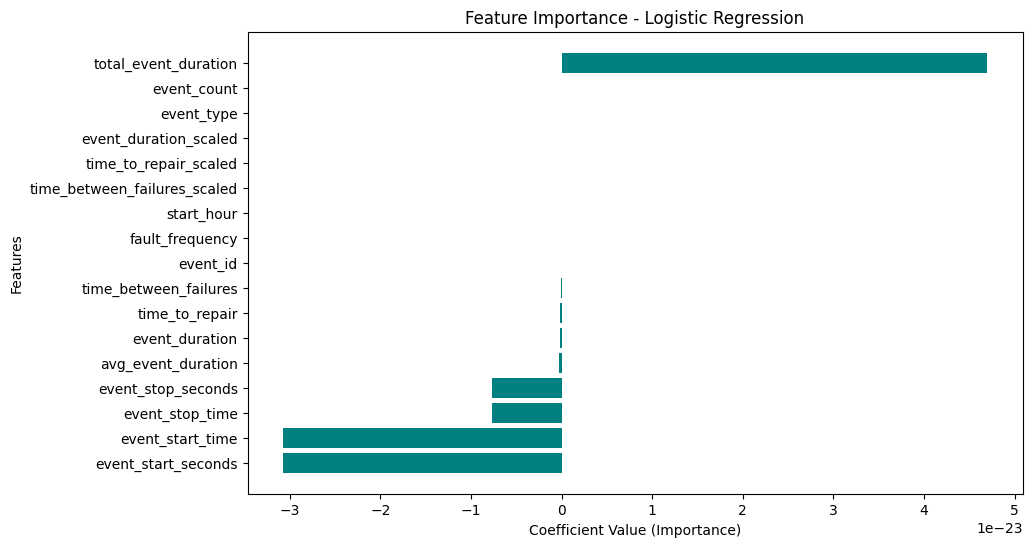

In [342]:
# Plot feature importance for logistic regression
def plot_feature_importance_log_reg(model, feature_names):
    # Get the coefficients
    coef = model.coef_
    coef_mean = np.mean(coef, axis=0)  # Average coefficients across classes (if multi-class)

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coef_mean
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
    plt.xlabel('Coefficient Value (Importance)')
    plt.ylabel('Features')
    plt.title('Feature Importance - Logistic Regression')
    plt.gca().invert_yaxis()  # Reverse the order for better readability
    plt.show()

# Plot feature importance
plot_feature_importance_log_reg(log_reg, X_train.columns)


In [343]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define a function to preprocess and train the logistic regression model for node_id prediction
def train_and_evaluate_model7(site_name, site_df, target_column='node_id'):
    # Features (drop target and irrelevant columns)
    X = site_df.drop(columns=[target_column, 'node_name', 'node_location'])
    y = site_df[target_column]  # Target column

    # Convert datetime columns into numeric format (total seconds since epoch)
    if 'event_start_time' in X.columns:
        X['event_start_time'] = pd.to_datetime(X['event_start_time']).astype('int64') // 1e9

    if 'event_stop_time' in X.columns:
        X['event_stop_time'] = pd.to_datetime(X['event_stop_time']).astype('int64') // 1e9

    # Drop any datetime columns that are irrelevant or already processed
    X = X.select_dtypes(exclude=['datetime64[ns]'])

    # Ensure all columns are numeric
    X = X.apply(pd.to_numeric, errors='coerce')

    # Remove classes with only one sample
    class_counts = y.value_counts()
    classes_to_remove = class_counts[class_counts == 1].index
    X_filtered = X[~y.isin(classes_to_remove)]
    y_filtered = y[~y.isin(classes_to_remove)]

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

    # Initialize and train a Logistic Regression model
    log_reg_model = LogisticRegression(max_iter=25, random_state=42)
    log_reg_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = log_reg_model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {site_name}: {accuracy}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Display the confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    return log_reg_model, accuracy  # Return the trained model and accuracy for further use


In [344]:
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

# Iterate over sites
for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_model7(site_name, site_df)


Processing data for site1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for site1: 0.014335752717293178
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00       101
           3       0.00      0.00      0.00        93
           4       0.00      0.00      0.00        72
           5       0.00      0.00      0.00        94
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        60
          10       0.00      0.00      0.00        64
          11       0.00      0.00      0.00       112
          12       0.00      0.00      0.00        72
          13       0.00      0.00      0.00        90
          14       0.00      0.00      0.00       109
          15       0.00      0.00      0.00       102
          16     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for site2: 0.037874160048869884
Classification Report:
              precision    recall  f1-score   support

         670       0.00      0.00      0.00        68
         671       0.00      0.00      0.00        65
         672       0.00      0.00      0.00        84
         673       0.00      0.00      0.00        67
         674       0.00      0.00      0.00        64
         675       0.00      0.00      0.00        51
         676       0.00      0.00      0.00        56
         677       0.00      0.00      0.00        62
         678       0.00      0.00      0.00        68
         679       0.00      0.00      0.00        56
         680       0.00      0.00      0.00        67
         681       0.00      0.00      0.00        70
         682       0.00      0.00      0.00        55
         683       0.04      1.00      0.07       124
         684       0.00      0.00      0.00        57
         685       0.00      0.00      0.00        61
         686     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for site3: 0.04236921746649373
Classification Report:
              precision    recall  f1-score   support

          64       0.00      0.00      0.00        36
          65       0.00      0.00      0.00        49
          66       0.00      0.00      0.00        33
          67       0.00      0.00      0.00        49
          68       0.00      0.00      0.00        41
          69       0.00      0.00      0.00        40
          70       0.00      0.00      0.00        44
          71       0.00      0.00      0.00        45
          72       0.00      0.00      0.00        40
          73       0.00      0.00      0.00        44
          74       0.00      0.00      0.00        47
          75       0.00      0.00      0.00        42
          76       0.00      0.00      0.00        43
          77       0.00      0.00      0.00        47
          78       0.04      1.00      0.07        51
          79       0.00      0.00      0.00        51
          80      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for site4: 0.01585820895522388
Classification Report:
              precision    recall  f1-score   support

         125       0.00      0.00      0.00       152
         126       0.00      0.00      0.00       172
         127       0.00      0.00      0.00       133
         128       0.00      0.00      0.00       165
         129       0.00      0.00      0.00       136
         130       0.02      1.00      0.03       176
         131       0.00      0.00      0.00       102
         132       0.00      0.00      0.00       177
         133       0.00      0.00      0.00       135
         134       0.00      0.00      0.00       147
         135       0.00      0.00      0.00       167
         136       0.00      0.00      0.00       146
         137       0.00      0.00      0.00       141
         138       0.00      0.00      0.00       142
         139       0.00      0.00      0.00       162
         140       0.00      0.00      0.00       143
         141      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for site5: 0.055573933178961296
Classification Report:
              precision    recall  f1-score   support

         490       0.00      0.00      0.00        44
         491       0.05      1.00      0.10       112
         492       0.00      0.00      0.00        41
         493       0.00      0.00      0.00        52
         494       0.00      0.00      0.00        50
         495       0.00      0.00      0.00        57
         496       0.00      0.00      0.00        42
         497       0.00      0.00      0.00        49
         498       0.00      0.00      0.00        39
         499       0.00      0.00      0.00        42
         500       0.00      0.00      0.00        37
         501       0.00      0.00      0.00        40
         502       0.00      0.00      0.00        41
         503       0.00      0.00      0.00        53
         504       0.00      0.00      0.00        42
         505       0.00      0.00      0.00        40
         506     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for site6: 0.02194301893470182
Classification Report:
              precision    recall  f1-score   support

         542       0.00      0.00      0.00        27
         543       0.00      0.00      0.00        49
         544       0.00      0.00      0.00        64
         545       0.00      0.00      0.00        58
         546       0.00      0.00      0.00        55
         547       0.00      0.00      0.00        59
         548       0.00      0.00      0.00        56
         549       0.00      0.00      0.00        53
         550       0.00      0.00      0.00        58
         551       0.00      0.00      0.00        58
         552       0.00      0.00      0.00        54
         553       0.00      0.00      0.00        51
         554       0.00      0.00      0.00        57
         555       0.00      0.00      0.00        58
         556       0.00      0.00      0.00        44
         557       0.00      0.00      0.00        59
         558      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for site7: 0.05794016790824169
Classification Report:
              precision    recall  f1-score   support

         840       0.00      0.00      0.00        81
         841       0.00      0.00      0.00        85
         842       0.00      0.00      0.00        96
         843       0.00      0.00      0.00        98
         844       0.00      0.00      0.00       200
         845       0.00      0.00      0.00       178
         846       0.00      0.00      0.00        99
         847       0.00      0.00      0.00       114
         848       0.00      0.00      0.00       167
         849       0.00      0.00      0.00       225
         850       0.00      0.00      0.00       210
         851       0.00      0.00      0.00       215
         852       0.00      0.00      0.00       185
         853       0.00      0.00      0.00        96
         854       0.00      0.00      0.00       113
         855       0.00      0.00      0.00       226
         856      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for site8: 0.007822950022293381
Classification Report:
              precision    recall  f1-score   support

          85       0.00      0.00      0.00       151
          86       0.00      0.00      0.00       218
          87       0.00      0.00      0.00       209
          88       0.00      0.00      0.00       264
          89       0.00      0.00      0.00       262
          90       0.00      0.00      0.00       244
          91       0.00      0.00      0.00       242
          92       0.00      0.00      0.00       222
          93       0.00      0.00      0.00       249
          94       0.00      0.00      0.00       259
          95       0.00      0.00      0.00       229
          96       0.01      1.00      0.01       299
          97       0.00      0.00      0.00       252
          98       0.00      0.00      0.00       203
          99       0.00      0.00      0.00       240
         100       0.00      0.00      0.00       237
         101     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [345]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model7(cluster_name, cluster_df)


Processing data for G1/site1/c1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site1/c1: 0.01874880428544098
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00       101
           3       0.00      0.00      0.00        93
           4       0.00      0.00      0.00        72
           5       0.00      0.00      0.00        94
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        60
          10       0.00      0.00      0.00        64
          11       0.02      0.60      0.04       112
          12       0.00      0.00      0.00        72
          13       0.00      0.00      0.00        90
          14       0.00      0.00      0.00       109
          15       0.00      0.00      0.00       102
          16

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site1/c2: 0.027589592538046145
Classification Report:
              precision    recall  f1-score   support

         320       0.00      0.00      0.00       174
         321       0.00      0.00      0.00       165
         322       0.00      0.00      0.00       157
         323       0.00      0.00      0.00       188
         324       0.04      0.38      0.07       191
         325       0.00      0.00      0.00       146
         326       0.00      0.00      0.00       140
         327       0.00      0.00      0.00       123
         328       0.00      0.00      0.00       138
         329       0.00      0.00      0.00       147
         330       0.00      0.00      0.00       152
         335       0.00      0.00      0.00       122
         336       0.00      0.00      0.00       126
         337       0.00      0.00      0.00       152
         338       0.00      0.00      0.00       127
         339       0.00      0.00      0.00       137
         34

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site1/c3: 0.021575804276632634
Classification Report:
              precision    recall  f1-score   support

         741       0.00      0.00      0.00       171
         742       0.00      0.00      0.00       128
         743       0.00      0.00      0.00       126
         744       0.00      0.00      0.00       146
         745       0.00      0.00      0.00       127
         746       0.00      0.00      0.00       177
         747       0.00      0.00      0.00       108
         748       0.00      0.00      0.00       115
         749       0.00      0.00      0.00       112
         750       0.00      0.00      0.00       106
         751       0.00      0.00      0.00       116
         752       0.00      0.00      0.00       120
         753       0.00      0.00      0.00       114
         754       0.00      0.00      0.00       120
         755       0.00      0.00      0.00       109
         756       0.00      0.00      0.00       116
         75

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site1/c4: 0.09473684210526316
Classification Report:
              precision    recall  f1-score   support

         406       0.00      0.00      0.00        43
         407       0.00      0.00      0.00        58
         408       0.00      0.00      0.00        50
         409       0.00      0.00      0.00        47
         410       0.00      0.00      0.00        42
         411       0.00      0.00      0.00        45
         412       0.00      0.00      0.00       115
         413       0.00      0.00      0.00        52
         414       0.00      0.00      0.00        57
         415       0.00      0.00      0.00        87
         416       0.00      0.00      0.00        44
         417       0.00      0.00      0.00        44
         418       0.00      0.00      0.00        46
         419       0.00      0.00      0.00        49
         420       0.00      0.00      0.00        42
         421       0.00      0.00      0.00        42
         422

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site2/c1: 0.037874160048869884
Classification Report:
              precision    recall  f1-score   support

         670       0.00      0.00      0.00        68
         671       0.00      0.00      0.00        65
         672       0.00      0.00      0.00        84
         673       0.00      0.00      0.00        67
         674       0.00      0.00      0.00        64
         675       0.00      0.00      0.00        51
         676       0.00      0.00      0.00        56
         677       0.00      0.00      0.00        62
         678       0.00      0.00      0.00        68
         679       0.00      0.00      0.00        56
         680       0.00      0.00      0.00        67
         681       0.00      0.00      0.00        70
         682       0.00      0.00      0.00        55
         683       0.04      1.00      0.07       124
         684       0.00      0.00      0.00        57
         685       0.00      0.00      0.00        61
         68

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site3/c1: 0.04236921746649373
Classification Report:
              precision    recall  f1-score   support

          64       0.00      0.00      0.00        36
          65       0.00      0.00      0.00        49
          66       0.00      0.00      0.00        33
          67       0.00      0.00      0.00        49
          68       0.00      0.00      0.00        41
          69       0.00      0.00      0.00        40
          70       0.00      0.00      0.00        44
          71       0.00      0.00      0.00        45
          72       0.00      0.00      0.00        40
          73       0.00      0.00      0.00        44
          74       0.00      0.00      0.00        47
          75       0.00      0.00      0.00        42
          76       0.00      0.00      0.00        43
          77       0.00      0.00      0.00        47
          78       0.04      1.00      0.07        51
          79       0.00      0.00      0.00        51
          80

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site4/c1: 0.0273180602731806
Classification Report:
              precision    recall  f1-score   support

         125       0.00      0.00      0.00       152
         126       0.00      0.00      0.00       172
         127       0.00      0.00      0.00       133
         128       0.00      0.00      0.00       165
         129       0.00      0.00      0.00       136
         130       0.02      1.00      0.03       176
         131       0.00      0.00      0.00       102
         132       0.00      0.00      0.00       177
         133       0.00      0.00      0.00       135
         134       0.00      0.00      0.00       147
         135       0.00      0.00      0.00       167
         136       0.00      0.00      0.00       146
         137       0.00      0.00      0.00       141
         138       0.00      0.00      0.00       142
         139       0.00      0.00      0.00       162
         140       0.00      0.00      0.00       144
         141 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site4/c2: 0.04010238907849829
Classification Report:
              precision    recall  f1-score   support

        1018       0.00      0.00      0.00        40
        1019       0.04      0.98      0.08        48
        1020       0.00      0.00      0.00        40
        1021       0.00      0.00      0.00        33
        1022       0.00      0.00      0.00        32
        1023       0.00      0.00      0.00        36
        1024       0.00      0.00      0.00        30
        1025       0.00      0.00      0.00        28
        1026       0.00      0.00      0.00        25
        1027       0.00      0.00      0.00        22
        1028       0.00      0.00      0.00        21
        1029       0.00      0.00      0.00        20
        1030       0.00      0.00      0.00        19
        1031       0.00      0.00      0.00        17
        1032       0.00      0.00      0.00        18
        1033       0.00      0.00      0.00        16
        1034

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site5/c1: 0.06372093023255813
Classification Report:
              precision    recall  f1-score   support

         490       0.00      0.00      0.00        44
         491       0.05      1.00      0.10       112
         492       0.00      0.00      0.00        41
         493       0.00      0.00      0.00        52
         494       0.00      0.00      0.00        50
         495       0.00      0.00      0.00        57
         496       0.00      0.00      0.00        42
         497       0.00      0.00      0.00        49
         498       0.00      0.00      0.00        39
         499       0.00      0.00      0.00        41
         500       0.00      0.00      0.00        37
         501       0.00      0.00      0.00        40
         502       0.00      0.00      0.00        41
         503       0.00      0.00      0.00        53
         504       0.00      0.00      0.00        41
         505       0.00      0.00      0.00        40
         506

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site5/c2: 0.03546910755148741
Classification Report:
              precision    recall  f1-score   support

        1141       0.04      1.00      0.07        31
        1142       0.00      0.00      0.00        22
        1143       0.00      0.00      0.00        24
        1144       0.00      0.00      0.00        26
        1145       0.00      0.00      0.00        21
        1146       0.00      0.00      0.00        19
        1147       0.00      0.00      0.00        20
        1148       0.00      0.00      0.00        20
        1149       0.00      0.00      0.00        19
        1150       0.00      0.00      0.00        20
        1151       0.00      0.00      0.00        20
        1152       0.00      0.00      0.00        17
        1153       0.00      0.00      0.00        20
        1154       0.00      0.00      0.00        18
        1155       0.00      0.00      0.00        18
        1156       0.00      0.00      0.00        20
        1157

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site6/c1: 0.023076923076923078
Classification Report:
              precision    recall  f1-score   support

         542       0.00      0.00      0.00        27
         543       0.00      0.00      0.00        49
         544       0.00      0.00      0.00        64
         545       0.00      0.00      0.00        58
         546       0.00      0.00      0.00        55
         547       0.00      0.00      0.00        58
         548       0.00      0.00      0.00        56
         549       0.00      0.00      0.00        53
         550       0.00      0.00      0.00        58
         551       0.00      0.00      0.00        58
         552       0.00      0.00      0.00        54
         553       0.00      0.00      0.00        51
         554       0.00      0.00      0.00        57
         555       0.00      0.00      0.00        58
         556       0.00      0.00      0.00        44
         557       0.00      0.00      0.00        59
         55

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site6/c2: 0.06430155210643015
Classification Report:
              precision    recall  f1-score   support

        1208       0.00      0.00      0.00        35
        1209       0.00      0.00      0.00        19
        1210       0.00      0.00      0.00        11
        1211       0.00      0.00      0.00        15
        1212       0.00      0.00      0.00        20
        1213       0.00      0.00      0.00        20
        1214       0.00      0.00      0.00        19
        1215       0.00      0.00      0.00        20
        1216       0.00      0.00      0.00        18
        1217       0.00      0.00      0.00        19
        1218       0.07      0.97      0.13        30
        1219       0.00      0.00      0.00        13
        1220       0.00      0.00      0.00        21
        1221       0.00      0.00      0.00        14
        1222       0.00      0.00      0.00        21
        1223       0.00      0.00      0.00        18
        1224

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site7/c1: 0.05794016790824169
Classification Report:
              precision    recall  f1-score   support

         840       0.00      0.00      0.00        81
         841       0.00      0.00      0.00        85
         842       0.00      0.00      0.00        96
         843       0.00      0.00      0.00        98
         844       0.00      0.00      0.00       200
         845       0.00      0.00      0.00       178
         846       0.00      0.00      0.00        99
         847       0.00      0.00      0.00       114
         848       0.00      0.00      0.00       167
         849       0.00      0.00      0.00       225
         850       0.00      0.00      0.00       210
         851       0.00      0.00      0.00       215
         852       0.00      0.00      0.00       185
         853       0.00      0.00      0.00        96
         854       0.00      0.00      0.00       113
         855       0.00      0.00      0.00       226
         856

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy for G1/site8/c1: 0.007822950022293381
Classification Report:
              precision    recall  f1-score   support

          85       0.00      0.00      0.00       151
          86       0.00      0.00      0.00       218
          87       0.00      0.00      0.00       209
          88       0.00      0.00      0.00       264
          89       0.00      0.00      0.00       262
          90       0.00      0.00      0.00       244
          91       0.00      0.00      0.00       242
          92       0.00      0.00      0.00       222
          93       0.00      0.00      0.00       249
          94       0.00      0.00      0.00       259
          95       0.00      0.00      0.00       229
          96       0.01      1.00      0.01       299
          97       0.00      0.00      0.00       252
          98       0.00      0.00      0.00       203
          99       0.00      0.00      0.00       240
         100       0.00      0.00      0.00       237
         10

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

# Model 7 - Logistic Regression for Cluster 1 of Site 4 (s4/c1)


In [346]:
cluster_dataframes = {
    'G1/site4/c1': cluster7_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model7(cluster_name, cluster_df)


Processing data for G1/site4/c1
Accuracy for G1/site4/c1: 0.0273180602731806
Classification Report:
              precision    recall  f1-score   support

         125       0.00      0.00      0.00       152
         126       0.00      0.00      0.00       172
         127       0.00      0.00      0.00       133
         128       0.00      0.00      0.00       165
         129       0.00      0.00      0.00       136
         130       0.02      1.00      0.03       176
         131       0.00      0.00      0.00       102
         132       0.00      0.00      0.00       177
         133       0.00      0.00      0.00       135
         134       0.00      0.00      0.00       147
         135       0.00      0.00      0.00       167
         136       0.00      0.00      0.00       146
         137       0.00      0.00      0.00       141
         138       0.00      0.00      0.00       142
         139       0.00      0.00      0.00       162
         140       0.00      0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Feature importance before filtering:
                         Feature    Importance
7           total_event_duration  1.000000e+00
8                    event_count  6.603153e-05
1                     event_type  7.238176e-10
12         event_duration_scaled  1.406976e-10
14         time_to_repair_scaled  3.529930e-11
13  time_between_failures_scaled  9.333671e-13
9                     start_hour -2.549422e-08
5                fault_frequency -4.279175e-06
0                       event_id -7.333922e-06
10         time_between_failures -2.003748e-03
11                time_to_repair -2.563323e-03
4                 event_duration -3.541063e-03
6             avg_event_duration -7.019943e-03
16            event_stop_seconds -1.632966e-01
3                event_stop_time -1.632966e-01
2               event_start_time -6.549400e-01
15           event_start_seconds -6.549400e-01
Feature importance after filtering:
                 Feature  Importance
7   total_event_duration    1.000000
16    e

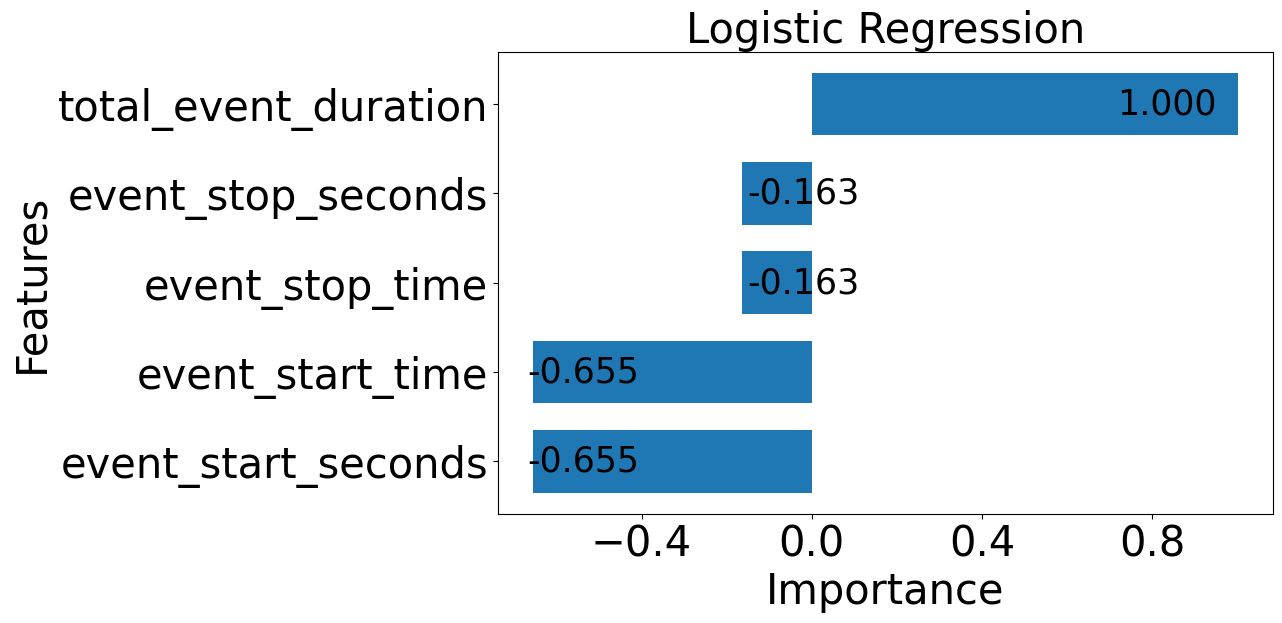

In [348]:
# Plot feature importance for logistic regression
def plot_feature_importance_log_reg(model, feature_names):
    # Get the coefficients
    coef = model.coef_
    coef_mean = np.mean(coef, axis=0)  # Average coefficients across classes (if multi-class)

    # Normalize coefficients so max abs value maps to ±1
    max_abs_coef = np.max(np.abs(coef_mean))
    coef_normalized = coef_mean / max_abs_coef if max_abs_coef != 0 else coef_mean


    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coef_normalized
    }).sort_values(by='Importance', ascending=False)

    print("Feature importance before filtering:")
    print(feature_importance_df)

    # Filter out small importances between -0.000019 and -0.000213 (adjusted for your case)
    # and keep only abs importance >= 0.001
    filtered_df = feature_importance_df[
        (~feature_importance_df['Importance'].between(-0.000213, -0.000019)) &
        (feature_importance_df['Importance'].abs() >= 0.01)
    ]

    print("Feature importance after filtering:")
    print(filtered_df)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    bars = plt.barh(filtered_df['Feature'], filtered_df['Importance'], height=0.7)
    #plt.barh(filtered_df['Feature'], filtered_df['Importance'])
    plt.xlabel('Importance', fontsize=30)
    plt.ylabel('Features', fontsize=30)
    plt.title('Logistic Regression', fontsize=30)
    plt.gca().invert_yaxis()  # Reverse the order for better readability

    # Reduce number of x-ticks for readability
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))


    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)


    for bar in bars:
        width = bar.get_width()
        y_pos = bar.get_y() + bar.get_height() / 2
        offset_small = 0.005  # offset for small bars
        offset_large = 0.02   # larger offset for inside labels

        if abs(width) >= 0.1:
          # For larger bars, put label *inside* near bar end if positive,
          # and inside near bar start if negative,
          # but shifted a bit right for negative bars for readability.
          if width > 0:
            x_pos = width * 0.95       # inside near end
            ha = 'right'
            plt.text(x_pos, y_pos, f'{width:.3f}', ha=ha, va='center', fontsize=25, color='black')
          else:
            x_pos = width * 1.05 + offset_large  # inside near start + shift right
            ha = 'left'
            plt.text(x_pos, y_pos, f'{width:.3f}', ha=ha, va='center', fontsize=25, color='black')
        else:
          # For smaller bars, put label just outside bar end:
          # For positive bars: just right (offset positive)
          # For negative bars: just right (offset positive), so label is always outside right side
          x_pos = width + offset_small
          plt.text(x_pos, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')

    plt.savefig('FNI_Logistic_Regression_Feature_Importance.png', bbox_inches='tight')
    plt.show()

# Plot feature importance
plot_feature_importance_log_reg(log_reg, X_train.columns)


## Model 8 - Random Forest

> Add blockquote



In [478]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Features (Assuming columns that represent system metrics)
#features = ['time_since_last_event', 'event_duration', 'event_count', 'fault_frequency_x', 'avg_event_duration']

# Target (Assuming 'node_id' is the label for which node failed)
target = 'node_id'

# Split the data into X (features) and y (target)
X = final_merged_data.drop(columns=[
    'node_id', 'node_name', 'node_location'])
y = final_merged_data[target]

# Convert datetime columns into numeric format (total seconds since epoch)
if 'event_start_time' in X.columns:
    X['event_start_time'] = pd.to_datetime(X['event_start_time']).astype('int64') // 1e9

if 'event_stop_time' in X.columns:
    X['event_stop_time'] = pd.to_datetime(X['event_stop_time']).astype('int64') // 1e9

# Drop any datetime columns that are irrelevant or already processed
X = X.select_dtypes(exclude=['datetime64[ns]'])

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Find the node_ids (classes) with only one sample
class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts == 1].index

# Filter out the rows where y belongs to a class with only one sample
X_filtered = X[~y.isin(classes_to_remove)]
y_filtered = y[~y.isin(classes_to_remove)]

# Now split the filtered dataset
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)


# Define and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Perform cross-validation for better evaluation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=2, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean()}')

Accuracy: 0.9247187574346599
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        84
           1       0.98      0.98      0.98        90
           2       0.25      0.28      0.26       101
           3       0.95      0.99      0.97        93
           4       0.08      0.06      0.07        72
           5       0.56      0.51      0.53        94
           6       0.93      0.99      0.96        71
           7       0.16      0.17      0.16        66
           8       0.92      0.95      0.94        84
           9       0.98      0.93      0.96        60
          10       0.17      0.19      0.18        64
          11       1.00      1.00      1.00       112
          12       0.97      1.00      0.99        72
          13       0.99      0.94      0.97        90
          14       1.00      1.00      1.00       109
          15       0.95      0.97      0.96       102
          16       0.40      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

[[66  0  0 ...  0  0  0]
 [ 0 88  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]
Cross-validation Accuracy: 0.9172564830234851




```
# This is formatted as code
```

### Feature Importance

Feature importance before filtering:
                         Feature  Importance
6             avg_event_duration    0.238125
8                    event_count    0.217334
5                fault_frequency    0.214146
7           total_event_duration    0.139376
0                       event_id    0.056649
2               event_start_time    0.018004
15           event_start_seconds    0.017890
16            event_stop_seconds    0.017705
3                event_stop_time    0.017565
12         event_duration_scaled    0.013384
4                 event_duration    0.013198
9                     start_hour    0.008608
13  time_between_failures_scaled    0.007890
10         time_between_failures    0.007654
14         time_to_repair_scaled    0.006072
11                time_to_repair    0.005998
1                     event_type    0.000401
Feature importance after filtering:
                Feature  Importance
6    avg_event_duration    0.238125
8           event_count    0.217334
5       f

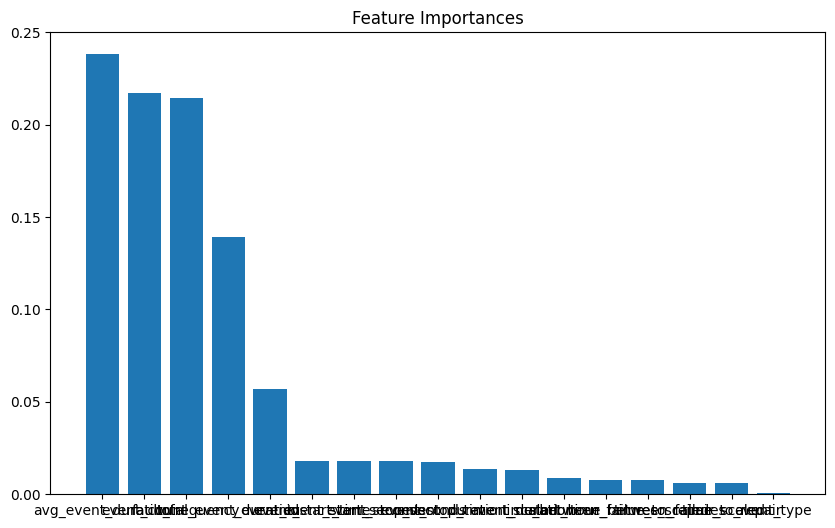

In [479]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained RandomForest model
importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

print("Feature importance before filtering:")
print(feature_importance_df)

 #Filter out small importances between -0.000019 and -0.000213 (adjusted for your case)
    # and keep only abs importance >= 0.001
filtered_df = feature_importance_df[
    (feature_importance_df['Importance'].abs() >= 0.1)
  ]

print("Feature importance after filtering:")
print(filtered_df)


# Assuming X_train is your training set containing the feature names
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])  # X_train.columns should contain the feature names
plt.show()







# Feature Importance

Feature importance before filtering:
                         Feature  Importance
6             avg_event_duration    0.238125
8                    event_count    0.217334
5                fault_frequency    0.214146
7           total_event_duration    0.139376
0                       event_id    0.056649
2               event_start_time    0.018004
15           event_start_seconds    0.017890
16            event_stop_seconds    0.017705
3                event_stop_time    0.017565
12         event_duration_scaled    0.013384
4                 event_duration    0.013198
9                     start_hour    0.008608
13  time_between_failures_scaled    0.007890
10         time_between_failures    0.007654
14         time_to_repair_scaled    0.006072
11                time_to_repair    0.005998
1                     event_type    0.000401
Feature importance after filtering:
                Feature  Importance
6    avg_event_duration    0.238125
8           event_count    0.217334
5       f

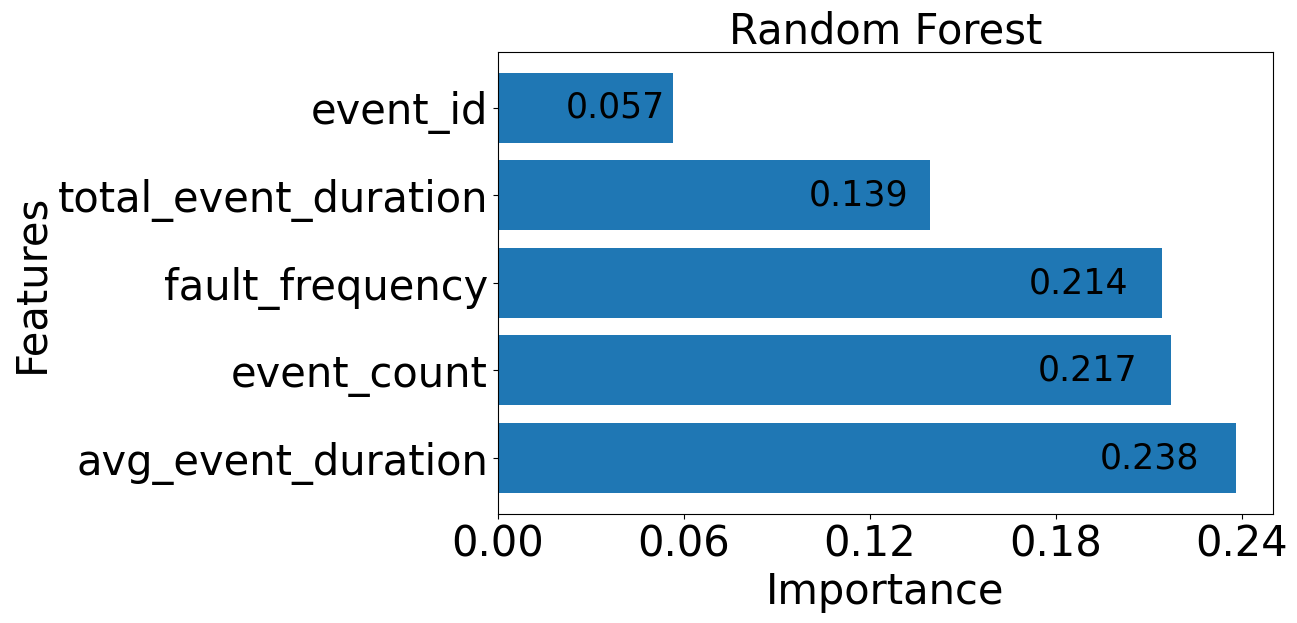

In [480]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained RandomForest model
importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

print("Feature importance before filtering:")
print(feature_importance_df)

 #Filter out small importances between -0.000019 and -0.000213 (adjusted for your case)
    # and keep only abs importance >= 0.001
filtered_df = feature_importance_df[
    (feature_importance_df['Importance'].abs() >= 0.05)
  ]

print("Feature importance after filtering:")
print(filtered_df)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(filtered_df['Feature'], filtered_df['Importance'], height=.8)


plt.title("Random Forest", fontsize=30)
plt.xlabel("Importance", fontsize=30)
plt.ylabel("Features", fontsize=30)
plt.gca().invert_yaxis()  # Highest importance at top

# Reduce number of x-ticks to prevent overlap
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.gca().invert_yaxis()


for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2

    if width >= 0.01:
        # Inside the bar near the end (95% of width)
        plt.text(width * 0.95, y_pos, f'{width:.3f}', ha='right', va='center', fontsize=25, color='black')
    else:
        # At the end of the bar (just outside)
        plt.text(width + 0.001, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')

#plt.tight_layout()
plt.savefig('FNI_Random_Forest_Feature_Importance.png', bbox_inches='tight')
plt.show()

## Learning curve

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  test_folds[y_encoded == k] = folds_for_class


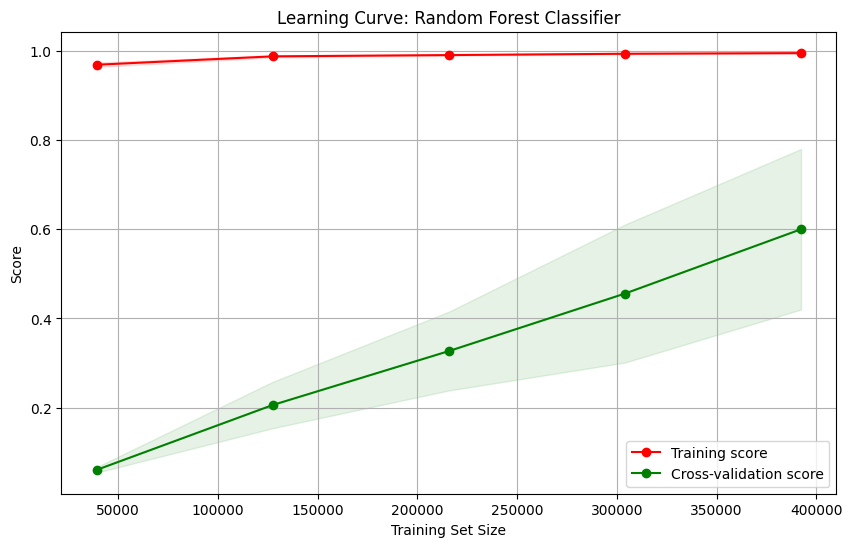

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def generate_learning_curve(estimator, X, y, title, train_sizes=None, cv=3, scoring="accuracy"):
    """
    Generate and plot a learning curve for a pre-trained model.

    Parameters:
        estimator: The trained model.
        X: Features (numpy array or pandas DataFrame).
        y: Target labels.
        title: Title for the learning curve.
        train_sizes: Relative or absolute numbers of training examples to use.
        cv: Number of cross-validation folds.
        scoring: Scoring metric to use.
    """
    # Set train sizes if not provided
    if train_sizes is None:
        train_sizes = np.linspace(0.1, 1.0, 5)  # Default: 5 equally spaced points

    # Generate the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=1
    )

    # Calculate mean and std
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.grid()

    # Plot the training and test scores
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Add legend
    plt.legend(loc="best")
    plt.show()


# Generate the learning curve for the Random Forest model
generate_learning_curve(
    rf_model, X_filtered, y_filtered,
    title="Learning Curve: Random Forest Classifier",
    cv=3, scoring="accuracy"
)


## Model 8 on 9 sites

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define a function to preprocess and train the model for node_id prediction
def train_and_evaluate_node_model8(site_name, site_df, target_column='node_id'):
    # Features (drop target and irrelevant columns)
    X = site_df.drop(columns=[target_column, 'node_name', 'node_location'])
    y = site_df[target_column]  # Target column

    # Convert datetime columns into numeric format (total seconds since epoch)
    if 'event_start_time' in X.columns:
        X['event_start_time'] = pd.to_datetime(X['event_start_time']).astype('int64') // 1e9

    if 'event_stop_time' in X.columns:
        X['event_stop_time'] = pd.to_datetime(X['event_stop_time']).astype('int64') // 1e9

    # Drop any datetime columns that are irrelevant or already processed
    X = X.select_dtypes(exclude=['datetime64[ns]'])

    # Ensure all columns are numeric
    X = X.apply(pd.to_numeric, errors='coerce')

    # Remove classes with only one sample
    class_counts = y.value_counts()
    classes_to_remove = class_counts[class_counts == 1].index
    X_filtered = X[~y.isin(classes_to_remove)]
    y_filtered = y[~y.isin(classes_to_remove)]

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

    # Initialize and train a Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=5, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {site_name}:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Display the confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

In [ ]:
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

# Iterate over sites
for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_node_model8(site_name, site_df)


Processing data for site1
Accuracy for site1:
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        84
           1       0.99      1.00      0.99        90
           2       0.18      0.17      0.18       101
           3       0.97      1.00      0.98        93
           4       0.11      0.06      0.07        72
           5       0.67      0.66      0.67        94
           6       0.97      0.99      0.98        71
           7       0.29      0.35      0.32        66
           8       0.97      1.00      0.98        84
           9       1.00      0.98      0.99        60
          10       0.24      0.28      0.26        64
          11       0.99      1.00      1.00       112
          12       0.94      1.00      0.97        72
          13       0.99      0.99      0.99        90
          14       0.98      1.00      0.99       109
          15       1.00      1.00      1.00       102
          1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if average == "binary":
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if average == "binary":
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if average == "binary":


Accuracy for site3:
Classification Report:
              precision    recall  f1-score   support

          64       1.00      1.00      1.00        36
          65       1.00      1.00      1.00        49
          66       1.00      1.00      1.00        33
          67       1.00      1.00      1.00        49
          68       1.00      1.00      1.00        41
          69       0.97      0.95      0.96        40
          70       1.00      1.00      1.00        44
          71       1.00      1.00      1.00        45
          72       0.95      0.97      0.96        40
          73       1.00      1.00      1.00        44
          74       1.00      1.00      1.00        47
          75       1.00      1.00      1.00        42
          76       1.00      1.00      1.00        43
          77       1.00      1.00      1.00        47
          78       1.00      1.00      1.00        51
          79       1.00      1.00      1.00        51
          80       0.98      1.00     

## Model 8 on 15 Clusters

In [ ]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_node_model8(cluster_name, cluster_df)


Processing data for G1/site1/c1
Accuracy for G1/site1/c1:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        84
           1       0.96      1.00      0.98        90
           2       0.18      0.18      0.18       101
           3       0.98      0.99      0.98        93
           4       0.12      0.06      0.08        72
           5       0.60      0.63      0.61        94
           6       0.91      0.99      0.95        71
           7       0.25      0.32      0.28        66
           8       0.98      0.99      0.98        84
           9       0.98      1.00      0.99        60
          10       0.27      0.30      0.28        64
          11       1.00      1.00      1.00       112
          12       0.96      1.00      0.98        72
          13       0.99      0.97      0.98        90
          14       1.00      1.00      1.00       109
          15       1.00      1.00      1.00       102

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if average == "binary":
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if average == "binary":
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  if average == "binary":


Accuracy for G1/site4/c1:
Classification Report:
              precision    recall  f1-score   support

         125       1.00      1.00      1.00       152
         126       1.00      1.00      1.00       172
         127       1.00      1.00      1.00       133
         128       1.00      1.00      1.00       165
         129       1.00      1.00      1.00       136
         130       1.00      1.00      1.00       176
         131       1.00      1.00      1.00       102
         132       1.00      1.00      1.00       177
         133       1.00      1.00      1.00       135
         134       1.00      1.00      1.00       147
         135       1.00      1.00      1.00       167
         136       1.00      1.00      1.00       146
         137       1.00      1.00      1.00       141
         138       1.00      1.00      1.00       142
         139       1.00      1.00      1.00       162
         140       1.00      1.00      1.00       144
         141       1.00      0.9

# Model 8 on Cluster 1 of Site 4 (s4/c1)

In [ ]:
cluster_dataframes = {
    'G1/site4/c1': cluster7_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_node_model8(cluster_name, cluster_df)

## Model 9 - XGBoost Classifier


Accuracy for the full dataset (on test set): 0.04756483023485029
Classification Report (on test set):


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00       101
           3       0.00      0.00      0.00        93
           4       0.00      0.00      0.00        72
           5       0.00      0.00      0.00        94
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        60
          10       0.00      0.00      0.00        64
          11       0.00      0.00      0.00       112
          12       0.00      0.00      0.00        72
          13       0.00      0.00      0.00        90
          14       0.00      0.00      0.00       109
          15       0.00      0.00      0.00       102
          16       0.00      0.00      0.00        89
          17       0.00    

<Figure size 1000x800 with 0 Axes>

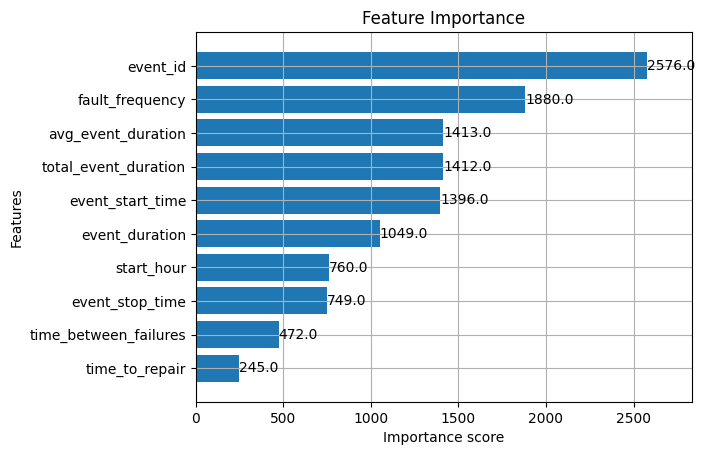

In [481]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Features (drop target and irrelevant columns)
X = final_merged_data.drop(columns=['node_id', 'node_name', 'node_location'])
y = final_merged_data['node_id']  # Target column

# Convert datetime columns into numeric format (total seconds since epoch)
if 'event_start_time' in X.columns:
    X['event_start_time'] = pd.to_datetime(X['event_start_time']).astype('int64') // 1e9

if 'event_stop_time' in X.columns:
    X['event_stop_time'] = pd.to_datetime(X['event_stop_time']).astype('int64') // 1e9

# Drop any datetime columns that are irrelevant or already processed
X = X.select_dtypes(exclude=['datetime64[ns]'])

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Remove classes with only one sample
class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts == 1].index
X_filtered = X[~y.isin(classes_to_remove)]
y_filtered = y[~y.isin(classes_to_remove)]

# Reindex the target variable to ensure consistent class labels
y_filtered = y_filtered.astype('category').cat.codes  # Remap node_id to continuous integers starting from 0

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

# Initialize and train an XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_full = xgb_model.predict(X_filtered)

# Evaluate the model's performance on the test set
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for the full dataset (on test set): {accuracy}')
print('Classification Report (on test set):')
print(classification_report(y_test, y_pred))

# Display the confusion matrix (on test set)
print('Confusion Matrix (on test set):')
print(confusion_matrix(y_test, y_pred))

# Plot Feature Importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance')
plt.show()

In [381]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Function to train and evaluate XGBoost Classifier
def train_and_evaluate_model9(df, site_name):
    if not isinstance(df, pd.DataFrame):
        print(f"Error: {site_name} is not a valid DataFrame. Received {type(df)}")
        return

    # Preprocess the data
    X = df.drop(columns=['node_id', 'node_name', 'node_location'])
    y = df['node_id']  # Target column

    # Convert datetime columns into numeric format (total seconds since epoch)
    if 'event_start_time' in X.columns:
        X['event_start_time'] = pd.to_datetime(X['event_start_time']).astype('int64') // 1e9

    if 'event_stop_time' in X.columns:
        X['event_stop_time'] = pd.to_datetime(X['event_stop_time']).astype('int64') // 1e9

    # Ensure all columns are numeric
    X = X.apply(pd.to_numeric, errors='coerce')

    # Remove classes with only one sample
    class_counts = y.value_counts()
    classes_to_remove = class_counts[class_counts == 1].index
    X = X[~y.isin(classes_to_remove)]
    y = y[~y.isin(classes_to_remove)]

    # Reindex the target variable to ensure consistent class labels
    y = y.astype('category').cat.codes

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize and train an XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{site_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [382]:
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

# Iterate over sites
for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_model9(site_df, f"Site: {site_name}")


Processing data for site1

Site: site1 - Accuracy: 0.22
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00       101
           3       0.00      0.00      0.00        93
           4       0.00      0.00      0.00        72
           5       0.00      0.00      0.00        94
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        60
          10       0.00      0.00      0.00        64
          11       0.00      0.00      0.00       112
          12       0.00      0.00      0.00        72
          13       0.00      0.00      0.00        90
          14       0.00      0.00      0.00       109
          15       0.36      1.00      0.53       102
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Site: site2 - Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        64
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        62
           8       1.00      1.00      1.00        68
           9       1.00      1.00      1.00        56
          10       1.00      1.00      1.00        67
          11       1.00      1.00      1.00        70
          12       1.00      1.00      1.00        55
          13       1.00      1.00      1.00       124
          14       1.00      1.00      1.00        57
          15       1.00      1.00      1.00        61
          16       1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Site: site3 - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        44
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        43
          13       1.00      1.00      1.00        47
          14       1.00      1.00      1.00        51
          15       1.00      1.00      1.00        51
          16       1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Site: site9 - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       117
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00       112
          10       1.00      1.00      1.00        37
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00        82
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00       117
          16       1.00     

In [383]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model9(cluster_df, f"Site: {cluster_name}")


Processing data for G1/site1/c1

Site: G1/site1/c1 - Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        90
           2       0.30      0.32      0.31       101
           3       1.00      1.00      1.00        93
           4       0.14      0.06      0.08        72
           5       0.77      0.80      0.78        94
           6       1.00      1.00      1.00        71
           7       0.31      0.33      0.32        66
           8       1.00      1.00      1.00        84
           9       1.00      1.00      1.00        60
          10       0.27      0.27      0.27        64
          11       1.00      1.00      1.00       112
          12       1.00      1.00      1.00        72
          13       1.00      1.00      1.00        90
          14       1.00      1.00      1.00       109
          15       1.00      1.00      1.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Site: G1/site3/c1 - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        44
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        43
          13       1.00      1.00      1.00        47
          14       1.00      1.00      1.00        51
          15       1.00      1.00      1.00        51
          16       1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Site: G1/site9/c1 - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       117
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00       112
          10       1.00      1.00      1.00        37
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00        82
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00       117
          16       1.0

# Model 9 on Cluster 1 of Site 4 (s4/c1)

In [384]:
cluster_dataframes = {
    'G1/site4/c1': cluster7_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model9(cluster_df, f"Site: {cluster_name}")


Processing data for G1/site4/c1

Site: G1/site4/c1 - Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       172
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       165
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       176
           6       1.00      1.00      1.00       102
           7       1.00      1.00      1.00       177
           8       1.00      1.00      1.00       135
           9       1.00      1.00      1.00       147
          10       1.00      1.00      1.00       167
          11       1.00      1.00      1.00       146
          12       1.00      1.00      1.00       141
          13       1.00      1.00      1.00       142
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00

Feature importances:
                         Feature  Importance
8                    event_count    0.666241
5                fault_frequency    0.176875
6             avg_event_duration    0.106472
7           total_event_duration    0.036240
0                       event_id    0.008034
2               event_start_time    0.003321
4                 event_duration    0.001148
3                event_stop_time    0.001026
11                time_to_repair    0.000333
10         time_between_failures    0.000177
9                     start_hour    0.000131
1                     event_type    0.000004
12         event_duration_scaled    0.000000
13  time_between_failures_scaled    0.000000
14         time_to_repair_scaled    0.000000
15           event_start_seconds    0.000000
16            event_stop_seconds    0.000000
Feature importance after filtering:
                Feature  Importance
8           event_count    0.666241
5       fault_frequency    0.176875
6    avg_event_duration  

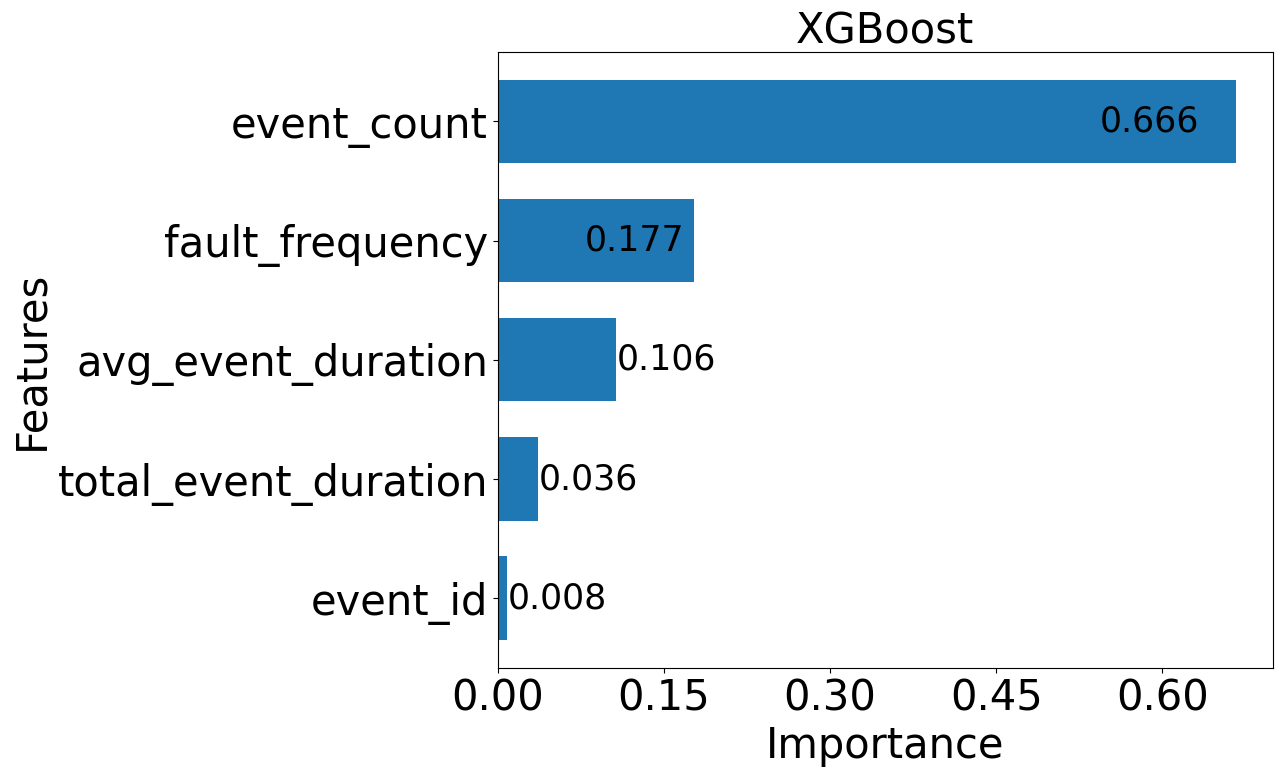

In [484]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

feature_names = X_train.columns
importances = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature importances:")
print(feature_importance_df)

#Filter out small importances between -0.000019 and -0.000213 (adjusted for your case)
    # and keep only abs importance >= 0.001
filtered_df = feature_importance_df[
    (feature_importance_df['Importance'].abs() >= 0.008)
  ]

print("Feature importance after filtering:")
print(filtered_df)

# Plot Feature Importance
plt.figure(figsize=(10, 8))
bars = plt.barh(filtered_df['Feature'], filtered_df['Importance'], height=0.7)
plt.xlabel('Importance', fontsize=30)
plt.ylabel('Features', fontsize=30)
plt.gca().invert_yaxis()

# Reduce x-axis ticks for readability
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.set_ylim(-0.5, len(filtered_df) - 0.5)  # tight vertical limits
#ax.tick_params(axis='y', pad=1)  # reduce padding of y tick labels

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Add importance values as labels on bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    if 0.05 <= width < 0.15:
        # Label just outside the bar, aligned left
        plt.text(width + 0.001, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')
    elif width >= 0.1:
        # Label inside near the end, aligned right
        plt.text(width * 0.95, y_pos, f'{width:.3f}', ha='right', va='center', fontsize=25, color='black')
    else:
        # Label outside for smaller bars, aligned left
        plt.text(width + 0.001, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')


plt.title('XGBoost', fontsize=30)
#plt.tight_layout()
plt.savefig('FNI_XGBoost_Feature_Importance.png', bbox_inches='tight')
plt.show()


# **Problem statement 4 - Prediction of duration of failure**

In [408]:
print(final_merged_data.columns)

Index(['node_id', 'node_name', 'event_id', 'event_type', 'event_start_time',
       'event_stop_time', 'node_location', 'event_duration', 'fault_frequency',
       'avg_event_duration', 'total_event_duration', 'event_count',
       'start_hour', 'time_between_failures', 'time_to_repair',
       'event_duration_scaled', 'time_between_failures_scaled',
       'time_to_repair_scaled', 'event_start_seconds', 'event_stop_seconds'],
      dtype='object')


In [409]:
final_merged_data.head(10)

node_id          node_name  event_id  event_type    event_start_time  \
0        0  G1/site1/c1/node1         0           0 2005-05-11 11:32:19   
1        0  G1/site1/c1/node1         1           1 2005-05-23 14:09:12   
2        0  G1/site1/c1/node1         2           0 2005-05-23 14:17:15   
3        0  G1/site1/c1/node1         3           1 2005-05-23 18:16:04   
4        0  G1/site1/c1/node1         4           0 2005-05-23 22:03:14   
5        0  G1/site1/c1/node1         5           1 2005-05-26 23:11:20   
6        0  G1/site1/c1/node1         6           0 2005-05-27 09:05:36   
7        0  G1/site1/c1/node1         7           1 2005-05-27 09:37:04   
8        0  G1/site1/c1/node1         8           0 2005-05-27 09:40:14   
9        0  G1/site1/c1/node1         9           1 2005-05-27 10:40:09   

      event_stop_time node_location  event_duration  fault_frequency  \
0 2005-05-23 14:09:12   G1/site1/c1       1046213.0              211   
1 2005-05-23 14:17:15   G1/site1/c1           483.0              211   
2 2005-05-23 18:16:04   G1/site1/c1         14329.0              211   
3 2005-05-23 22:03:14   G1/site1/c1         13630.0              211   
4 2005-05-26 23:11:20   G1/site1/c1        263286.0              211   
5 2005-05-27 09:05:36   G1/site1/c1         35656.0              211   
6 2005-05-27 09:37:04   G1/site1/c1          1888.0              211   
7 2005-05-27 09:40:14   G1/site1/c1           190.0              211   
8 2005-05-27 10:40:09   G1/site1/c1          3595.0              211   
9 2005-05-27 11:59:06   G1/site1/c1          4737.0              211   

   avg_event_duration  total_event_duration  event_count  start_hour  \
0       112214.372038            47354465.0          422          11   
1       112214.372038            47354465.0          422          14   
2       112214.372038            47354465.0          422          14   
3       112214.372038            47354465.0          422          18   
4       112214.372038            47354465.0          422          22   
5       112214.372038            47354465.0          422          23   
6       112214.372038            47354465.0          422           9   
7       112214.372038            47354465.0          422           9   
8       112214.372038            47354465.0          422           9   
9       112214.372038            47354465.0          422          10   

   time_between_failures  time_to_repair  event_duration_scaled  \
0              1046213.0             0.0               0.028610   
1                    0.0           483.0               0.000013   
2                14329.0             0.0               0.000392   
3                    0.0         13630.0               0.000373   
4               263286.0             0.0               0.007200   
5                    0.0         35656.0               0.000975   
6                 1888.0             0.0               0.000052   
7                    0.0           190.0               0.000005   
8                 3595.0             0.0               0.000098   
9                    0.0          4737.0               0.000130   

   time_between_failures_scaled  time_to_repair_scaled  event_start_seconds  \
0                      0.046020               0.000000         1.115811e+09   
1                      0.000000               0.000013         1.116857e+09   
2                      0.000630               0.000000         1.116858e+09   
3                      0.000000               0.000373         1.116872e+09   
4                      0.011581               0.000000         1.116886e+09   
5                      0.000000               0.000975         1.117149e+09   
6                      0.000083               0.000000         1.117185e+09   
7                      0.000000               0.000005         1.117187e+09   
8                      0.000158               0.000000         1.117187e+09   
9                      0.000000               0.000130         

In [410]:
!pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.2
    Uninstalling xgboost-3.0.2:
      Successfully uninstalled xgboost-3.0.2


In [413]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588463 entries, 0 to 588462
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   node_id                       588463 non-null  int64         
 1   event_id                      588463 non-null  int64         
 2   event_type                    588463 non-null  int64         
 3   event_start_time              588463 non-null  datetime64[ns]
 4   fault_frequency               588463 non-null  int64         
 5   avg_event_duration            588463 non-null  float64       
 6   total_event_duration          588463 non-null  float64       
 7   event_count                   588463 non-null  int64         
 8   start_hour                    588463 non-null  int32         
 9   time_between_failures         588463 non-null  float64       
 10  time_to_repair                588463 non-null  float64       
 11  time_between_

In [412]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Split the cleaned dataset into features (X) and target (y)
X = final_merged_data.drop(columns=['event_duration', 'node_name', 'node_location', 'event_stop_time', 'event_duration_scaled'])
y = final_merged_data['event_duration']

# Further split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing pipeline
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define and train the Linear Regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred_test)

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='r2')

# Print results
print("Model: Linear Regression")
print(f"Training MAE: {mae_train}, RMSE: {rmse_train}, R2: {r2_train}")
print(f"Test MAE: {mae_test}, RMSE: {rmse_test}, R2: {r2_test}")
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean Cross-validation R2: {cv_scores.mean()}")


Model: Linear Regression
Training MAE: 2.293080087974856e-10, RMSE: 3.4683077542196336e-10, R2: 1.0
Test MAE: 2.282703190010198e-10, RMSE: 3.435536690395478e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0


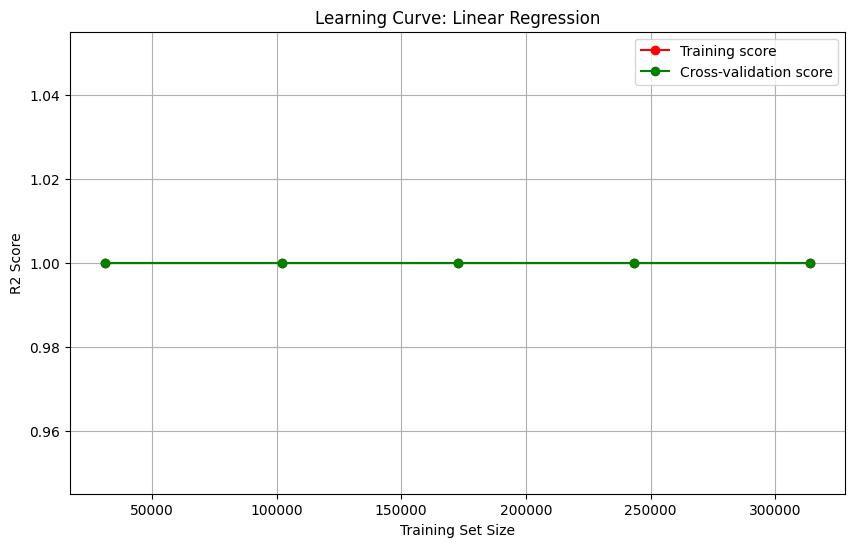

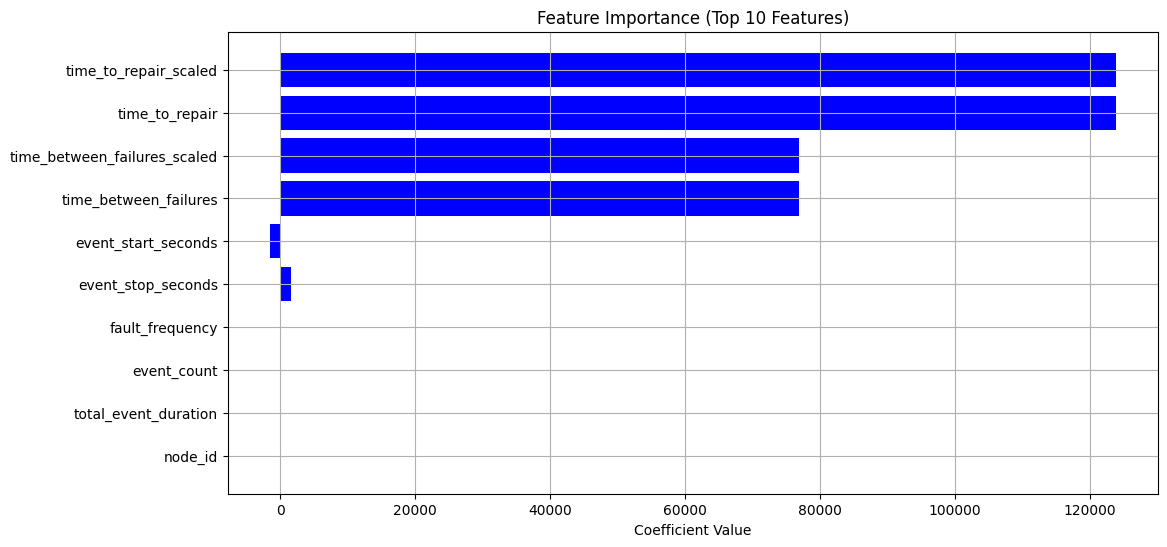

In [414]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Generate Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='r2', n_jobs=-1
)

# Calculate mean and std deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve: Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Feature Importance
# Extract the feature names after preprocessing
preprocessor.fit(X_train)
feature_names = numeric_features  # Since there are no categorical features, use only numeric features

# Extract the coefficients of the trained linear regression model
pipeline.named_steps['regressor'].fit(preprocessor.transform(X_train), y_train)
coefficients = pipeline.named_steps['regressor'].coef_

# Plot feature importance based on coefficients
plt.figure(figsize=(12, 6))
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

plt.barh(sorted_feature_names[:10], sorted_coefficients[:10], color="b")
plt.title("Feature Importance (Top 10 Features)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.grid()
plt.show()


## Model 10 through the 9 sites

In [415]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

target_column = 'event_duration'

# Define a function to preprocess and train the linear regression model for event_duration prediction
def train_and_evaluate_model10(site_name, site_df, target_column='event_duration'):
    # Features (drop target and irrelevant columns)
    X = site_df.drop(columns=[target_column, 'node_name', 'node_location', 'event_stop_time', 'event_duration_scaled'])
    y = site_df[target_column]  # Target column

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the preprocessing pipeline
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer, numeric_features),
                      ('cat', categorical_transformer, categorical_features)])

    # Define and train the Linear Regression model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

    pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Calculate evaluation metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mse_train ** 0.5
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mse_test ** 0.5
    r2_test = r2_score(y_test, y_pred_test)

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='r2')

    # Print results
    print(f"Model: Linear Regression - {site_name}")
    print(f"Training MAE: {mae_train}, RMSE: {rmse_train}, R2: {r2_train}")
    print(f"Test MAE: {mae_test}, RMSE: {rmse_test}, R2: {r2_test}")
    print(f"Cross-validation R2 scores: {cv_scores}")
    print(f"Mean Cross-validation R2: {cv_scores.mean()}")


In [416]:
# Define your site dataframes
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

# Iterate over sites
for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_model10(site_name, site_df)



Processing data for site1
Model: Linear Regression - site1
Training MAE: 1.1814154636720095e-10, RMSE: 1.5135940156965534e-10, R2: 1.0
Test MAE: 1.1790529964190735e-10, RMSE: 1.5241484506782493e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0

Processing data for site2
Model: Linear Regression - site2
Training MAE: 1.417958844736156e-10, RMSE: 2.819163567354737e-10, R2: 1.0
Test MAE: 1.3537192489626427e-10, RMSE: 2.3385414517180017e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0

Processing data for site3
Model: Linear Regression - site3
Training MAE: 3.7138765381228123e-10, RMSE: 6.981000432320886e-10, R2: 1.0
Test MAE: 3.882461049103964e-10, RMSE: 7.175993889304265e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0

Processing data for site4
Model: Linear Regression - site4
Training MAE: 2.2636117305414167e-10, RMSE: 3.417122453176563e-10, R2: 1.0
Test MAE: 2.2468930861822315e-10, RMSE:

## Model 10 through 15 clusters

In [417]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model10(cluster_name, cluster_df)


Processing data for G1/site1/c1
Model: Linear Regression - G1/site1/c1
Training MAE: 1.6959450847018954e-10, RMSE: 2.165320048553887e-10, R2: 1.0
Test MAE: 1.7006419927255245e-10, RMSE: 2.2756764376410557e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0

Processing data for G1/site1/c2
Model: Linear Regression - G1/site1/c2
Training MAE: 1.119279246636474e-10, RMSE: 1.8458996258664404e-10, R2: 1.0
Test MAE: 1.1316667997612488e-10, RMSE: 1.8578602843528042e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0

Processing data for G1/site1/c3
Model: Linear Regression - G1/site1/c3
Training MAE: 9.75424251959293e-11, RMSE: 1.2275280752450157e-10, R2: 1.0
Test MAE: 9.874999476067451e-11, RMSE: 1.2414168202263481e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0

Processing data for G1/site1/c4
Model: Linear Regression - G1/site1/c4
Training MAE: 3.166099865863837e-10, RMSE: 3.8440777925629644e-10,

# Model 10 for Cluster 1 of Site 4 (s4/c1)

In [419]:
cluster_dataframes = {
    'G1/site4/c1': cluster7_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model10(cluster_name, cluster_df)


Processing data for G1/site4/c1
Model: Linear Regression - G1/site4/c1
Training MAE: 1.2857189252417955e-10, RMSE: 2.6697828003423037e-10, R2: 1.0
Test MAE: 1.272616886483384e-10, RMSE: 2.0482996413334936e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0


Feature importances (normalized):
                         Feature    Importance
0          time_to_repair_scaled  1.000000e+00
1                 time_to_repair  1.000000e+00
2   time_between_failures_scaled  6.207350e-01
3          time_between_failures  6.207350e-01
4            event_start_seconds -1.227555e-02
5             event_stop_seconds  1.227179e-02
6                fault_frequency -1.914984e-14
7                    event_count  1.706614e-14
8           total_event_duration  1.657780e-15
9                        node_id  1.105418e-15
10                    event_type -3.597699e-16
11                      event_id -2.680353e-16
12            avg_event_duration  2.524305e-16

Feature importances after applying cutoff:
                        Feature  Importance
0         time_to_repair_scaled    1.000000
1                time_to_repair    1.000000
2  time_between_failures_scaled    0.620735
3         time_between_failures    0.620735
4           event_start_seconds   -0.012276


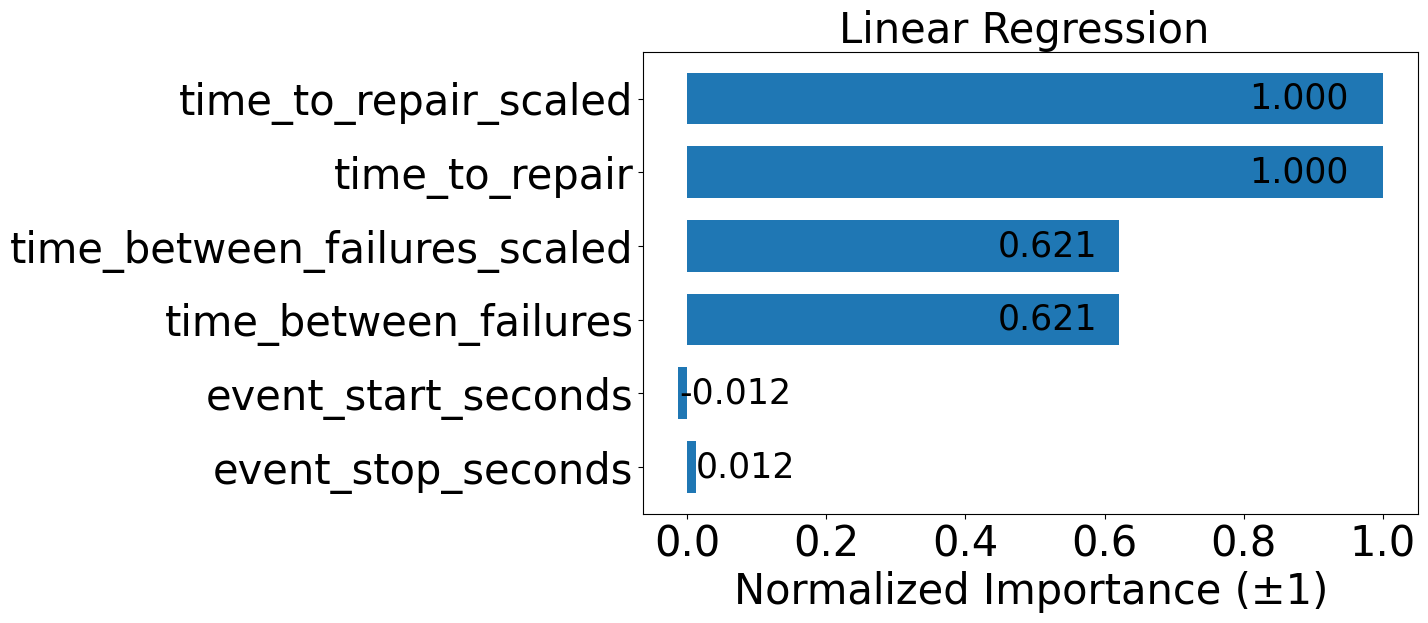

In [437]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Feature Importance
# Extract the feature names after preprocessing
preprocessor.fit(X_train)
feature_names = numeric_features  # Since there are no categorical features, use only numeric features

# Extract the coefficients of the trained linear regression model
pipeline.named_steps['regressor'].fit(preprocessor.transform(X_train), y_train)
coefficients = pipeline.named_steps['regressor'].coef_

# Normalize coefficients to range between -1 and +1 by dividing by max absolute value
max_abs_coef = np.max(np.abs(coefficients))
coefficients_normalized = coefficients / max_abs_coef if max_abs_coef != 0 else coefficients


# Sort by absolute value descending using normalized coefficients
sorted_indices = np.argsort(np.abs(coefficients_normalized))[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients_normalized[sorted_indices]

# Create DataFrame and sort by absolute normalized importance descending
feature_importance_df = pd.DataFrame({
    'Feature': sorted_feature_names,
    'Importance': sorted_coefficients
}).sort_values(by='Importance', key=lambda x: np.abs(x), ascending=False)

print("Feature importances (normalized):")
print(feature_importance_df)

# Define your cutoff feature name exactly as in the DataFrame
cutoff_feature = 'event_stop_seconds'  # replace with your exact column name if different

# Find the position (index) of the cutoff feature in the sorted DataFrame index
if cutoff_feature in feature_importance_df['Feature'].values:
    cutoff_pos = feature_importance_df.index[feature_importance_df['Feature'] == cutoff_feature][0]

    # Select all features from start up to and including the cutoff feature
    cutoff_idx = feature_importance_df.index.get_loc(cutoff_pos)

    # Filter rows up to cutoff_idx inclusive
    feature_importance_df_filtered = feature_importance_df.iloc[:cutoff_idx + 1]
else:
    # If cutoff feature not found, output warning and keep all features
    print(f"Cutoff feature '{cutoff_feature}' not found. No filtering applied.")
    feature_importance_df_filtered = feature_importance_df

print("\nFeature importances after applying cutoff:")
print(feature_importance_df_filtered)

#plt.xticks(fontsize=30)
#plt.yticks(fontsize=30)


# Plot feature importance based on coefficients
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df_filtered['Feature'], feature_importance_df_filtered['Importance'], height=0.7)
plt.title("Linear Regression ", fontsize=30)
plt.xlabel("Normalized Importance (±1)", fontsize=30)
plt.gca().invert_yaxis()
#plt.grid()

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2

    if width >= 0.1:
        # Inside the bar near the end (95% of width)
        plt.text(width * 0.95, y_pos, f'{width:.3f}', ha='right', va='center', fontsize=25, color='black')
    else:
        # At the end of the bar (just outside)
        plt.text(width + 0.001, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')

plt.savefig('TTR_Linear_Regression_Feature_Importance.png', bbox_inches='tight')
plt.show()



## Model 10 through 45 nodes

In [418]:
node_dataframes = {
    9: node9_df, 20: node20_df, 11: node11_df, 342: node342_df, 447: node447_df,
    352: node352_df, 820: node820_df, 839: node839_df, 780: node780_df, 889: node889_df,
    429: node429_df, 434: node434_df, 887: node887_df, 683: node683_df,
    717: node717_df, 79: node79_df, 454: node454_df, 663: node663_df,
    458: node458_df, 1060: node1060_df, 1019: node1019_df, 520: node520_df,
    523: node523_df, 491: node491_df, 1161: node1161_df, 1141: node1141_df,
    542: node542_df, 622: node622_df, 577: node577_df, 1210: node1210_df, 1229: node1229_df,
    1208: node1208_df, 840: node840_df, 872: node872_df, 868: node868_df, 965: node965_df,
    273: node273_df, 209: node209_df, 1101: node1101_df, 1078: node1078_df
}

# Nodes 1268, 888, 1171 removed owing to only 2 entries each
# Node 1250, 1282 only one entry
for node_id, node_df in node_dataframes.items():
    print(f"\nProcessing data for Node {node_id}")
    train_and_evaluate_model10(node_id, node_df)


Processing data for Node 9
Model: Linear Regression - 9
Training MAE: 1.9992278556482425e-10, RMSE: 4.030009689655617e-10, R2: 1.0
Test MAE: 1.817796623609105e-10, RMSE: 3.067523903221301e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0

Processing data for Node 20
Model: Linear Regression - 20
Training MAE: 2.09402060136199e-10, RMSE: 5.701262601242922e-10, R2: 1.0
Test MAE: 2.1119424338011366e-10, RMSE: 3.552300734633305e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0

Processing data for Node 11
Model: Linear Regression - 11
Training MAE: 1.0254858646358076e-10, RMSE: 1.9261716567753406e-10, R2: 1.0
Test MAE: 9.413270163349807e-11, RMSE: 1.4146245457194142e-10, R2: 1.0
Cross-validation R2 scores: [1. 1. 1.]
Mean Cross-validation R2: 1.0

Processing data for Node 342
Model: Linear Regression - 342
Training MAE: 5.601382553739041e-11, RMSE: 8.315708466537917e-11, R2: 1.0
Test MAE: 7.169327200872117e-11, RMSE: 1.485070

In [438]:
from sklearn.ensemble import RandomForestRegressor

# Define and train the Random Forest Regressor model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=5, random_state=42))])

pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred_test)

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='r2')

# Print results
print("Model: Random Forest Regressor")
print(f"Training MAE: {mae_train}, RMSE: {rmse_train}, R2: {r2_train}")
print(f"Test MAE: {mae_test}, RMSE: {rmse_test}, R2: {r2_test}")
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean Cross-validation R2: {cv_scores.mean()}")


Model: Random Forest Regressor
Training MAE: 29.46615842130974, RMSE: 7300.347207878863, R2: 0.9993613933335707
Test MAE: 180.6536939325193, RMSE: 35339.34478781436, R2: 0.9847082667800755
Cross-validation R2 scores: [0.99953687 0.95455806 0.99518508]
Mean Cross-validation R2: 0.9830933396136644


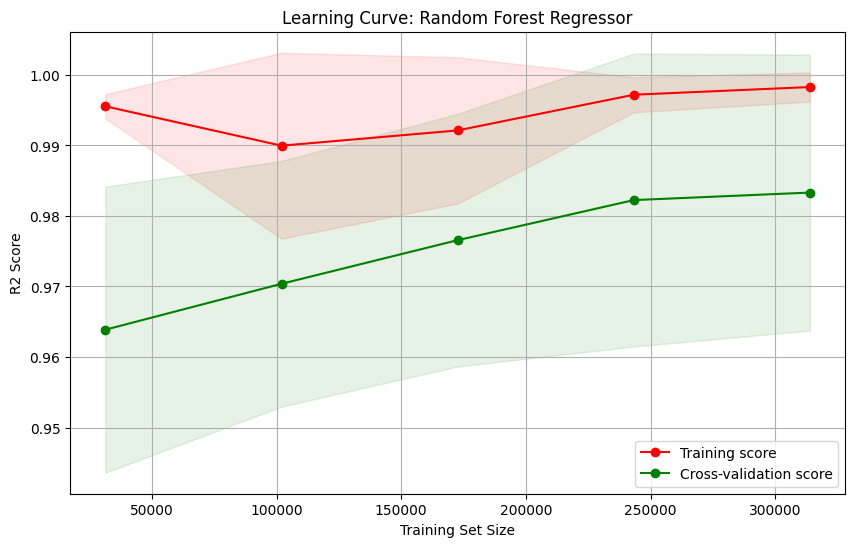

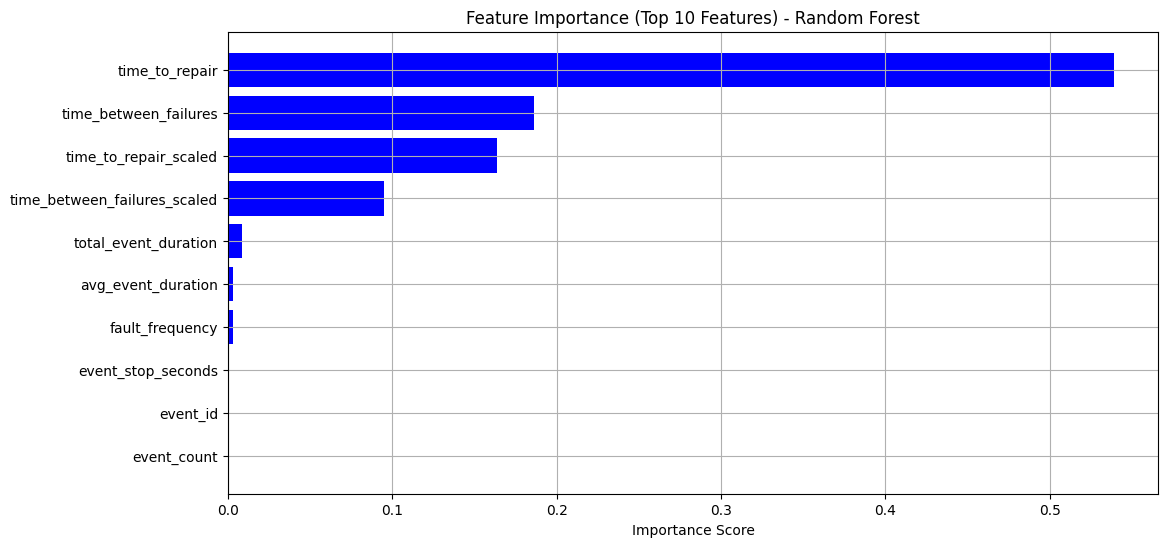

In [439]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

# Generate Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='r2', n_jobs=-1
)

# Calculate mean and std deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve: Random Forest Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Feature Importance
# Extract the feature importances from the trained Random Forest model
regressor = pipeline.named_steps['regressor']
feature_importances = regressor.feature_importances_

# Extract the feature names
feature_names = numeric_features  # Since there are no categorical features

# Plot feature importance
plt.figure(figsize=(12, 6))
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.barh(sorted_feature_names[:10], sorted_importances[:10], color="b")
plt.title("Feature Importance (Top 10 Features) - Random Forest")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid()
plt.show()


## Model 11 through 9 sites

In [440]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define a function to preprocess and train the Random Forest Regressor model for event_duration prediction
def train_and_evaluate_model11(site_name, site_df, target_column='event_duration'):
    # Features (drop target and irrelevant columns)
    X = site_df.drop(columns=[target_column, 'node_name', 'node_location', 'event_stop_time', 'event_duration_scaled'])
    y = site_df[target_column]  # Target column

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the preprocessing pipeline
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer, numeric_features),
                      ('cat', categorical_transformer, categorical_features)])

    # Define and train the Random Forest Regressor model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(n_estimators=5, random_state=42))])

    pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Calculate evaluation metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mse_train ** 0.5
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mse_test ** 0.5
    r2_test = r2_score(y_test, y_pred_test)

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='r2')

    # Print results
    print(f"Model: Random Forest Regressor - {site_name}")
    print(f"Training MAE: {mae_train}, RMSE: {rmse_train}, R2: {r2_train}")
    print(f"Test MAE: {mae_test}, RMSE: {rmse_test}, R2: {r2_test}")
    print(f"Cross-validation R2 scores: {cv_scores}")
    print(f"Mean Cross-validation R2: {cv_scores.mean()}")


In [441]:
# Define your site dataframes
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

# Iterate over sites
for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_model11(site_name, site_df)



Processing data for site1
Model: Random Forest Regressor - site1
Training MAE: 22.25165705206333, RMSE: 1091.0380061971293, R2: 0.9999805670897222
Test MAE: 67.40616040154549, RMSE: 4622.7641077624, R2: 0.9996989457271339
Cross-validation R2 scores: [0.99942271 0.99974523 0.99987896]
Mean Cross-validation R2: 0.9996823001728244

Processing data for site2
Model: Random Forest Regressor - site2
Training MAE: 806.2015578465061, RMSE: 31392.881352241955, R2: 0.9920003359795032
Test MAE: 711.278375076359, RMSE: 11844.0168529675, R2: 0.9982547188030785
Cross-validation R2 scores: [0.86265095 0.99532164 0.99365138]
Mean Cross-validation R2: 0.950541325653036

Processing data for site3
Model: Random Forest Regressor - site3
Training MAE: 1227.302972651605, RMSE: 72319.91694519954, R2: 0.9842618042867561
Test MAE: 1728.6660613921322, RMSE: 30419.90177761097, R2: 0.9972821837912779
Cross-validation R2 scores: [0.99765558 0.98180274 0.7575732 ]
Mean Cross-validation R2: 0.9123438405358254

Proce

## Model 11 through 15 clusters

In [442]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model11(cluster_name, cluster_df)


Processing data for G1/site1/c1
Model: Random Forest Regressor - G1/site1/c1
Training MAE: 27.731295738269495, RMSE: 759.7723832505487, R2: 0.999995575650885
Test MAE: 55.77451693131845, RMSE: 1301.03813974803, R2: 0.9999890689599525
Cross-validation R2 scores: [0.99998039 0.99993865 0.99997432]
Mean Cross-validation R2: 0.9999644507306554

Processing data for G1/site1/c2
Model: Random Forest Regressor - G1/site1/c2
Training MAE: 87.07978595449077, RMSE: 6952.531376969923, R2: 0.9978351579961611
Test MAE: 56.462307314678434, RMSE: 1187.2034178612532, R2: 0.999934578590526
Cross-validation R2 scores: [0.97773163 0.99378129 0.99462461]
Mean Cross-validation R2: 0.9887125101099422

Processing data for G1/site1/c3
Model: Random Forest Regressor - G1/site1/c3
Training MAE: 57.14517037928971, RMSE: 2327.922819683025, R2: 0.99986506594925
Test MAE: 105.18146792525525, RMSE: 2789.130245403657, R2: 0.9998167485283408
Cross-validation R2 scores: [0.99971428 0.99974172 0.99941372]
Mean Cross-val

# Model 11 for Cluster 1 of Site 4 (s4/c1)

In [443]:
cluster_dataframes = {
    'G1/site4/c1': cluster7_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model11(cluster_name, cluster_df)


Processing data for G1/site4/c1
Model: Random Forest Regressor - G1/site4/c1
Training MAE: 109.99692468921651, RMSE: 6648.984485164738, R2: 0.9992912988911807
Test MAE: 97.23760930837601, RMSE: 2974.414827701915, R2: 0.9997335859620645
Cross-validation R2 scores: [0.99308234 0.5418995  0.96616187]
Mean Cross-validation R2: 0.8337145681315129


Feature importance before filtering:
                         Feature  Importance
0                 time_to_repair    0.400193
1          time_between_failures    0.343063
2             event_stop_seconds    0.094139
3                        node_id    0.067889
4            event_start_seconds    0.032080
5             avg_event_duration    0.030992
6           total_event_duration    0.020520
7                       event_id    0.010536
8                    event_count    0.000368
9                fault_frequency    0.000221
10         time_to_repair_scaled    0.000000
11  time_between_failures_scaled    0.000000
12                    event_type    0.000000
Feature importance after filtering:
                 Feature  Importance
0         time_to_repair    0.400193
1  time_between_failures    0.343063
2     event_stop_seconds    0.094139
3                node_id    0.067889
4    event_start_seconds    0.032080
5     avg_event_duration    0.030992
6   total_event_duration    0.020520
7

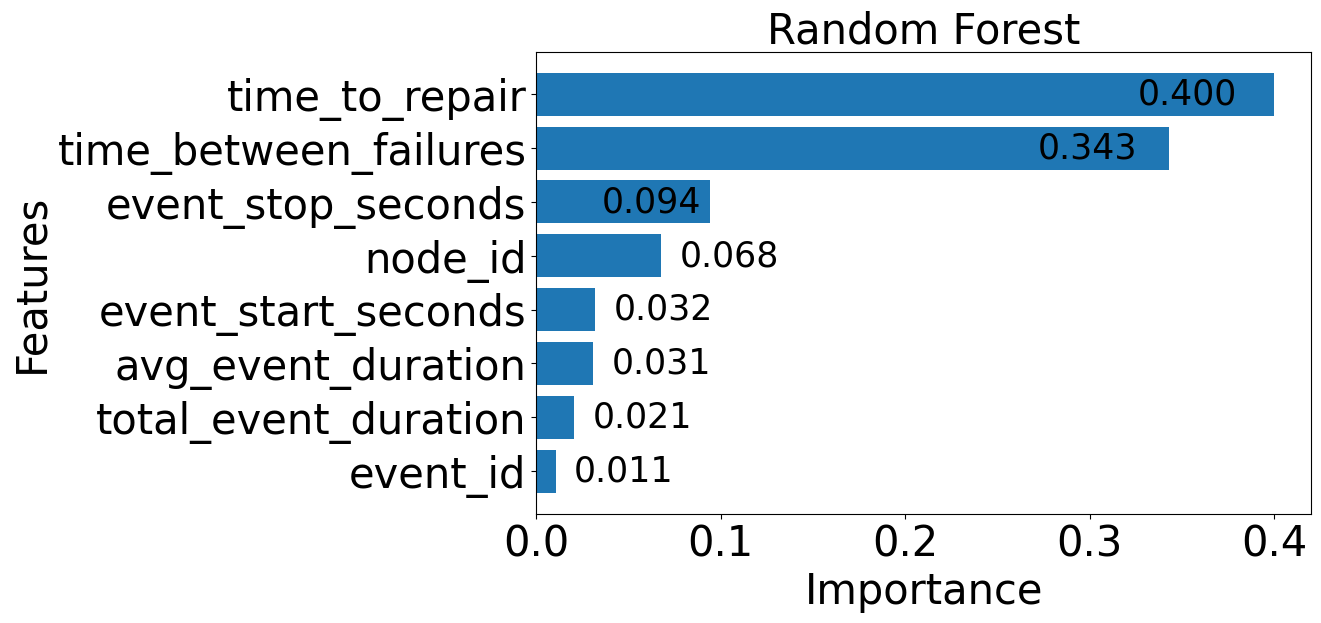

In [471]:

# Sort features by importance descending
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create and print a DataFrame of features and their importances (top 10 or all)
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': sorted_feature_names,
    'Importance': sorted_importances
})

print("Feature importance before filtering:")
print(feature_importance_df)

filtered_df = feature_importance_df[
    (feature_importance_df['Importance'].abs() >= 0.001)
  ]

print("Feature importance after filtering:")
print(filtered_df)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(filtered_df['Feature'], filtered_df['Importance'], height=.8)


plt.title("Random Forest", fontsize=30)
plt.xlabel("Importance", fontsize=30)
plt.ylabel("Features", fontsize=30)

# Reduce number of x-ticks to prevent overlap
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.gca().invert_yaxis()  # Highest importance at top

for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2

    if width >= 0.067889:
        # Label inside the bar near the end (95% of width)
        plt.text(width * 0.95, y_pos, f'{width:.3f}', ha='right', va='center', fontsize=25, color='black')
    else:
        # Label just outside and to the right of the bar
        plt.text(width + 0.01, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')

#plt.tight_layout()
plt.savefig('TTR_Random_Forest_Feature_Importance.png', bbox_inches='tight')
plt.show()
# Plot feature importance
#plt.figure(figsize=(10, 6))
#sorted_indices = np.argsort(feature_importances)[::-1]
#sorted_feature_names = feature_names[sorted_indices]
#sorted_importances = feature_importances[sorted_indices]

#plt.barh(sorted_feature_names[:10], sorted_importances[:10])
#plt.title("Feature Importance (Top 10 Features) - Random Forest")
#plt.xlabel("Importance Score")
#plt.gca().invert_yaxis()
#plt.grid()
#plt.show()

## Model 11 through 45 nodes

In [453]:
node_dataframes = {
    9: node9_df, 20: node20_df, 11: node11_df, 342: node342_df, 447: node447_df,
    352: node352_df, 820: node820_df, 839: node839_df, 780: node780_df, 889: node889_df,
    429: node429_df, 434: node434_df, 887: node887_df, 683: node683_df,
    717: node717_df, 79: node79_df, 454: node454_df, 663: node663_df,
    458: node458_df, 1060: node1060_df, 1019: node1019_df, 520: node520_df,
    523: node523_df, 491: node491_df, 1161: node1161_df, 1141: node1141_df,
    542: node542_df, 622: node622_df, 577: node577_df, 1210: node1210_df, 1229: node1229_df,
    1208: node1208_df, 840: node840_df, 872: node872_df, 868: node868_df, 965: node965_df,
    273: node273_df, 209: node209_df, 1101: node1101_df, 1078: node1078_df
}

# Nodes 1268, 888, 1171 removed owing to only 2 entries each
# Node 1250, 1282 only one entry
for node_id, node_df in node_dataframes.items():
    print(f"\nProcessing data for Node {node_id}")
    train_and_evaluate_model11(node_id, node_df)


Processing data for Node 9
Model: Random Forest Regressor - 9
Training MAE: 19615.46970954357, RMSE: 176447.01542352134, R2: 0.8858499371336679
Test MAE: 23588.41967213115, RMSE: 131632.80503585673, R2: 0.6783955514560203
Cross-validation R2 scores: [0.88412877 0.36990002 0.82088513]
Mean Cross-validation R2: 0.6916379746214966

Processing data for Node 20
Model: Random Forest Regressor - 20
Training MAE: 9612.831999999999, RMSE: 60710.0622458979, R2: 0.9812898452897661
Test MAE: 9216.497368421054, RMSE: 39237.197399735225, R2: 0.9809953286913431
Cross-validation R2 scores: [0.49674382 0.89816082 0.97849513]
Mean Cross-validation R2: 0.7911332543185878

Processing data for Node 11
Model: Random Forest Regressor - 11
Training MAE: 6653.428251121076, RMSE: 75927.70167047482, R2: 0.9334228818640266
Test MAE: 4772.692857142856, RMSE: 19520.971358826962, R2: 0.9869911168088205
Cross-validation R2 scores: [0.92110366 0.51071384 0.9250615 ]
Mean Cross-validation R2: 0.7856263358326152

Proce

## Model 12 - XGBoost

In [445]:
from xgboost import XGBRegressor

# Preprocess the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define and train the XGBoost Regressor model
xgb_regressor = XGBRegressor(n_estimators=5, random_state=42)
xgb_regressor.fit(X_train_processed, y_train)

# Evaluate the model
y_pred_train = xgb_regressor.predict(X_train_processed)
y_pred_test = xgb_regressor.predict(X_test_processed)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred_test)

# Print results
print("Model: XGBoost Regressor")
print(f"Training MAE: {mae_train}, RMSE: {rmse_train}, R2: {r2_train}")
print(f"Test MAE: {mae_test}, RMSE: {rmse_test}, R2: {r2_test}")


Model: XGBoost Regressor
Training MAE: 19119.428809487814, RMSE: 80746.53313089597, R2: 0.9218742524603871
Test MAE: 19391.853356710493, RMSE: 83890.64486092111, R2: 0.9138278771440189


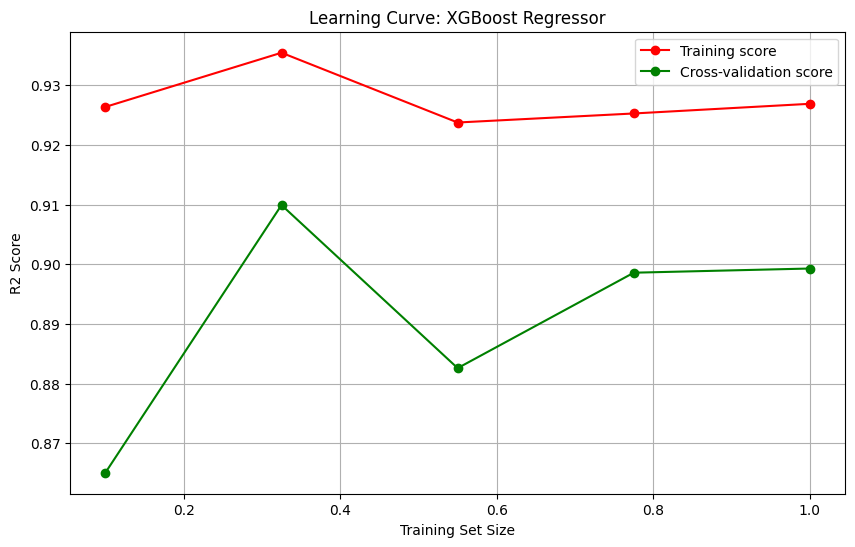

In [446]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Preprocess the training data
X_train_processed = preprocessor.fit_transform(X_train)
y_train_processed = y_train.values  # Ensure y_train is a numpy array

# Define and train the XGBoost Regressor model
xgb_regressor = XGBRegressor(n_estimators=5, random_state=42)

# Set up cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Store the training and test scores
train_scores = []
test_scores = []

# Loop over different training set sizes
for train_size in np.linspace(0.1, 1.0, 5):
    # Sample the training data according to the current train size
    num_train_samples = int(train_size * len(X_train_processed))
    X_train_sampled = X_train_processed[:num_train_samples]
    y_train_sampled = y_train_processed[:num_train_samples]

    # Initialize lists to store scores for this training size
    fold_train_scores = []
    fold_test_scores = []

    # Cross-validation within the sampled data
    for train_idx, val_idx in kf.split(X_train_sampled):
        X_train_fold, X_val_fold = X_train_sampled[train_idx], X_train_sampled[val_idx]
        y_train_fold, y_val_fold = y_train_sampled[train_idx], y_train_sampled[val_idx]

        # Train the model
        xgb_regressor.fit(X_train_fold, y_train_fold)

        # Evaluate on the training fold
        y_train_pred = xgb_regressor.predict(X_train_fold)
        fold_train_scores.append(r2_score(y_train_fold, y_train_pred))

        # Evaluate on the validation fold
        y_val_pred = xgb_regressor.predict(X_val_fold)
        fold_test_scores.append(r2_score(y_val_fold, y_val_pred))

    # Calculate mean scores for this training size
    train_scores.append(np.mean(fold_train_scores))
    test_scores.append(np.mean(fold_test_scores))

# Plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
train_scores_mean = np.array(train_scores)
test_scores_mean = np.array(test_scores)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve: XGBoost Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend(loc="best")
plt.grid()
plt.show()


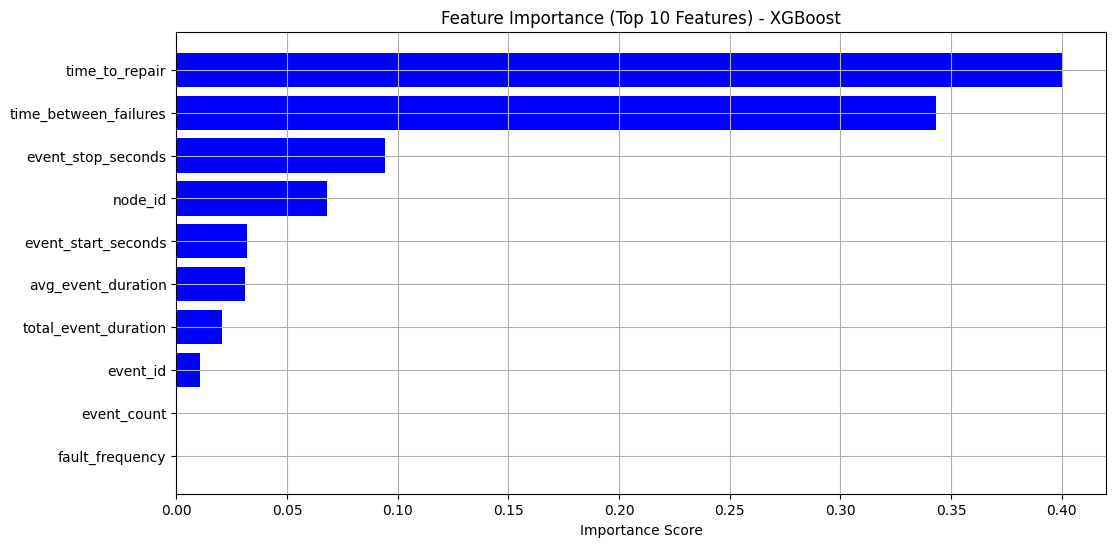

In [447]:
# Feature Importance
# Extract the feature importances from the trained XGBoost model
feature_importances = xgb_regressor.feature_importances_

# Extract the feature names
feature_names = numeric_features  # Since there are no categorical features

# Plot feature importance
plt.figure(figsize=(12, 6))
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.barh(sorted_feature_names[:10], sorted_importances[:10], color="b")
plt.title("Feature Importance (Top 10 Features) - XGBoost")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid()
plt.show()


In [448]:
X_train.columns

Index(['node_id', 'event_id', 'event_type', 'event_start_time',
       'fault_frequency', 'avg_event_duration', 'total_event_duration',
       'event_count', 'start_hour', 'time_between_failures', 'time_to_repair',
       'time_between_failures_scaled', 'time_to_repair_scaled',
       'event_start_seconds', 'event_stop_seconds'],
      dtype='object')

## Model 12 through 9 sites

In [449]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define a function to preprocess and train the XGBoost Regressor model for event_duration prediction
def train_and_evaluate_model12(site_name, site_df, target_column='event_duration'):
    # Features (drop target and irrelevant columns)
    X = site_df.drop(columns=[target_column, 'node_name', 'node_location', 'event_stop_time', 'event_duration_scaled'])
    y = site_df[target_column]  # Target column

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the preprocessing pipeline
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer, numeric_features),
                      ('cat', categorical_transformer, categorical_features)])

    # Preprocess the training and test data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Define and train the XGBoost Regressor model
    xgb_regressor = XGBRegressor(n_estimators=5, random_state=42)
    xgb_regressor.fit(X_train_processed, y_train)

    # Evaluate the model
    y_pred_train = xgb_regressor.predict(X_train_processed)
    y_pred_test = xgb_regressor.predict(X_test_processed)

    # Calculate evaluation metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mse_train ** 0.5
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mse_test ** 0.5
    r2_test = r2_score(y_test, y_pred_test)

    # Print results
    print(f"Model: XGBoost Regressor - {site_name}")
    print(f"Training MAE: {mae_train}, RMSE: {rmse_train}, R2: {r2_train}")
    print(f"Test MAE: {mae_test}, RMSE: {rmse_test}, R2: {r2_test}")


In [450]:
# Define your site dataframes
site_dataframes = {
    'site1': site1_df, 'site2': site2_df, 'site3': site3_df,
    'site4': site4_df, 'site5': site5_df, 'site6': site6_df,
    'site7': site7_df, 'site8': site8_df, 'site9': site9_df
}

# Iterate over sites
for site_name, site_df in site_dataframes.items():
    print(f"\nProcessing data for {site_name}")
    train_and_evaluate_model12(site_name, site_df)



Processing data for site1
Model: XGBoost Regressor - site1
Training MAE: 19056.714830948866, RMSE: 46883.63556213509, R2: 0.9641160164068083
Test MAE: 19584.04451485935, RMSE: 57888.7380653787, R2: 0.9527904897685999

Processing data for site2
Model: XGBoost Regressor - site2
Training MAE: 26434.474387737446, RMSE: 86092.48655409904, R2: 0.9398355580282396
Test MAE: 25544.1959907844, RMSE: 75494.50124664526, R2: 0.9290915459425256

Processing data for site3
Model: XGBoost Regressor - site3
Training MAE: 49320.911082670114, RMSE: 146396.09862974664, R2: 0.9355091485738544
Test MAE: 51991.02426840143, RMSE: 136048.91228976042, R2: 0.9456381012400117

Processing data for site4
Model: XGBoost Regressor - site4
Training MAE: 18423.090677726665, RMSE: 84027.48981735448, R2: 0.8956996648039496
Test MAE: 18303.93666646018, RMSE: 69121.59465624116, R2: 0.880747602490271

Processing data for site5
Model: XGBoost Regressor - site5
Training MAE: 60838.67571824075, RMSE: 184381.27502840292, R2: 0.

## Model 12 through 15 clusters

In [451]:
cluster_dataframes = {
    'G1/site1/c1': cluster1_df, 'G1/site1/c2': cluster2_df, 'G1/site1/c3': cluster3_df, 'G1/site1/c4': cluster4_df,
    'G1/site2/c1': cluster5_df, 'G1/site3/c1': cluster6_df, 'G1/site4/c1': cluster7_df, 'G1/site4/c2': cluster8_df,
    'G1/site5/c1': cluster9_df, 'G1/site5/c2': cluster10_df, 'G1/site6/c1': cluster11_df, 'G1/site6/c2': cluster12_df,
    'G1/site7/c1': cluster13_df, 'G1/site8/c1': cluster14_df, 'G1/site9/c1': cluster15_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model12(cluster_name, cluster_df)


Processing data for G1/site1/c1
Model: XGBoost Regressor - G1/site1/c1
Training MAE: 28266.20837929581, RMSE: 65929.88209524607, R2: 0.9666844505599708
Test MAE: 28921.328838692127, RMSE: 71411.27166071767, R2: 0.9670682383781307

Processing data for G1/site1/c2
Model: XGBoost Regressor - G1/site1/c2
Training MAE: 13563.01804781659, RMSE: 30224.338972363323, R2: 0.9590876982917028
Test MAE: 13593.840776877762, RMSE: 28185.613304971146, R2: 0.9631256308860333

Processing data for G1/site1/c3
Model: XGBoost Regressor - G1/site1/c3
Training MAE: 15296.636283771071, RMSE: 37973.268465270856, R2: 0.9640962044300088
Test MAE: 15405.922840463061, RMSE: 39814.02270385438, R2: 0.9626593391129877

Processing data for G1/site1/c4
Model: XGBoost Regressor - G1/site1/c4
Training MAE: 40551.83899174839, RMSE: 87509.11181903175, R2: 0.962733183680144
Test MAE: 38198.38230263158, RMSE: 72638.35977026582, R2: 0.9645670901549536

Processing data for G1/site2/c1
Model: XGBoost Regressor - G1/site2/c1
Tr

# Model 12 for Cluster 1 of Site 4 (s4/c1)

In [474]:
cluster_dataframes = {
  'G1/site4/c1': cluster7_df
}

for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"\nProcessing data for {cluster_name}")
    train_and_evaluate_model12(cluster_name, cluster_df)


Processing data for G1/site4/c1
Model: XGBoost Regressor - G1/site4/c1
Training MAE: 18001.991049800454, RMSE: 86991.25102021567, R2: 0.8786880381784781
Test MAE: 16880.88488235799, RMSE: 41641.214358801786, R2: 0.9477843363247082


In [ ]:

# Sort features by importance descending
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create and print a DataFrame of features and their importances (top 10 or all)
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': sorted_feature_names,
    'Importance': sorted_importances
})

print("Feature importance before filtering:")
print(feature_importance_df)

filtered_df = feature_importance_df[
    (feature_importance_df['Importance'].abs() >= 0.001)
  ]

print("Feature importance after filtering:")
print(filtered_df)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(filtered_df['Feature'], filtered_df['Importance'], height=.8)


plt.title("Random Forest", fontsize=30)
plt.xlabel("Importance", fontsize=30)
plt.ylabel("Features", fontsize=30)

# Reduce number of x-ticks to prevent overlap
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.gca().invert_yaxis()  # Highest importance at top

for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2

    if width >= 0.067889:
        # Label inside the bar near the end (95% of width)
        plt.text(width * 0.95, y_pos, f'{width:.3f}', ha='right', va='center', fontsize=25, color='black')
    else:
        # Label just outside and to the right of the bar
        plt.text(width + 0.01, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')

#plt.tight_layout()
plt.savefig('TTR_Random_Forest_Feature_Importance.png', bbox_inches='tight')
plt.show()


Feature importance before filtering:
                         Feature  Importance
0                 time_to_repair    0.400193
1          time_between_failures    0.343063
2             event_stop_seconds    0.094139
3                        node_id    0.067889
4            event_start_seconds    0.032080
5             avg_event_duration    0.030992
6           total_event_duration    0.020520
7                       event_id    0.010536
8                    event_count    0.000368
9                fault_frequency    0.000221
10         time_to_repair_scaled    0.000000
11  time_between_failures_scaled    0.000000
12                    event_type    0.000000
Feature importance after filtering:
                 Feature  Importance
0         time_to_repair    0.400193
1  time_between_failures    0.343063
2     event_stop_seconds    0.094139
3                node_id    0.067889
4    event_start_seconds    0.032080
5     avg_event_duration    0.030992
6   total_event_duration    0.020520
7

<Figure size 1200x600 with 0 Axes>

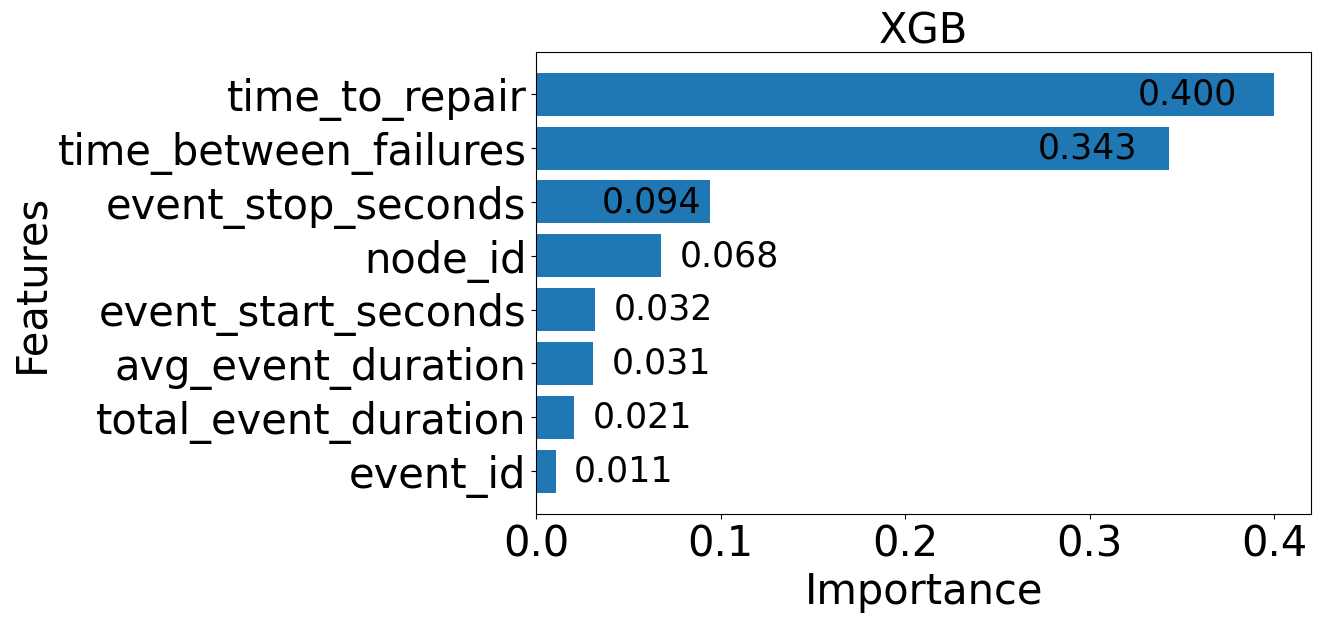

In [477]:
# Feature Importance
# Extract the feature importances from the trained XGBoost model
feature_importances = xgb_regressor.feature_importances_

# Extract the feature names
feature_names = numeric_features  # Since there are no categorical features

# Plot feature importance
plt.figure(figsize=(12, 6))
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a DataFrame for readable display
feature_importance_df = pd.DataFrame({
    'Feature': sorted_feature_names,
    'Importance': sorted_importances
})

print("Feature importance before filtering:")
print(feature_importance_df)

filtered_df = feature_importance_df[
    (feature_importance_df['Importance'].abs() >= 0.001)
  ]

print("Feature importance after filtering:")
print(filtered_df)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(filtered_df['Feature'], filtered_df['Importance'], height=.8)


plt.title("XGB", fontsize=30)
plt.xlabel("Importance", fontsize=30)
plt.ylabel("Features", fontsize=30)


# Reduce number of x-ticks to prevent overlap
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.gca().invert_yaxis()  # Highest importance at top

for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2

    if width >= 0.067889:
        # Label inside the bar near the end (95% of width)
        plt.text(width * 0.95, y_pos, f'{width:.3f}', ha='right', va='center', fontsize=25, color='black')
    else:
        # Label just outside and to the right of the bar
        plt.text(width + 0.01, y_pos, f'{width:.3f}', ha='left', va='center', fontsize=25, color='black')

#plt.tight_layout()
plt.savefig('TTR_XGB_Feature_Importance.png', bbox_inches='tight')
plt.show()

## Model 12 through 45 nodes

In [452]:
node_dataframes = {
    9: node9_df, 20: node20_df, 11: node11_df, 342: node342_df, 447: node447_df,
    352: node352_df, 820: node820_df, 839: node839_df, 780: node780_df, 889: node889_df,
    429: node429_df, 434: node434_df, 887: node887_df, 683: node683_df,
    717: node717_df, 79: node79_df, 454: node454_df, 663: node663_df,
    458: node458_df, 1060: node1060_df, 1019: node1019_df, 520: node520_df,
    523: node523_df, 491: node491_df, 1161: node1161_df, 1141: node1141_df,
    542: node542_df, 622: node622_df, 577: node577_df, 1210: node1210_df, 1229: node1229_df,
    1208: node1208_df, 840: node840_df, 872: node872_df, 868: node868_df, 965: node965_df,
    273: node273_df, 209: node209_df, 1101: node1101_df, 1078: node1078_df
}

# Nodes 1268, 888, 1171 removed owing to only 2 entries each
# Node 1250, 1282 only one entry
for node_id, node_df in node_dataframes.items():
    print(f"\nProcessing data for Node {node_id}")
    train_and_evaluate_model12(node_id, node_df)


Processing data for Node 9
Model: XGBoost Regressor - 9
Training MAE: 54430.340394839215, RMSE: 186247.7402759587, R2: 0.8728168591315372
Test MAE: 43583.88217213115, RMSE: 104156.26870939702, R2: 0.7986439875403809

Processing data for Node 20
Model: XGBoost Regressor - 20
Training MAE: 41401.975625, RMSE: 162942.62597120932, R2: 0.8652200023477981
Test MAE: 53753.36559416119, RMSE: 127066.4253861844, R2: 0.8006914043328464

Processing data for Node 11
Model: XGBoost Regressor - 11
Training MAE: 25925.4193788537, RMSE: 95587.5383259634, R2: 0.894481881426398
Test MAE: 29668.40408761161, RMSE: 83604.42567789706, R2: 0.7613861207796432

Processing data for Node 342
Model: XGBoost Regressor - 342
Training MAE: 19447.59310601952, RMSE: 62288.92519656572, R2: 0.8815869046939313
Test MAE: 34062.11786099138, RMSE: 120936.45199262959, R2: 0.7627783619838847

Processing data for Node 447
Model: XGBoost Regressor - 447
Training MAE: 14896.408153044871, RMSE: 34647.59193621137, R2: 0.9380119662